## SPAM EMAIL DETECTION

The goal of this project is to build a model that is able to classify an email as spam or not spam by analyzing various words, characters, and their related frequencies

The following steps will be taken:

1. Loading the data from where it has been stored
2. Understanding the data, it's features and observation
3. Checking the information contained in the data
4. Exploring and Visualizing the data - checking for inconsistencies, distribution of features and patterns in the data
5. Cleaning the data
6. Analyzing the data
7. Preprocessing the data
8. Building a model

# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

sb.set()
warnings.simplefilter(action="ignore", category=FutureWarning)

# loading the data


In [2]:
spam_base= pd.read_csv('spambase.csv')

# making a copy of the data to preserve it's original form


In [3]:
data= spam_base.copy()
data.head()

Unnamed: 0  word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0           0            0.00               0.64           0.64           0.0   
1           1            0.21               0.28           0.50           0.0   
2           2            0.06               0.00           0.71           0.0   
3           3            0.00               0.00           0.00           0.0   
4           4            0.00               0.00           0.00           0.0   

  word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0          0.32            0.00              0.00                0.00   
1          0.14            0.28              0.21                0.07   
2          1.23            0.19              0.19                0.12   
3          0.63            0.00              0.31                0.63   
4          0.63            0.00              0.31                0.63   

   word_freq_order  ...  char_freq_;  char_freq_(  char_freq_[  char_freq_!  \
0             0.00  ...         0.00        0.000          0.0        0.778   
1             0.00  ...         0.00        0.132          0.0        0.372   
2             0.64  ...         0.01        0.143          0.0        0.276   
3             0.31  ...         0.00        0.137          0.0        0.137   
4             0.31  ...         0.00        0.135          0.0        0.135   

   char_freq_$  char_freq_#  capital_run_length_average  \
0        0.000        0.000                       3.756   
1        0.180        0.048                       5.114   
2        0.184        0.010                       9.821   
3        0.000        0.000                       3.537   
4        0.000        0.000                       3.537   

   capital_run_length_longest  capital_run_length_total  is_spam  
0                          61                       278     True  
1                         101                      1028     True  
2                         485                      2259     True  
3                          40                       191     True  
4                          40                       191     True  

[5 rows x 59 columns]

The first feature with the title 'Unnamed:0' has obsevations that are same as the index column. Having a feature that is identical to the index column is not relevant to classifying spam emails. This feature will be dropped

# dropping the first feature


In [4]:
data.drop(columns= ['Unnamed: 0'], inplace= True)
data.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

  word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0          0.32            0.00              0.00                0.00   
1          0.14            0.28              0.21                0.07   
2          1.23            0.19              0.19                0.12   
3          0.63            0.00              0.31                0.63   
4          0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1             0.00            0.94  ...         0.00        0.132   
2             0.64            0.25  ...         0.01        0.143   
3             0.31            0.63  ...         0.00        0.137   
4             0.31            0.63  ...         0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  is_spam  
0                       278     True  
1                      1028     True  
2                      2259     True  
3                       191     True  
4                       191     True  

[5 rows x 58 columns]

# checking the number of features and observations in the dataset


In [5]:
data.shape

(4601, 58)

The dataset consist of 4601 observations with 58 features

There are 57 predictors and one target variable. The predictors are various words and characters that are found in emails.
The target variable indicates whether an email is spam or not. It is represented as boolean - with True as spam and false as not spam.

The observations represent the related frequency of the various words/characters in an email


# checking the informomation contained in the dataset


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4595 non-null   float64
 3   word_freq_3d                4599 non-null   float64
 4   word_freq_our               4601 non-null   object 
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4586 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

The information indicates that the dataset has features with different data types -51 float, 2 int, 4 object and 1 bool - The features in this dataset contain the words and characters appear in a mail. The frequency is denoted as numbers (interger or float) and yet, there are features with data type objects. They will be checked and corrected

The data information also indicate that there are features with missing values. We cannot classify an email as spam or not using a model when the data consists of missing value. The missing values will be treated

# checking the unique values of features with the data type object to check why they are misrepresented as object type by extracting those features and displaying the feature, unique values and data types


In [7]:
cat_feat= data.select_dtypes('object')

for col, d_type in zip(cat_feat.columns, cat_feat.dtypes):
    unq_vals = cat_feat[col].unique()
    print(col,' ', unq_vals, ' ', d_type)

word_freq_our   ['0.32' '0.14' '1.23' '0.63' '1.85' '1.92' '1.88' '0.61' '0.19' '0' '0.38'
 '0.34' '0.9' '0.71' '1.27' '0.94' '1.11' '1.59' '0.76' '2.94' '1.16'
 '0.65' '1.89' '1.46' '0.48' '0.41' '0.52' '0.45' '1.57' '0.05' '0.42'
 '0.23' '1.39' '0.68' '1.32' '1.26' '0.53' '0.44' '0.46' '1.44' '0.18'
 '1.67' '1.28' '1.4' '1.15' '0.4' '2.24' '0.35' '0.43' '4.25' '0.95'
 '0.88' '0.51' '0.1' '2.23' '0.15' '0.92' '0.33' '1.51' '1.6' '0.56'
 '0.66' '1.49' '1.65' '0.29' '0.81' '2.25' '2.7' '0.62' '1.31' '1.36'
 '0.85' '0.27' '2.1' '0.3' '0.26' '0.5' '0.54' '0.89' '0.08' '0.87' '0.11'
 '6.25' '0.8' '2.19' '1.17' '0.55' '1.77' '2.5' '0.25' '0.96' '1.03'
 '0.39' '0.64' '0.69' '1.81' '1.09' '0.22' '0.31' '1.38' '0.99' '1.24'
 '2.33' '0.75' '1.14' '0.2' '0.78' '1.63' '1.29' '0.16' '0.58' '0.91'
 '0.17' '2' '0.36' '1.93' '1.3' '0.02' '7.69' '0.67' '1.22' '1.48' '0.7'
 '1.21' '1.78' '1.52' '0.59' '1.55' '1.05' '3.48' '0.84' '0.24' '0.28'
 '1.25' '0.09' '1.82' '0.6' '1.34' '1.79' '0.82' '1.02' '1.0

There are 4 features that are misrepresented as the object data type. The features contain observations as words and characters which is why they are represented as object data type.

The first Two features contain the character '???' each, the third feature contain the word 'none' and the last feature contain the word 'no'

These words and characters will be converted to missing values and treated accordingly

# checking to see the frequency of the character '???' in the word_freq_our feature


In [8]:
data[data.word_freq_our == '???']

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
3649             0.0                0.0            0.0           0.0   

     word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
3649           ???             0.0               0.0                 0.0   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
3649              0.0             0.0  ...          0.0          0.0   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
3649          0.0          0.0          0.0          0.0   

      capital_run_length_average  capital_run_length_longest  \
3649                         1.0                           1   

      capital_run_length_total  is_spam  
3649                         5    False  

[1 rows x 58 columns]

# checking to see the frequency of the character '???' in the word_freq_000 feature


In [9]:
data[data.word_freq_000 == '???']

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
2411            0.97                0.0           0.97           0.0   

     word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
2411             0             0.0               0.0                 0.0   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
2411              0.0             0.0  ...          0.0          0.0   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
2411          0.0        0.166          0.0          0.0   

      capital_run_length_average  capital_run_length_longest  \
2411                       2.185                          11   

      capital_run_length_total  is_spam  
2411                        59    False  

[1 rows x 58 columns]

# checking to see the frequency of the word 'none' in the word_freq_hpl feature


In [10]:
data[data.word_freq_hpl == 'none']

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
1605             0.4               0.18           0.32           0.0   

     word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
1605          0.25            0.18              0.03                1.01   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
1605              0.4             0.4  ...        0.012        0.042   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
1605        0.072        0.334        0.139          0.0   

      capital_run_length_average  capital_run_length_longest  \
1605                       3.305                         181   

      capital_run_length_total  is_spam  
1605                      1613     True  

[1 rows x 58 columns]

# checking to see the frequency of the word 'no' in the word_freq_labs feature


In [11]:
data[data.word_freq_labs == 'no']

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
3030             0.0                0.0            0.0           0.0   

     word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
3030             0             0.0               0.0                 0.0   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
3030              0.0             0.0  ...          0.0        0.769   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
3030          0.0          0.0          0.0          0.0   

      capital_run_length_average  capital_run_length_longest  \
3030                        3.75                           9   

      capital_run_length_total  is_spam  
3030                        15    False  

[1 rows x 58 columns]

All the features denoted as the object type have one occurence for the spurious word/character. These words/characters will be masked and then converted to nan

# replacing the words and characters with nan


In [12]:
char_list = ['???', 'none', 'no']
obj_col= data[['word_freq_our', 'word_freq_000', 'word_freq_hpl', 'word_freq_labs']]
obj_col = obj_col.fillna('999')
cols = obj_col.columns
for col in cols:
    dfCol = data[col]
    valList = []
    for val in dfCol:
        for char in char_list:
            if type(val) == str:
                if char in val:
                    val = val.replace(char, '')
                    if val == '':
                        val = '999'
                else:
                    val = val
        valList.append(val)
    data[col] = valList
data = data.replace('999', np.nan)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4595 non-null   float64
 3   word_freq_3d                4599 non-null   float64
 4   word_freq_our               4600 non-null   object 
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4586 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# checking the values of features with the data type object to see if the words and characters have been replaced with nan


In [14]:
feat= data[['word_freq_our', 'word_freq_000', 'word_freq_hpl', 'word_freq_labs']]

for col in feat:
    data[col]= data[col].astype(float)

    for col, d_type in zip(feat.columns, feat.dtypes):
        unq_vals = feat[col].unique()
        print(col,' ', unq_vals, ' ', d_type)

word_freq_our   ['0.32' '0.14' '1.23' '0.63' '1.85' '1.92' '1.88' '0.61' '0.19' '0' '0.38'
 '0.34' '0.9' '0.71' '1.27' '0.94' '1.11' '1.59' '0.76' '2.94' '1.16'
 '0.65' '1.89' '1.46' '0.48' '0.41' '0.52' '0.45' '1.57' '0.05' '0.42'
 '0.23' '1.39' '0.68' '1.32' '1.26' '0.53' '0.44' '0.46' '1.44' '0.18'
 '1.67' '1.28' '1.4' '1.15' '0.4' '2.24' '0.35' '0.43' '4.25' '0.95'
 '0.88' '0.51' '0.1' '2.23' '0.15' '0.92' '0.33' '1.51' '1.6' '0.56'
 '0.66' '1.49' '1.65' '0.29' '0.81' '2.25' '2.7' '0.62' '1.31' '1.36'
 '0.85' '0.27' '2.1' '0.3' '0.26' '0.5' '0.54' '0.89' '0.08' '0.87' '0.11'
 '6.25' '0.8' '2.19' '1.17' '0.55' '1.77' '2.5' '0.25' '0.96' '1.03'
 '0.39' '0.64' '0.69' '1.81' '1.09' '0.22' '0.31' '1.38' '0.99' '1.24'
 '2.33' '0.75' '1.14' '0.2' '0.78' '1.63' '1.29' '0.16' '0.58' '0.91'
 '0.17' '2' '0.36' '1.93' '1.3' '0.02' '7.69' '0.67' '1.22' '1.48' '0.7'
 '1.21' '1.78' '1.52' '0.59' '1.55' '1.05' '3.48' '0.84' '0.24' '0.28'
 '1.25' '0.09' '1.82' '0.6' '1.34' '1.79' '0.82' '1.02' '1.0

The words/characters present in the features denoted as object have been replaced with nan and hence the features have now changed to datatype float. These features with a corrected data type will be used to replace the features denoted as object data type in the data

# rechecking the information contained in the dataset to see if the data types have changed


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4595 non-null   float64
 3   word_freq_3d                4599 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4586 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

Now the dataset consist of 1 feature with data type bool feature, 55 features with data type float and 2 features with data type int

# checking for duplicated observations


In [16]:
data.duplicated().sum()

383

there are 383 duplicated observations. It is highly unlikely to have 2 emails with the same frequency count for each word/character. The fact there are 383 indicates that the duplicated observations are clearly errors. However, dropping these observations will lead to loss of observations. 

In order to ensure a more accurate classification, we need as many observations as we can get. Losing 383 observations out of 4600 will affect the accuracy of the classification

Therefore, these observations will not be dropped

# analyzing the count and percentage of missing values for each feature as well as the entire data frame


In [17]:
missing_values = data.isna().sum()
nan_percent = (missing_values/len(data))*100
total_nan = data.isna().sum().sum()
total_percent = (total_nan/len(data))*100

print('lenght of data frame with missing values:', len(data))
print('number of missing values:', missing_values)
print('percentage of missing values:', nan_percent)
print('total missing values:', total_nan)
print('total percentage :', total_percent)


lenght of data frame with missing values: 4601
number of missing values: word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   1
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   1
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   1
word_freq_george                0
word_freq

there are a total of 345 missing values in the dataset. The missing values  represent 7 percent of the entire observations in the dataset. These missing datapoints are spread across various features with 'word_freq_labs' as the feature with the highest number of missing values (251) which is 5%.

These features will be replaced using a statistical average after further exploration

# checking the summary statistics to understand the distribution of features


In [18]:
data.describe()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4595.000000   4599.000000   
mean         0.104553           0.213015       0.281023      0.065453   
std          0.305358           1.290575       0.504370      1.395454   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4600.000000     4600.000000       4601.000000         4586.000000   
mean        0.312291        0.095922          0.114208            0.105639   
std         0.672570        0.273850          0.391441            0.401682   
min         0.000000        0.000000          0.000000            0.000000   
25%         0.000000        0.000000          0.000000            0.000000   
50%         0.000000        0.000000          0.000000            0.000000   
75%         0.382500        0.000000          0.000000            0.000000   
max        10.000000        5.880000          7.270000           11.110000   

       word_freq_order  word_freq_mail  ...  word_freq_conference  \
count      4601.000000     4601.000000  ...           4601.000000   
mean          0.090067        0.239413  ...              0.031869   
std           0.278616        0.644755  ...              0.285735   
min           0.000000        0.000000  ...              0.000000   
25%           0.000000        0.000000  ...              0.000000   
50%           0.000000        0.000000  ...              0.000000   
75%           0.000000        0.160000  ...              0.000000   
max           5.260000       18.180000  ...             10.000000   

       char_freq_;  char_freq_(  char_freq_[  char_freq_!  char_freq_$  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.038575     0.139030     0.016976     0.269071     0.075811   
std       0.243471     0.270355     0.109394     0.815672     0.245882   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.065000     0.000000     0.000000     0.000000   
75%       0.000000     0.188000     0.000000     0.315000     0.052000   
max       4.385000     9.752000     4.081000    32.478000     6.003000   

       char_freq_#  capital_run_length_average  capital_run_length_longest  \
count  4601.000000                 4601.000000                 4601.000000   
mean      0.044238                    5.191515                   52.172789   
std       0.429342                   31.729449                  194.891310   
min       0.000000                    1.000000                    1.000000   
25%       0.000000                    1.588000                    6.000000   
50%       0.000000                    2.276000                   15.000000   
75%       0.000000                    3.706000                   43.000000   
max      19.829000                 1102.500000                 9989.000000   

       capital_run_length_total  
count               4601.000000  
mean                 283.289285  
std                  606.347851  
min                    1.000000  
25%                   35.000000  
50%                   95.000000  
75%                  266.000000  
max                15841.000000  

[8 rows x 57 columns]

the summary description indicates that most features have a value of 0 as the most occuring data point. This is not suprising in the context of analyzing emails and checking for the frequency of various words and characters. Since the words and characters and numerous, it is reasonable to find lots of emails containing little or no count of some words and characters given the small sample size

Also, the indication of having a high frequency of some characters and word in a few emails as against a low or no frequency of characters/words in most emails supports the previous assertion. Given a small sample size, these observations are valid.

# visualizing the distribution using a histogram plot

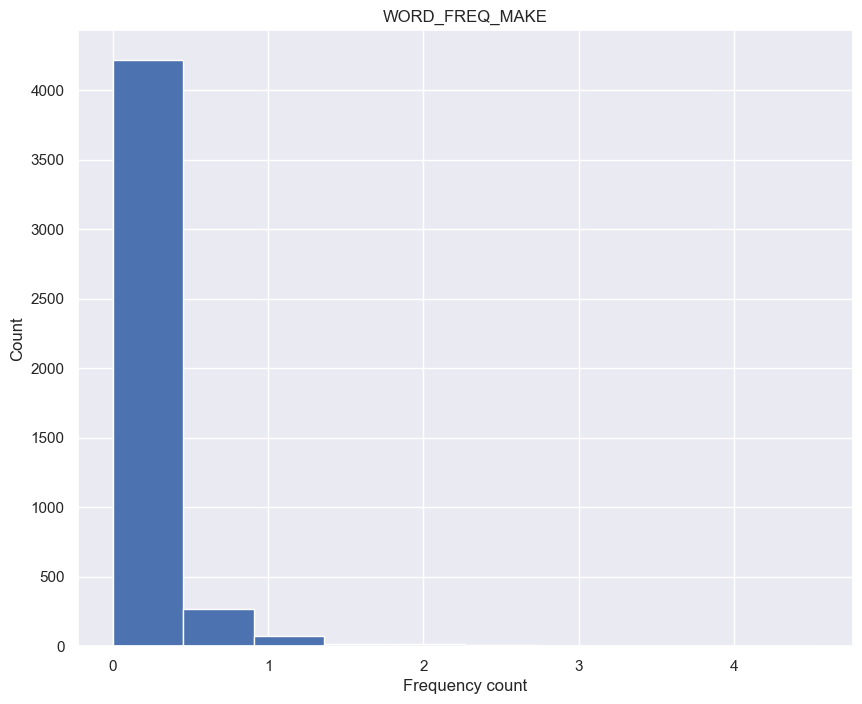

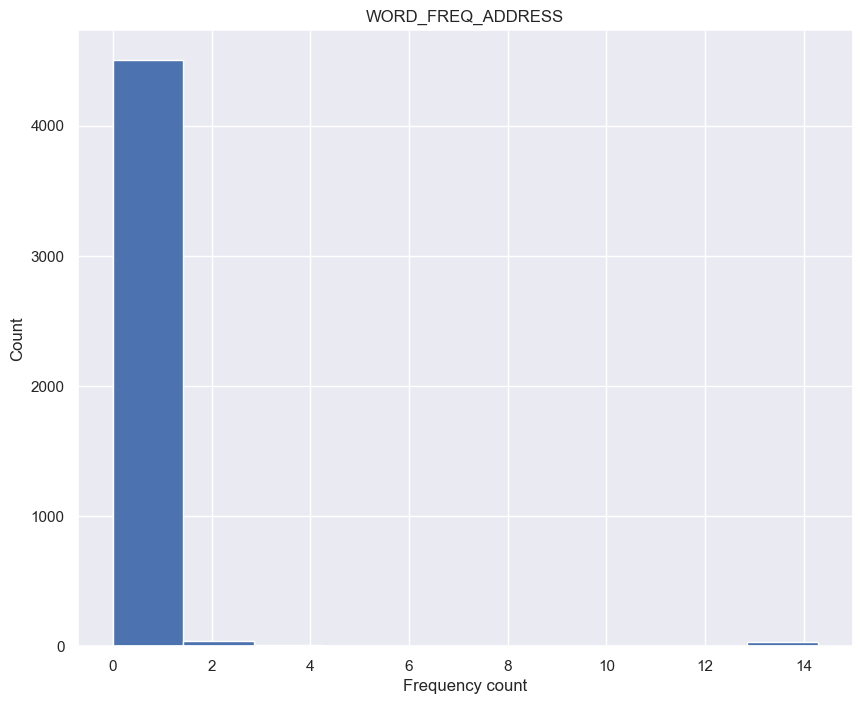

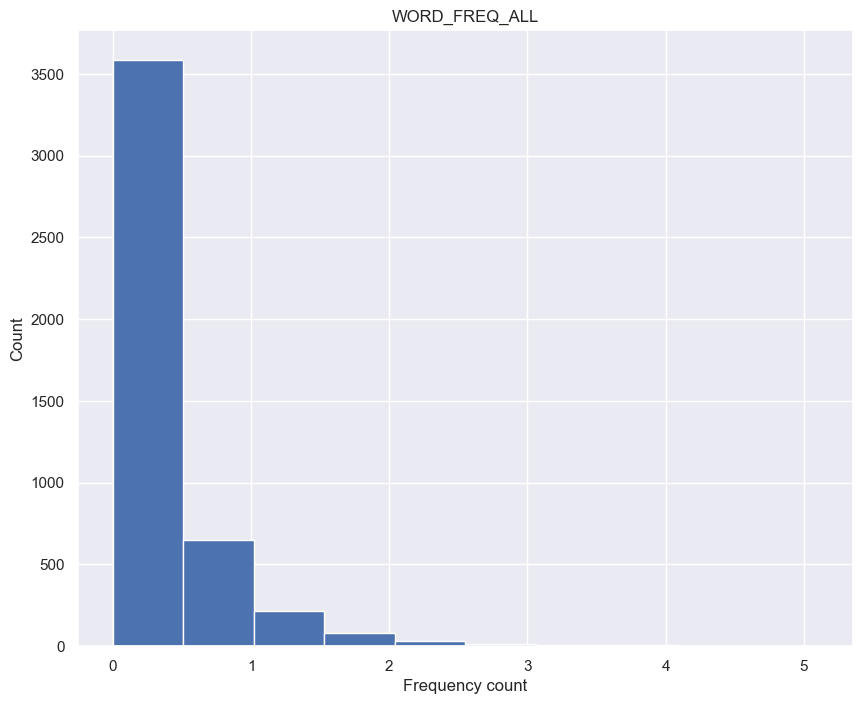

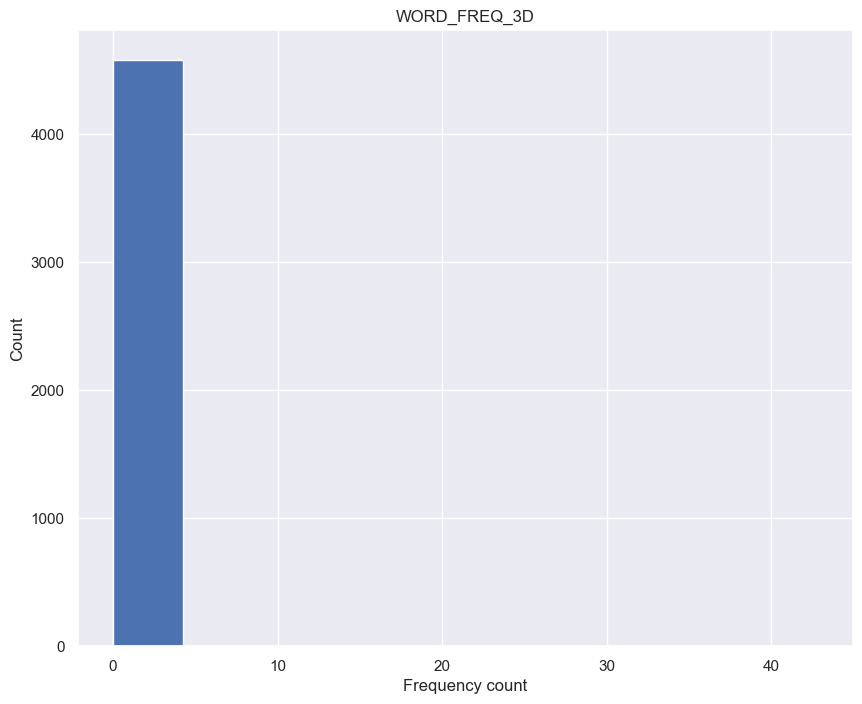

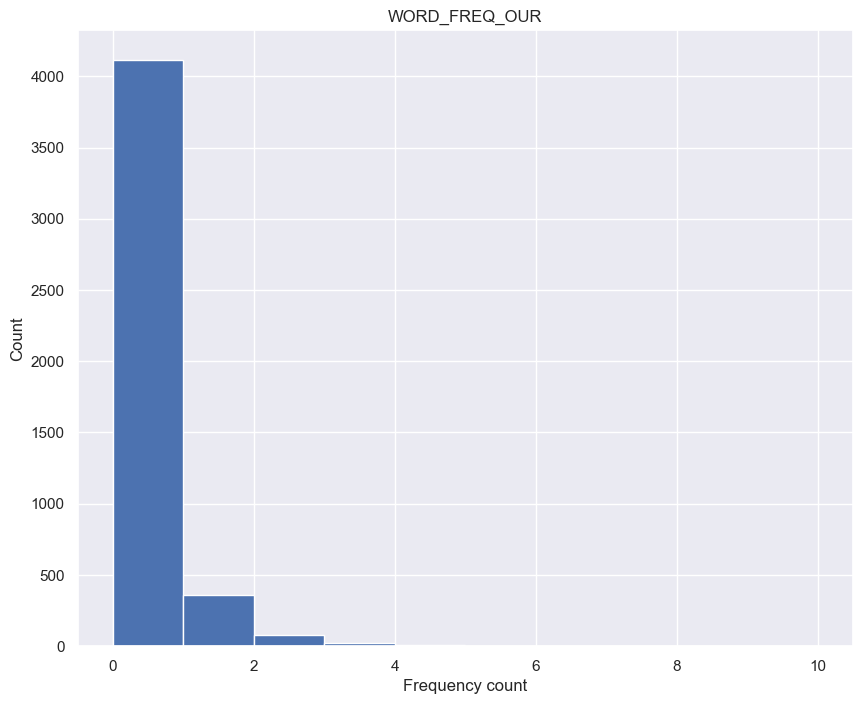

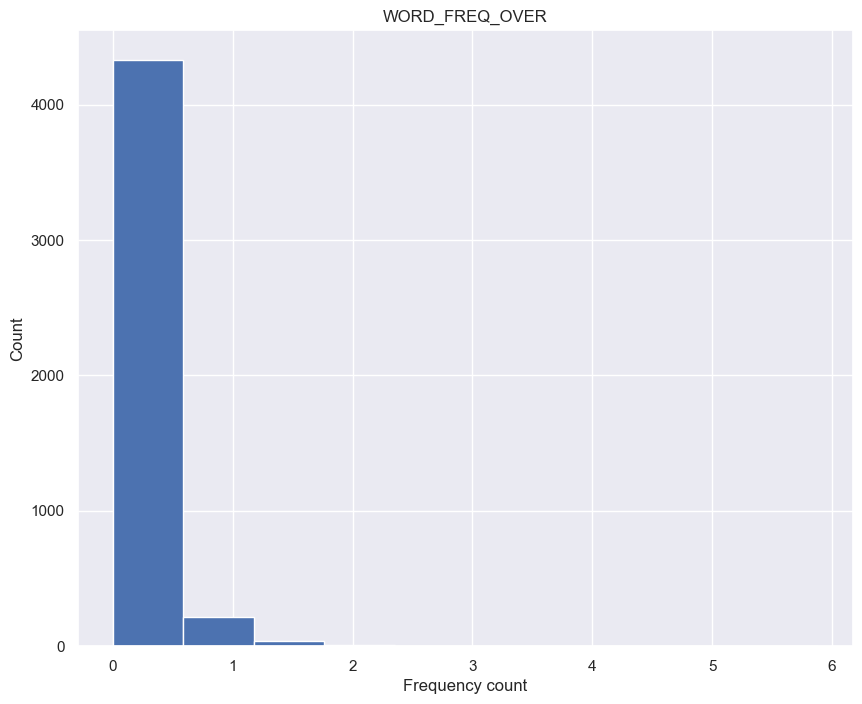

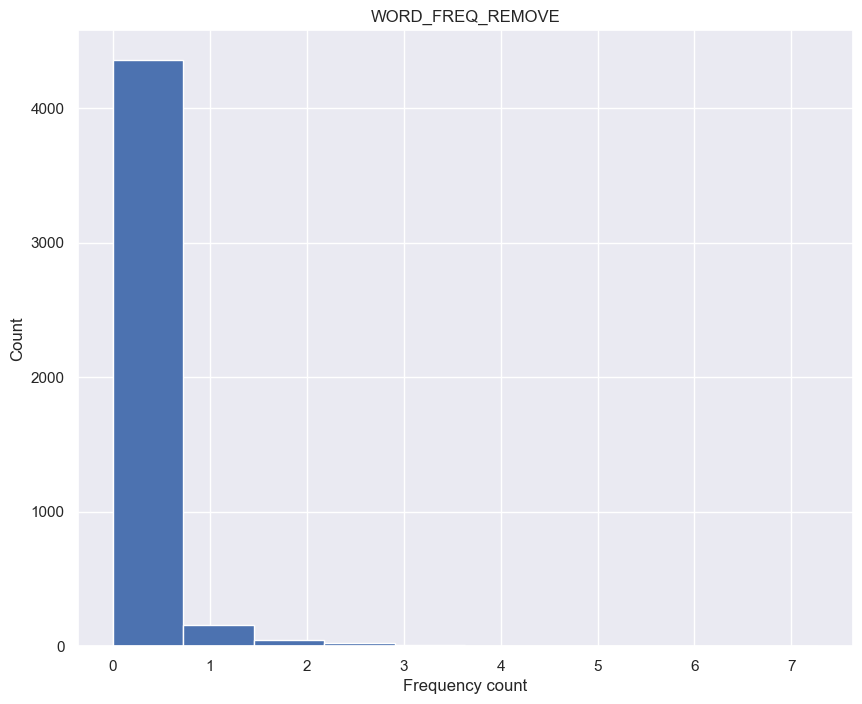

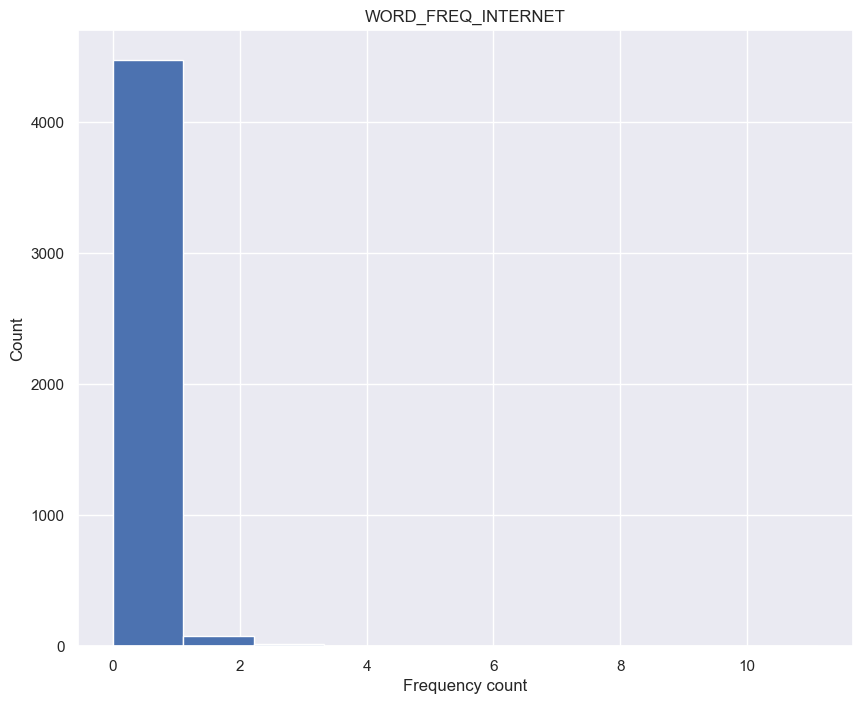

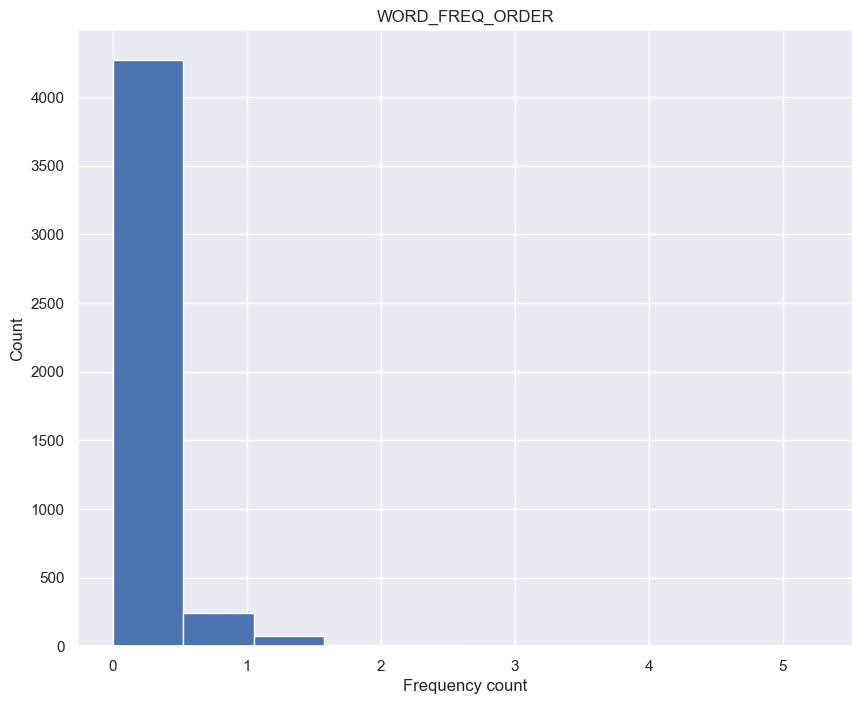

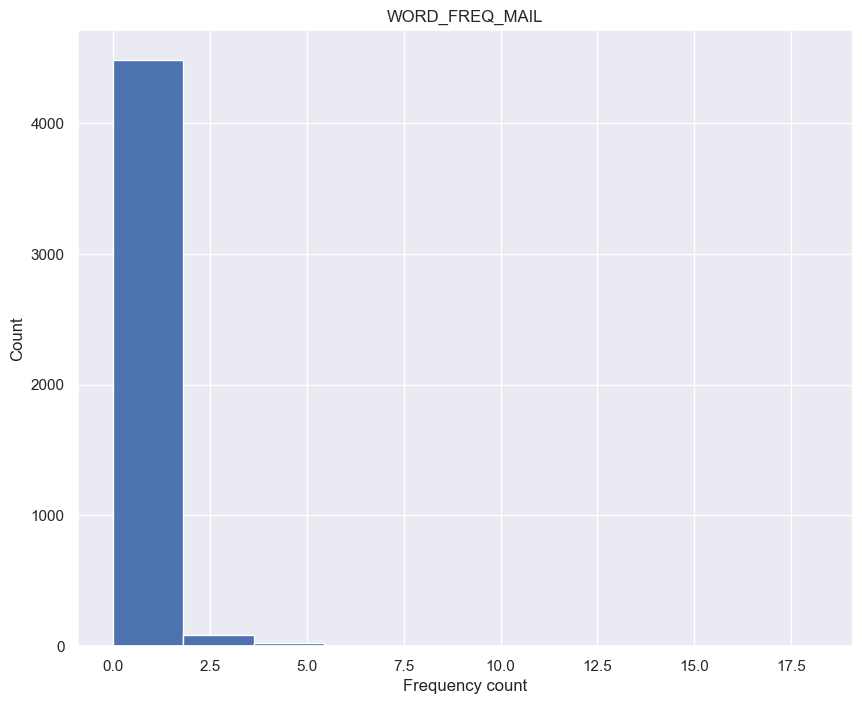

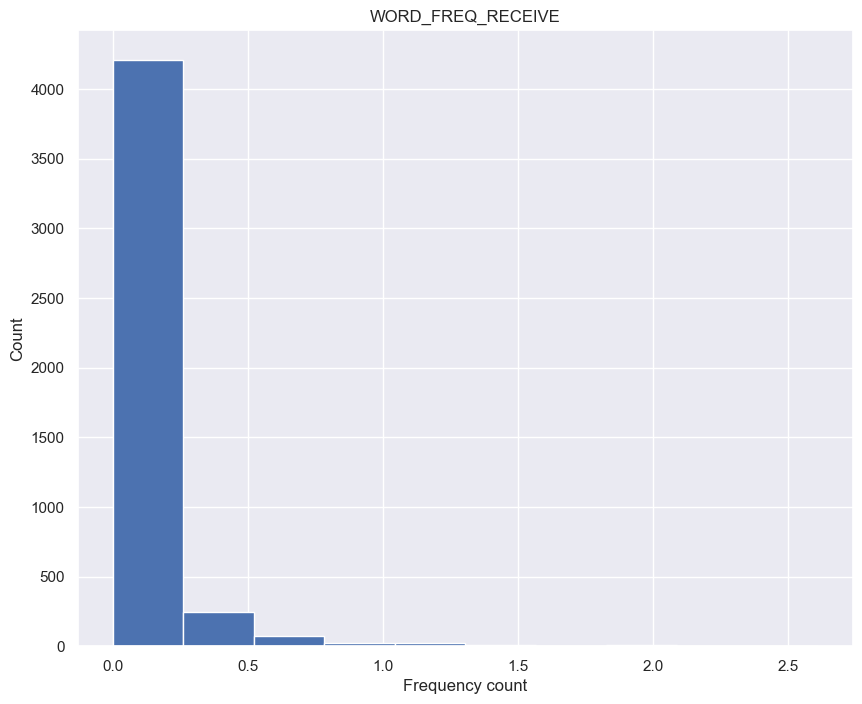

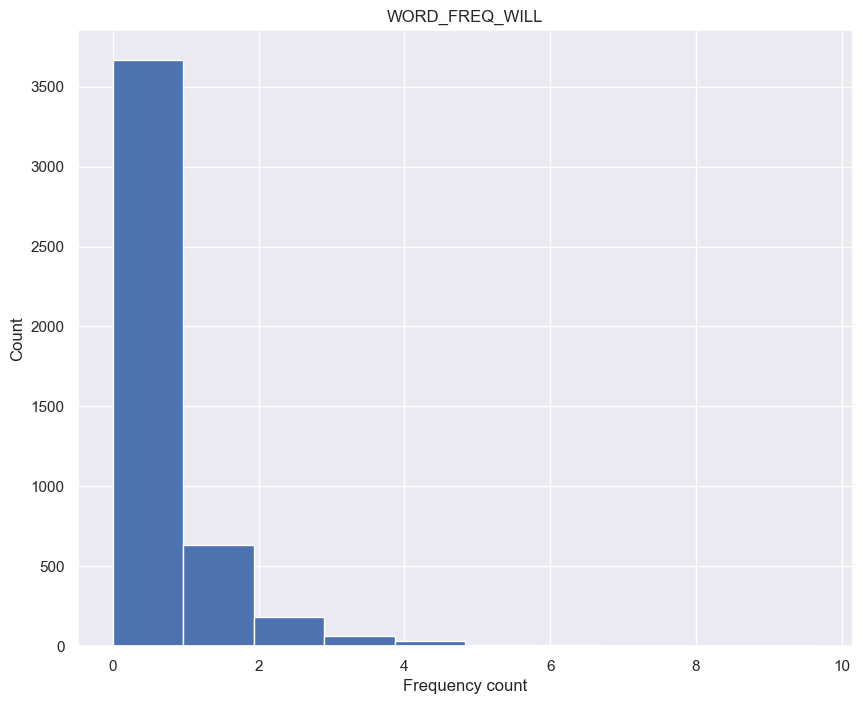

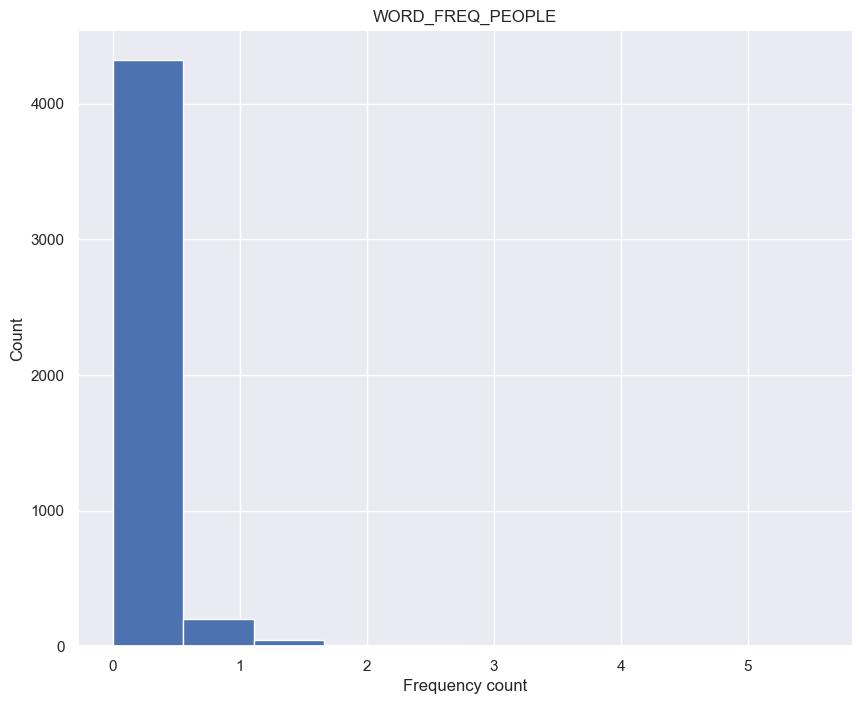

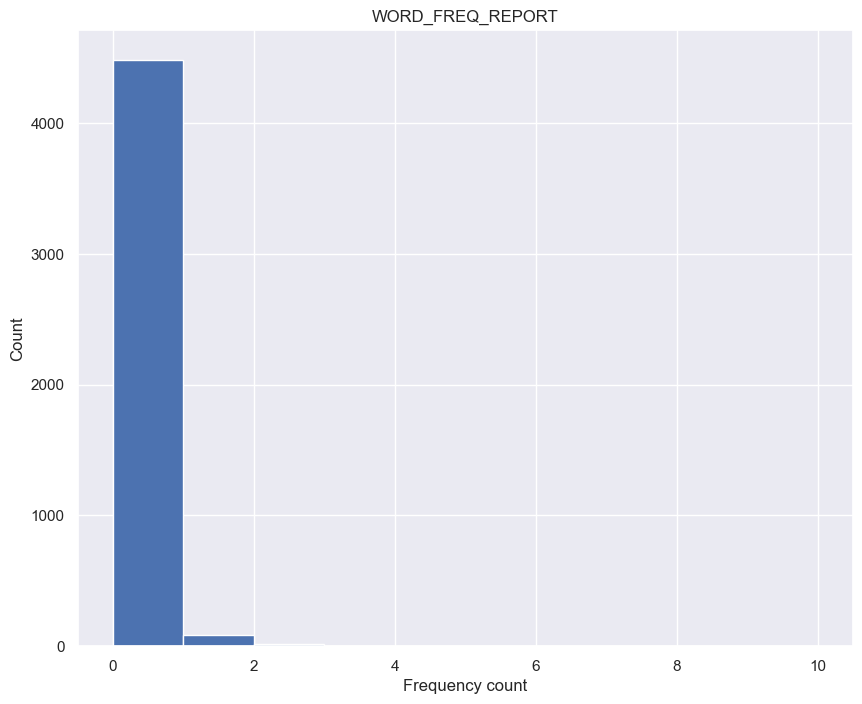

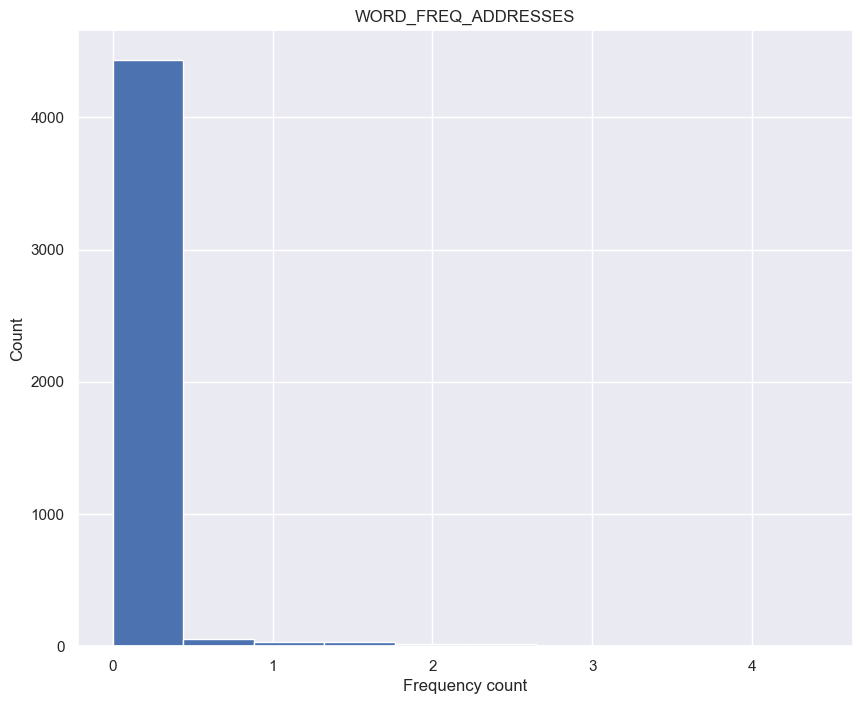

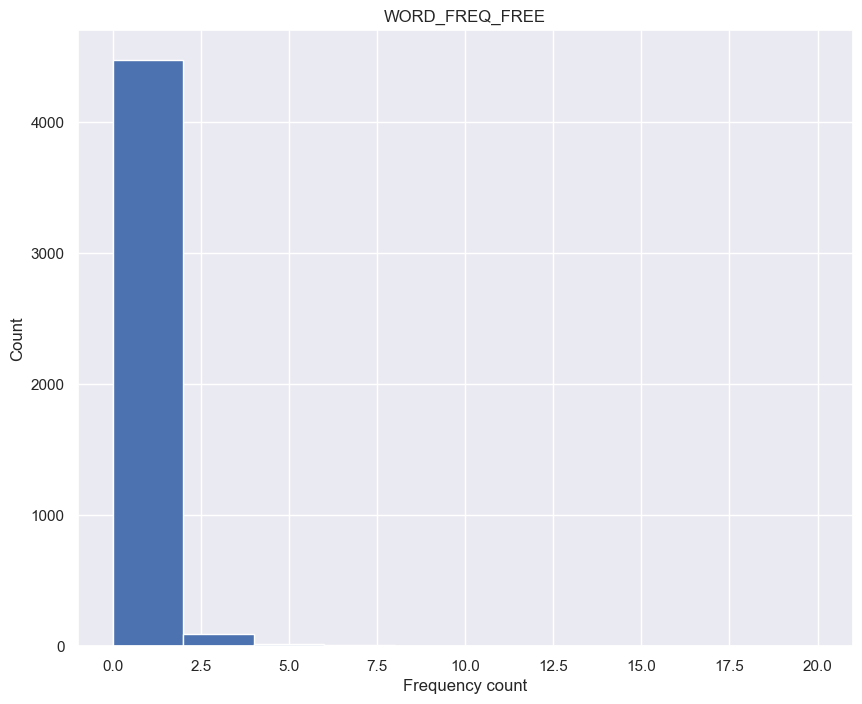

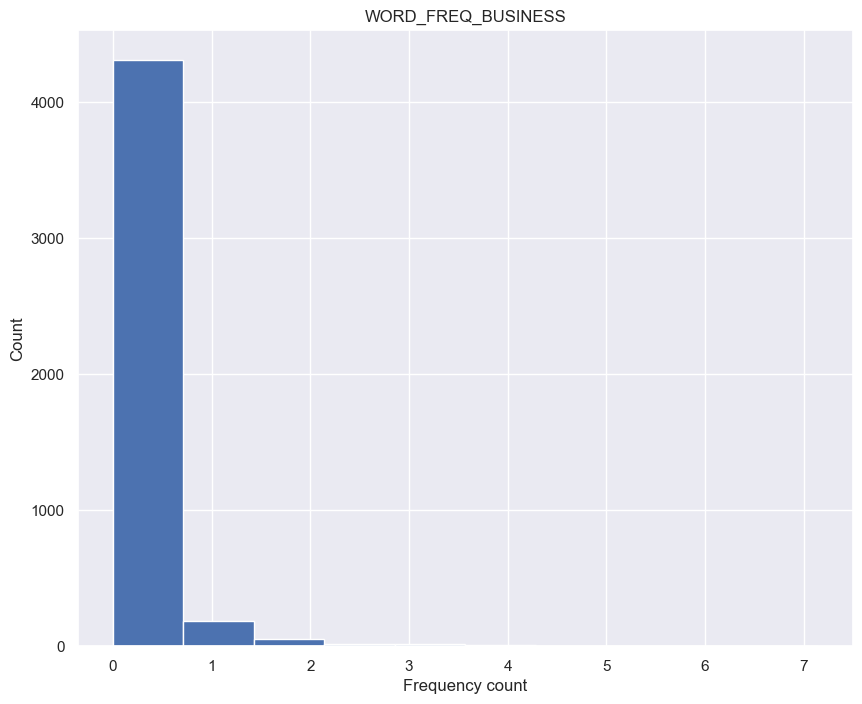

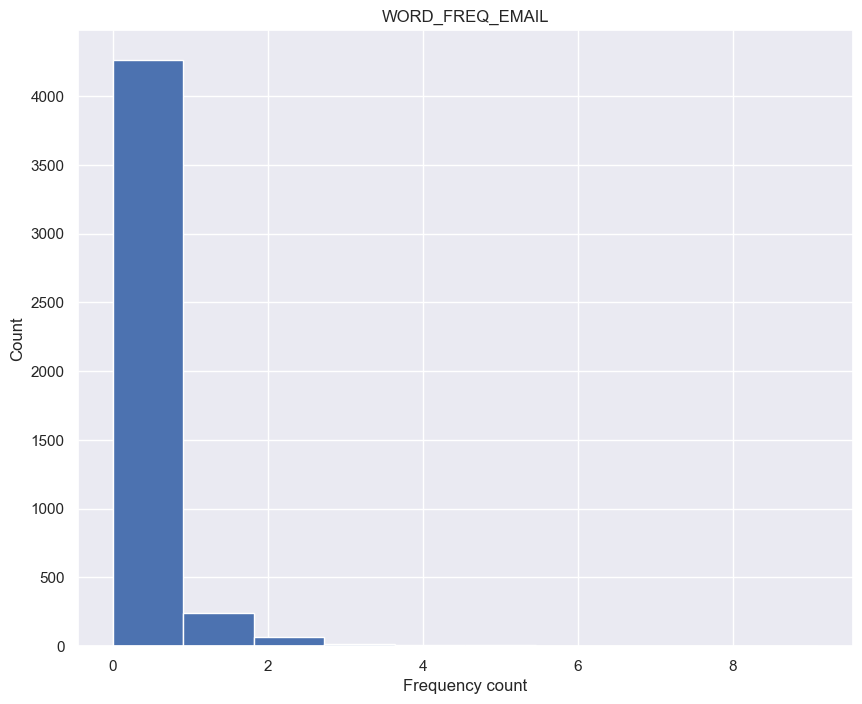

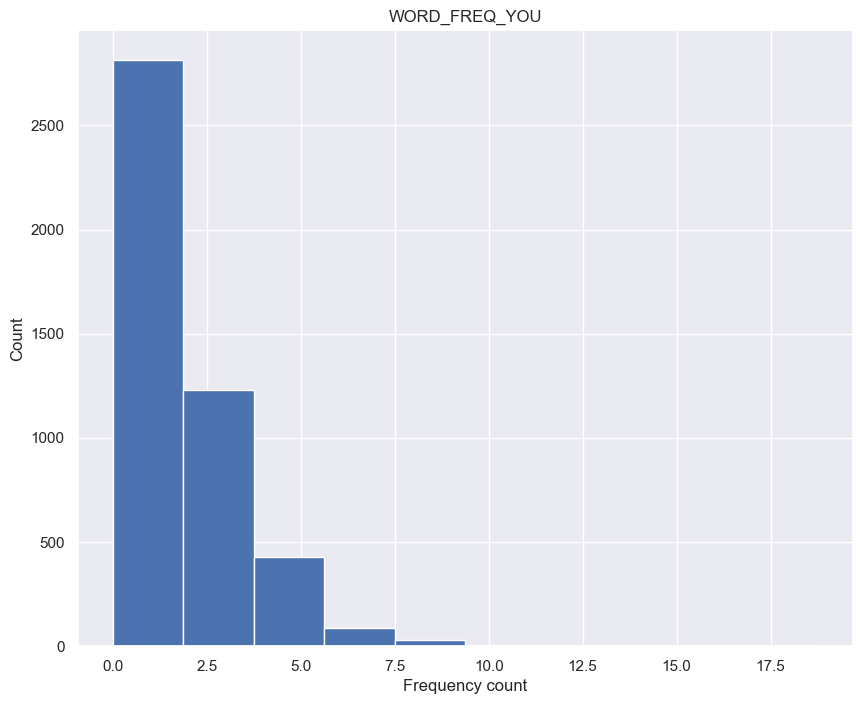

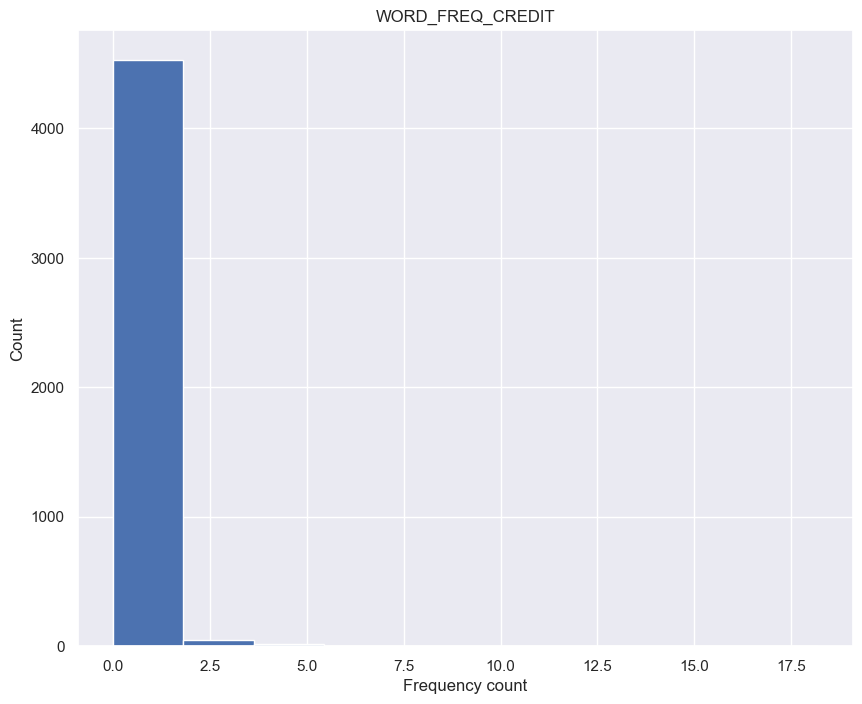

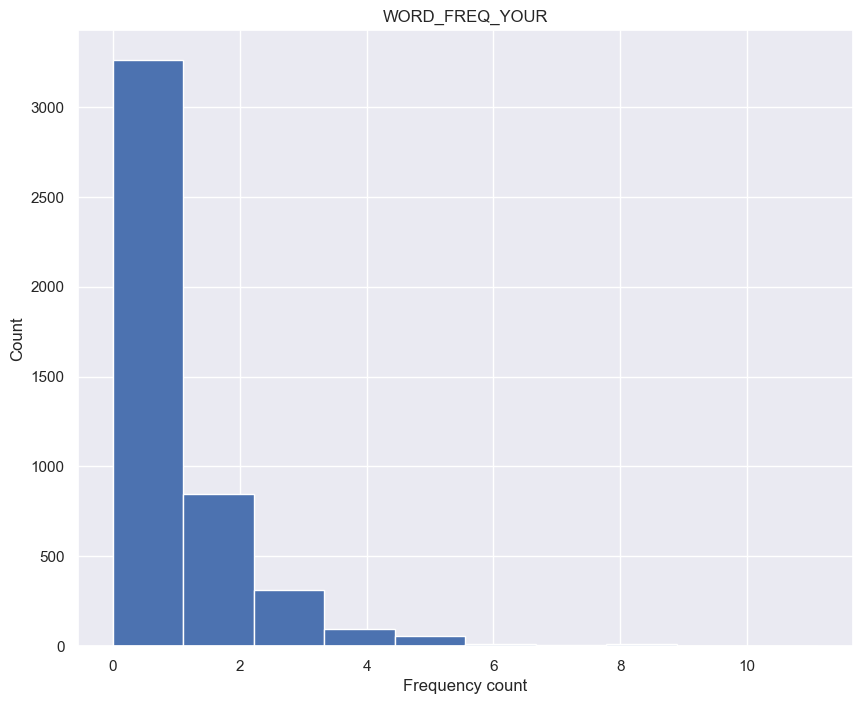

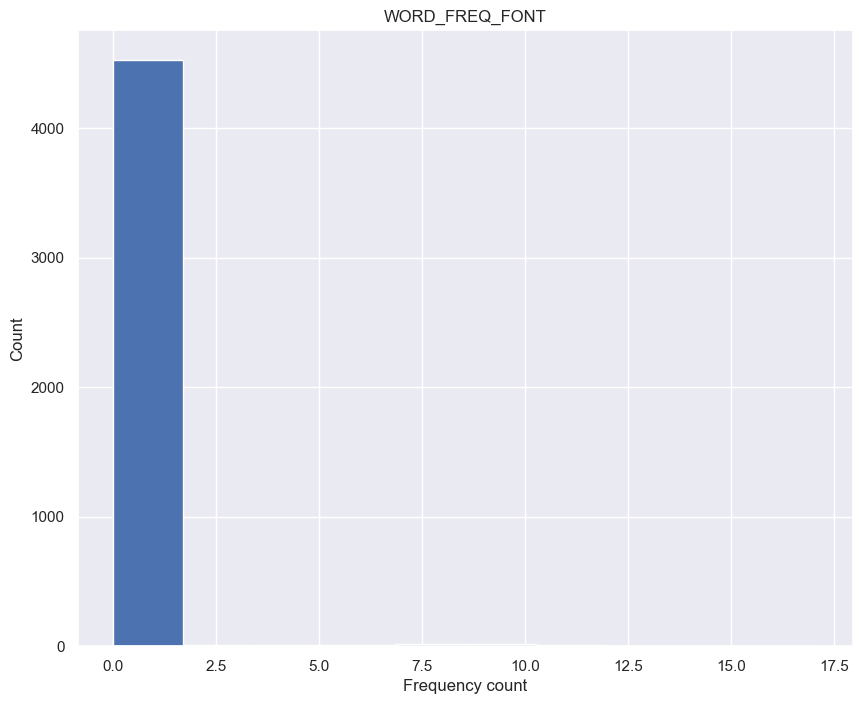

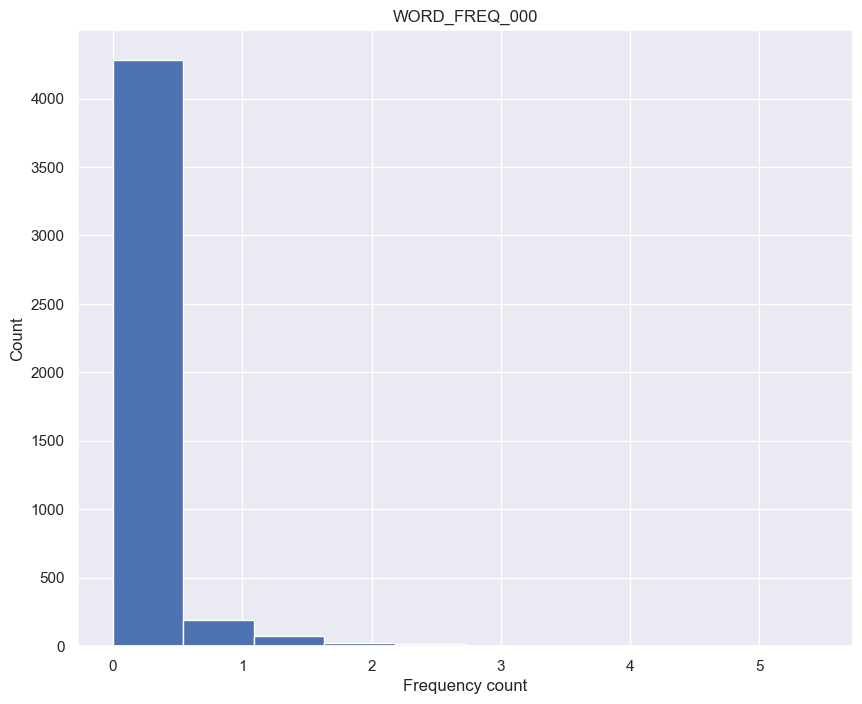

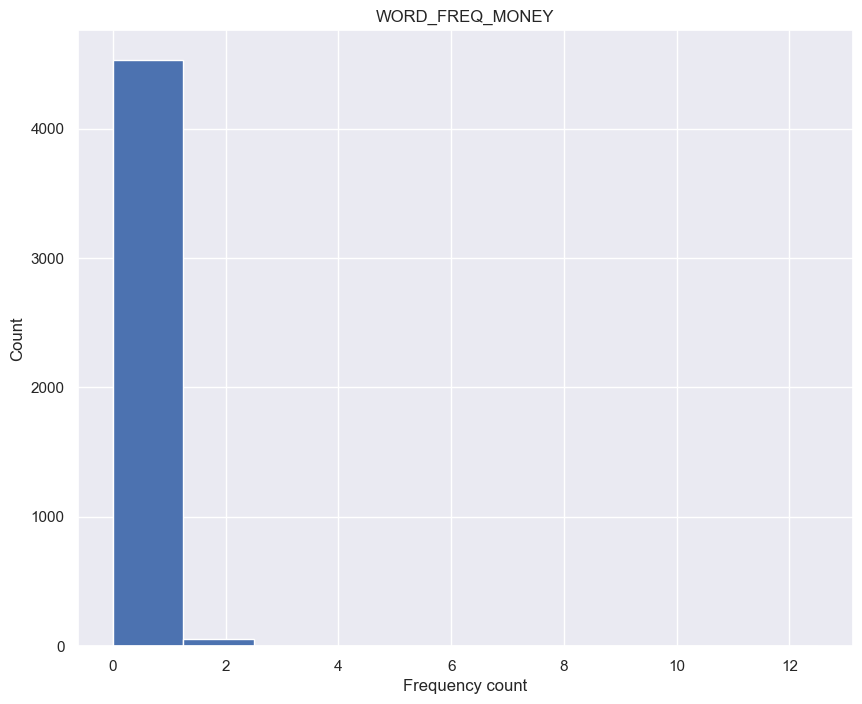

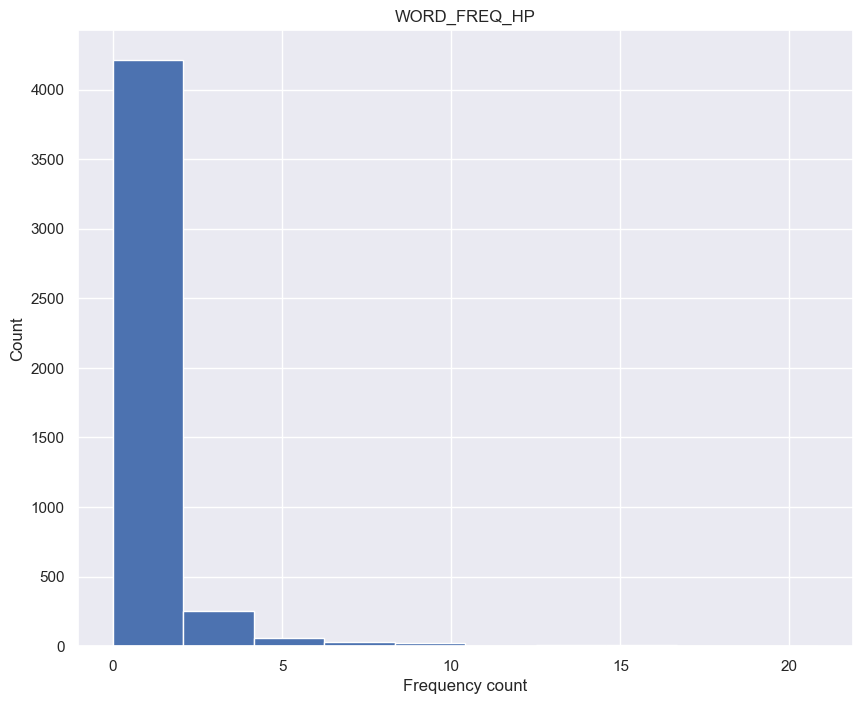

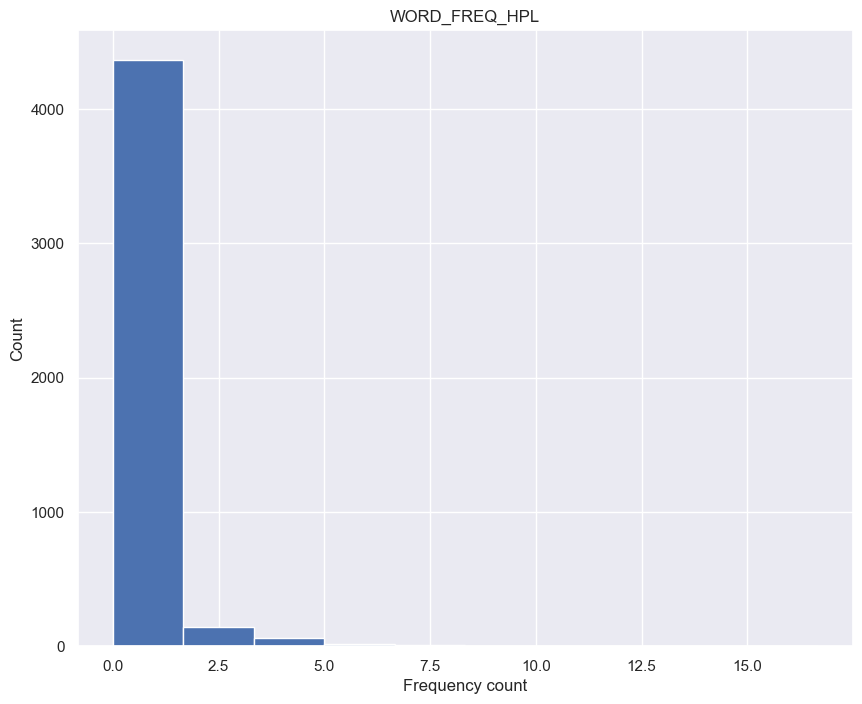

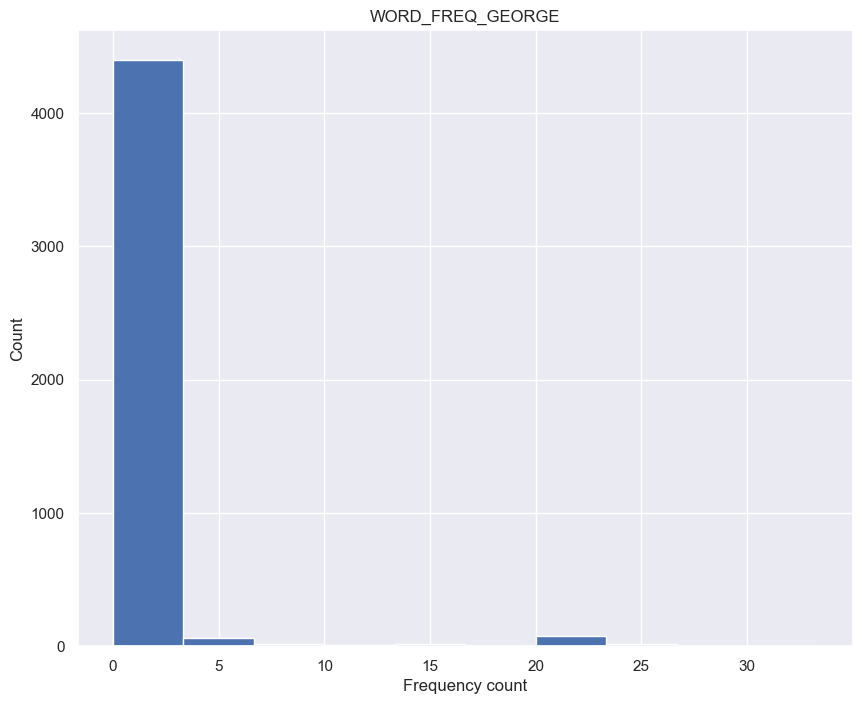

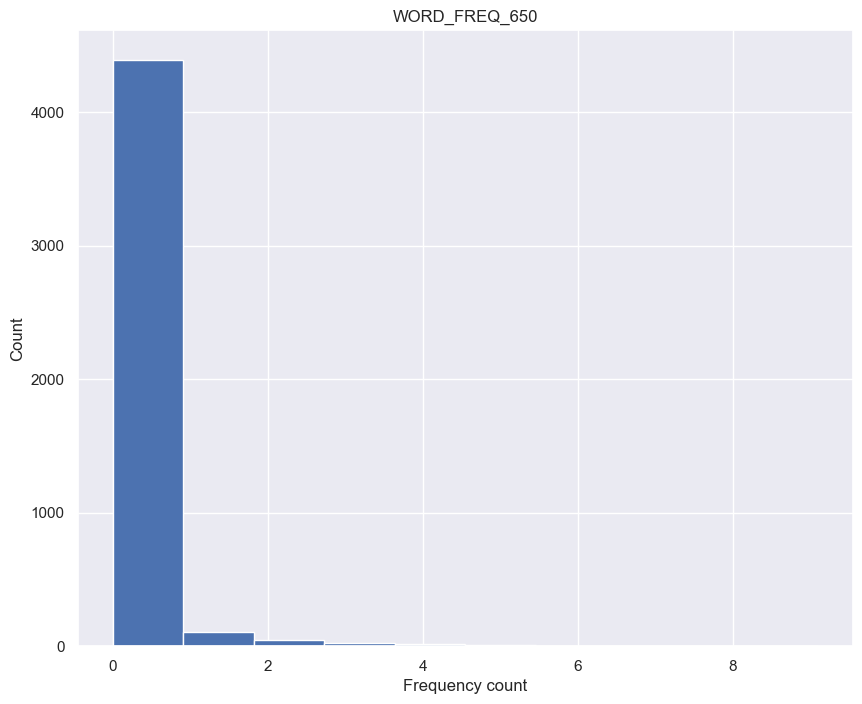

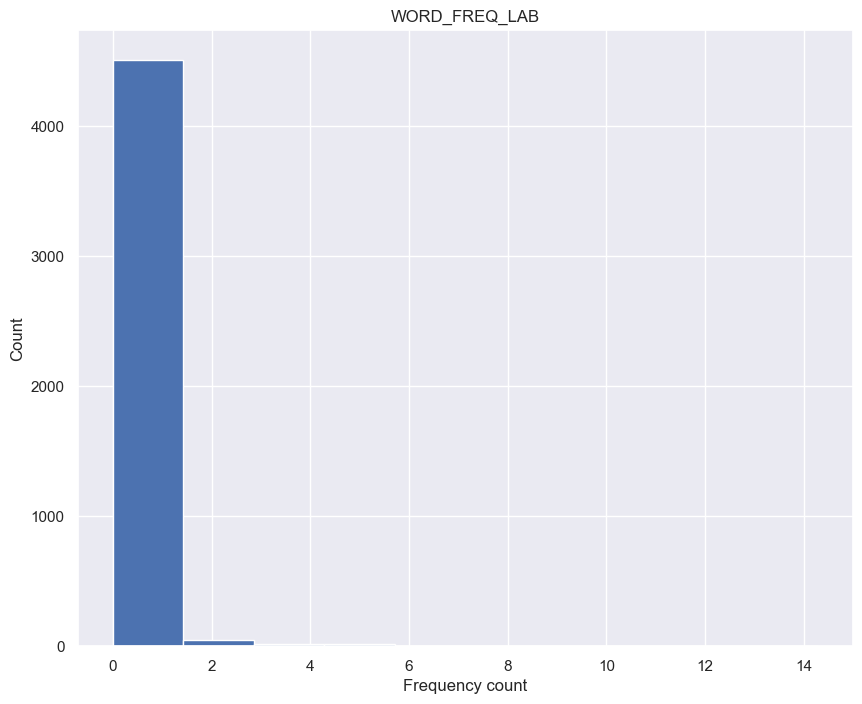

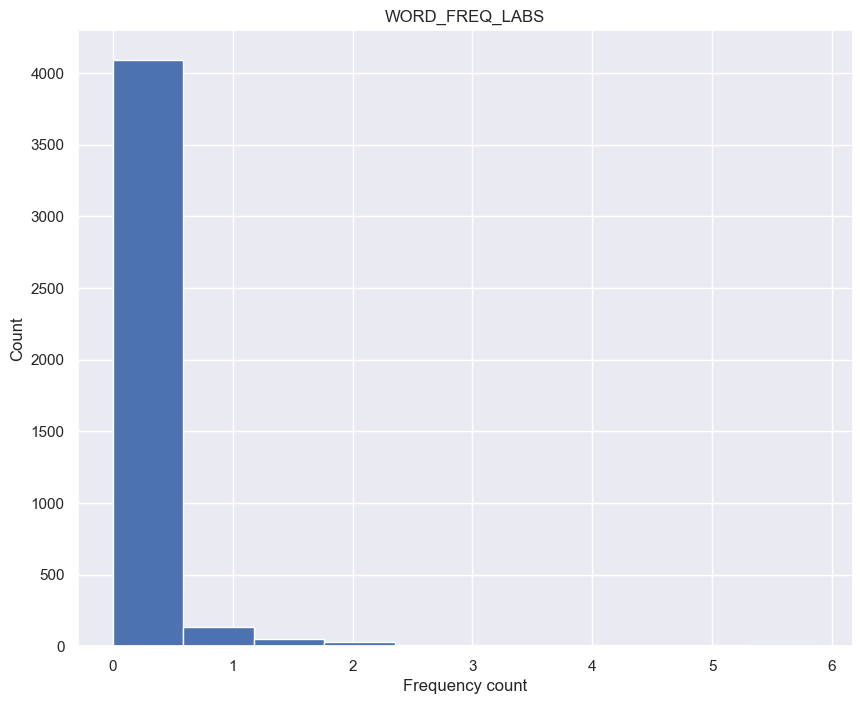

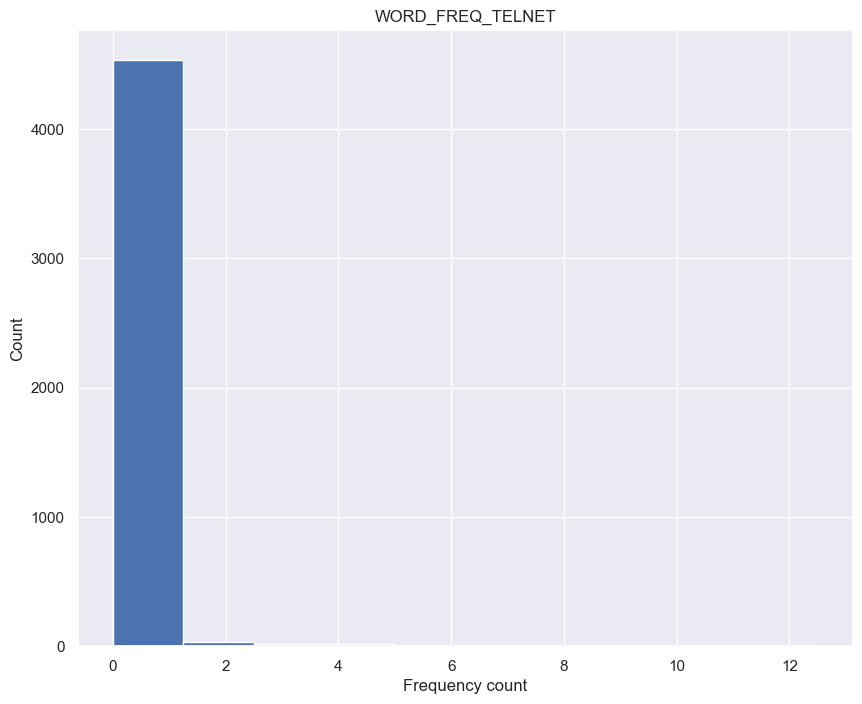

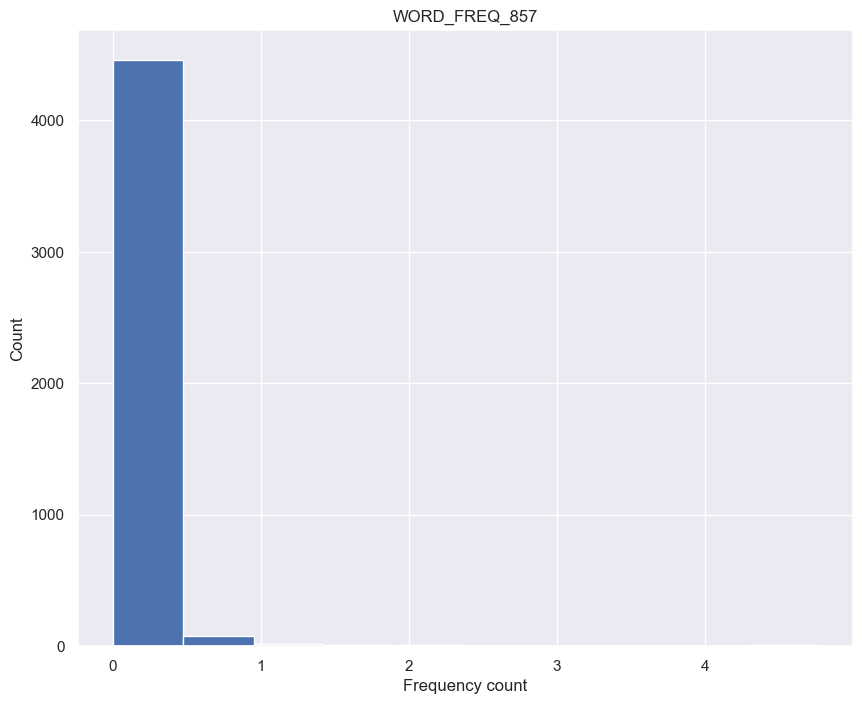

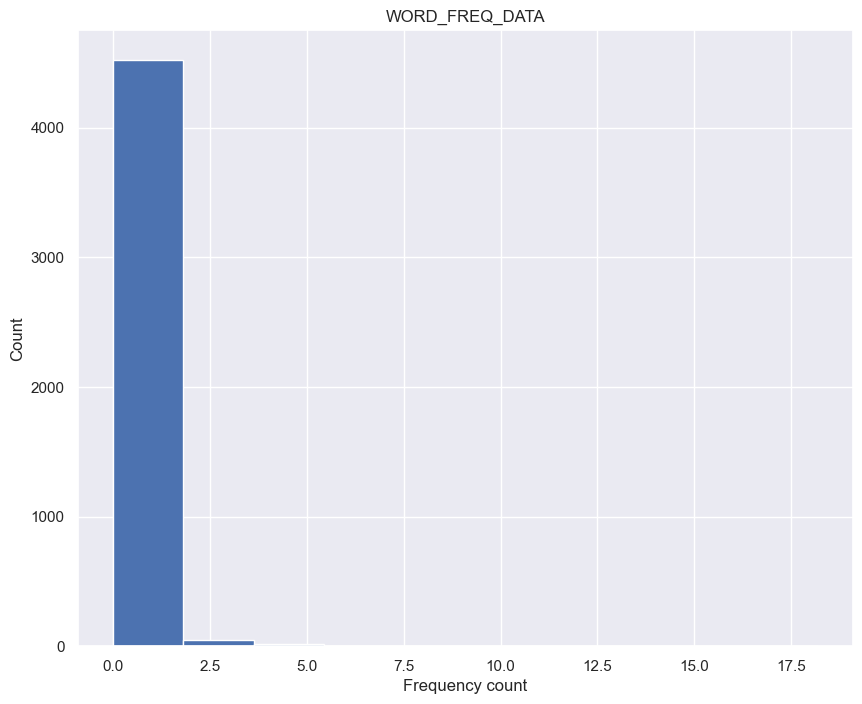

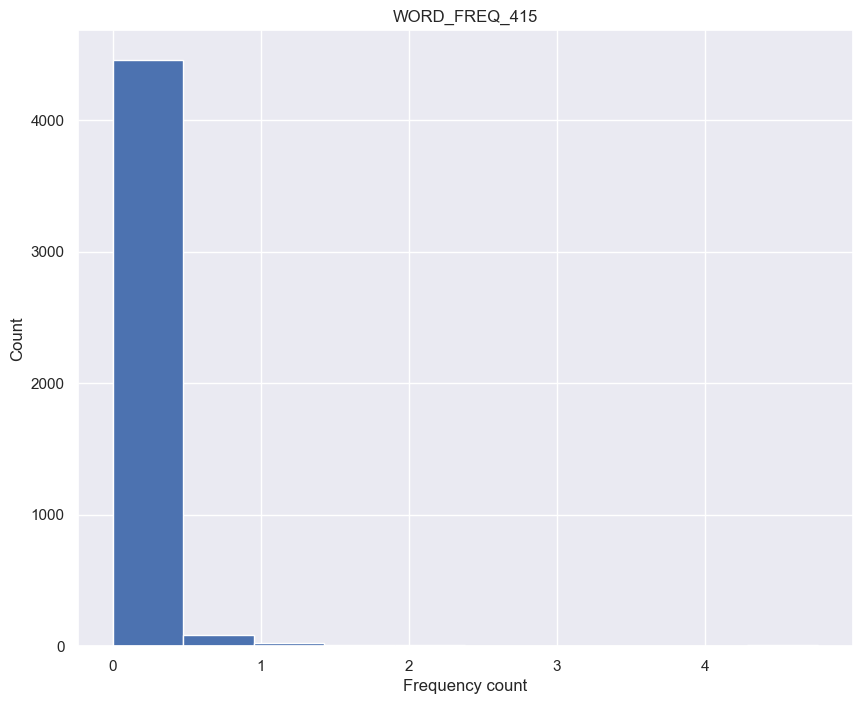

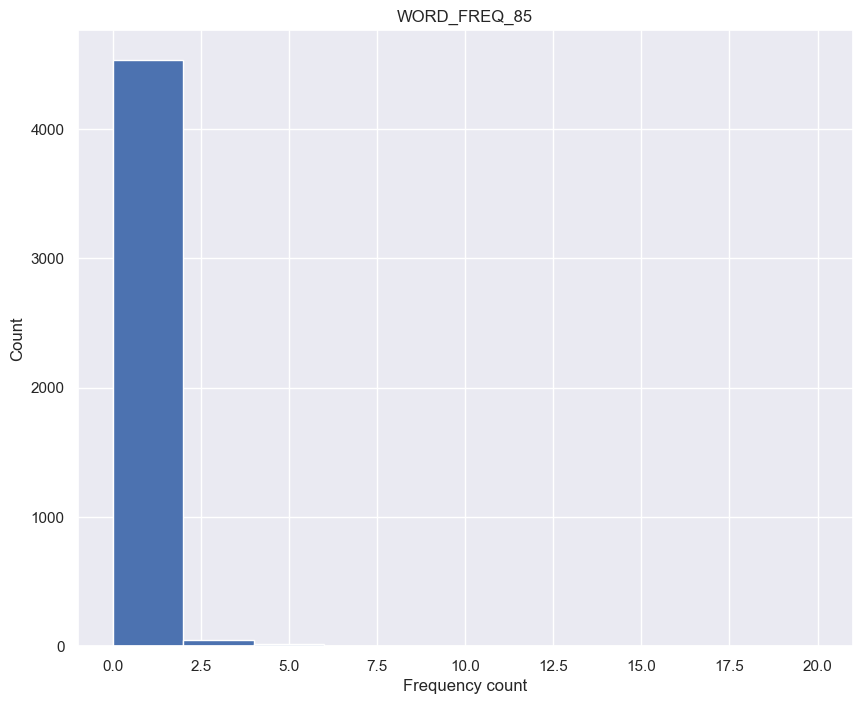

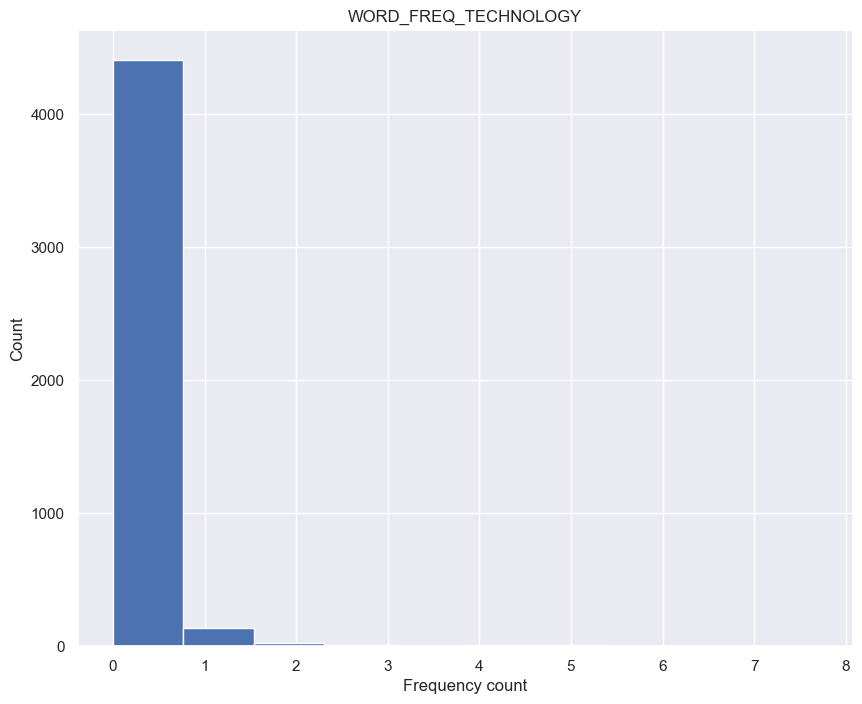

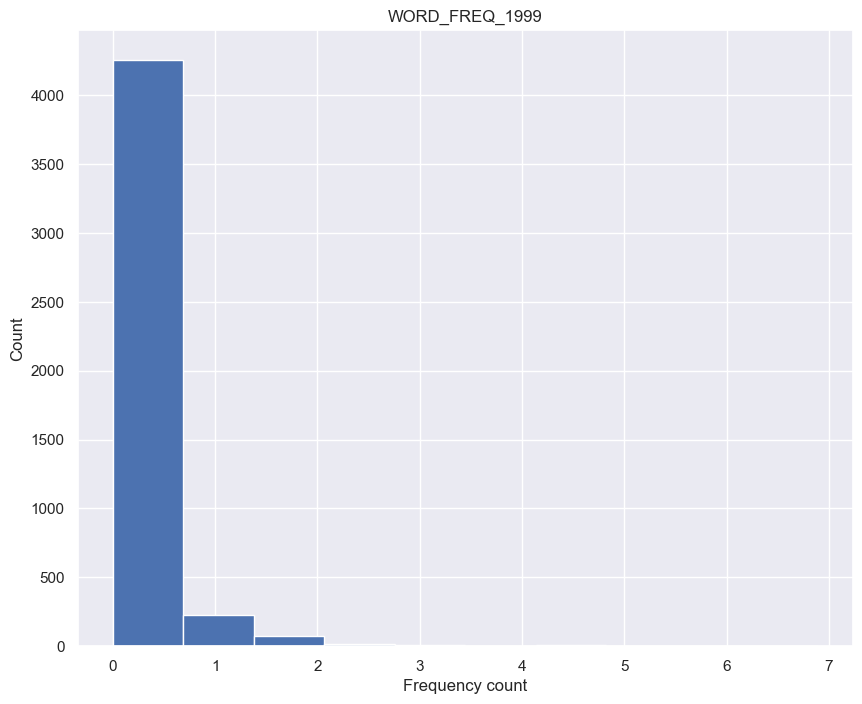

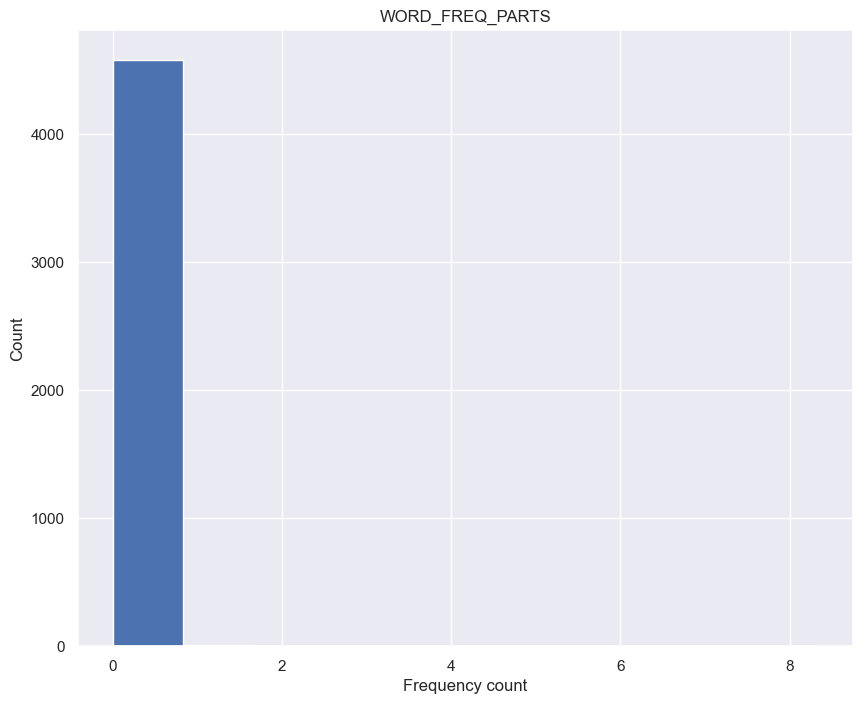

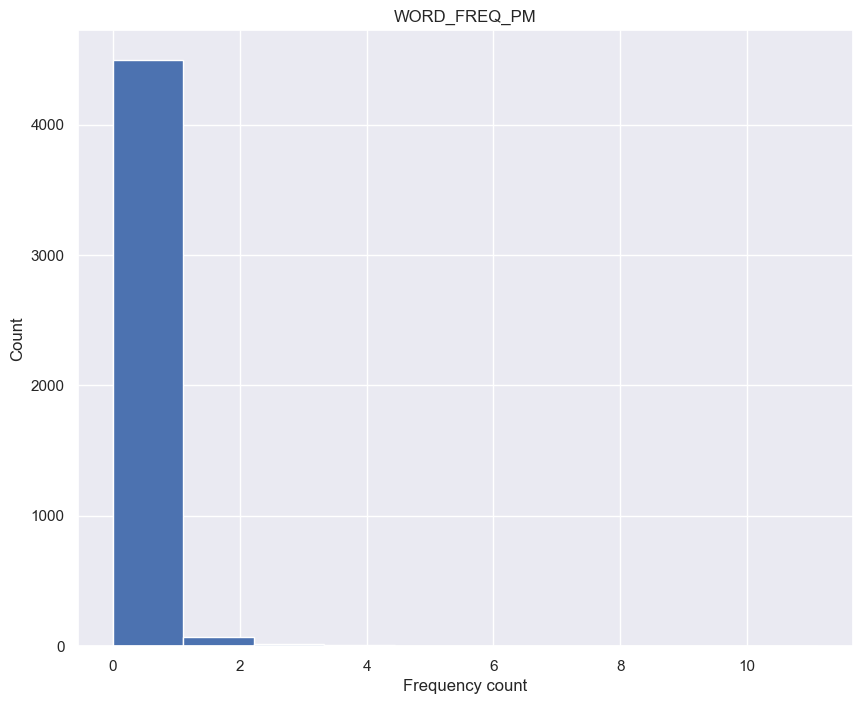

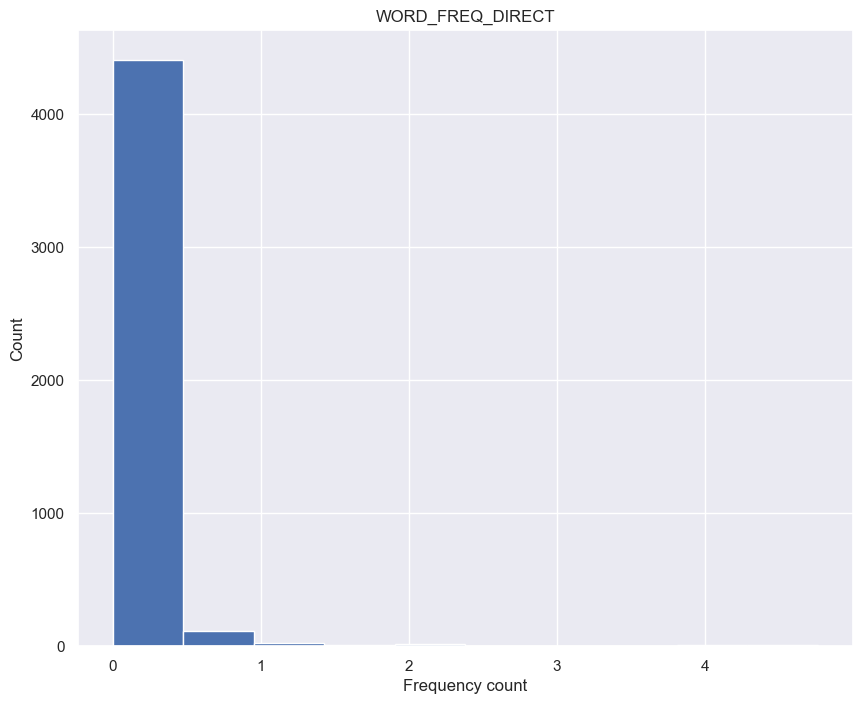

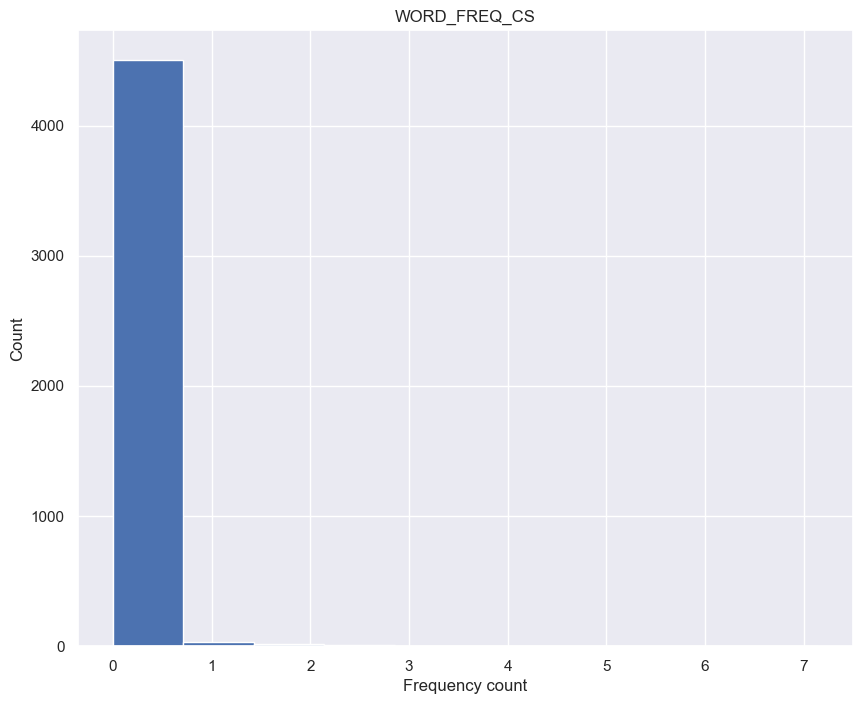

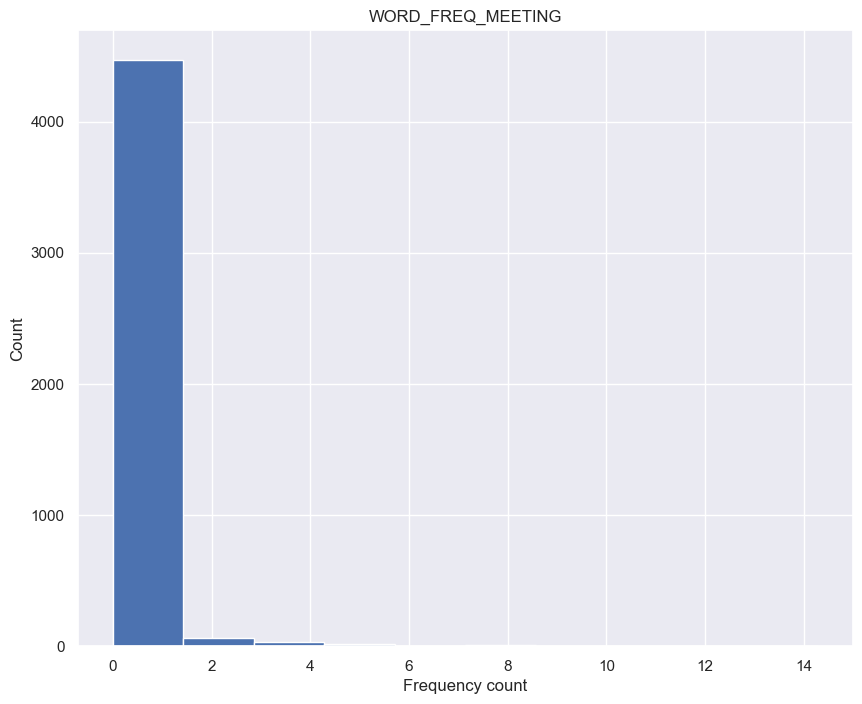

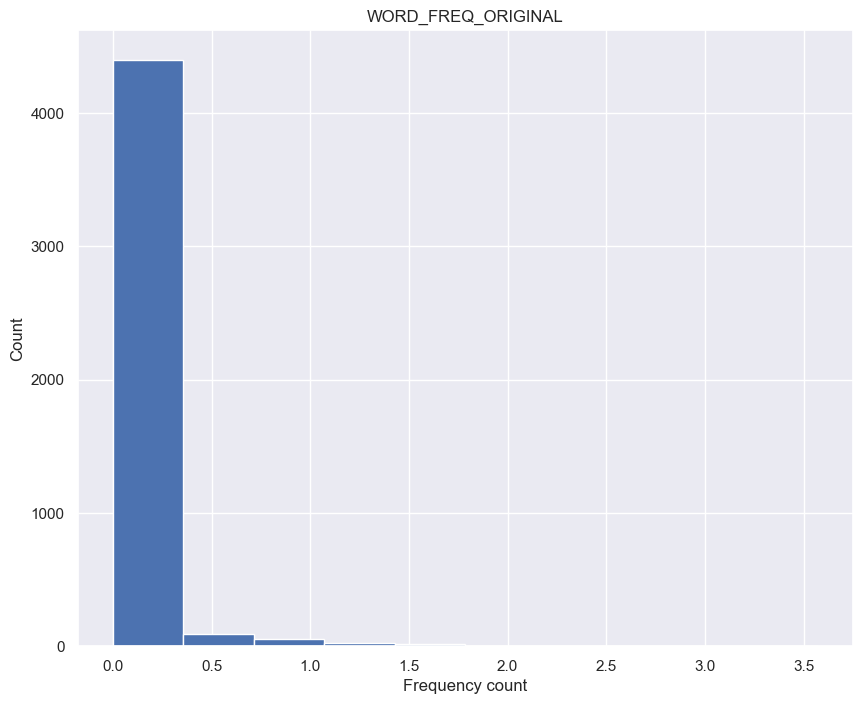

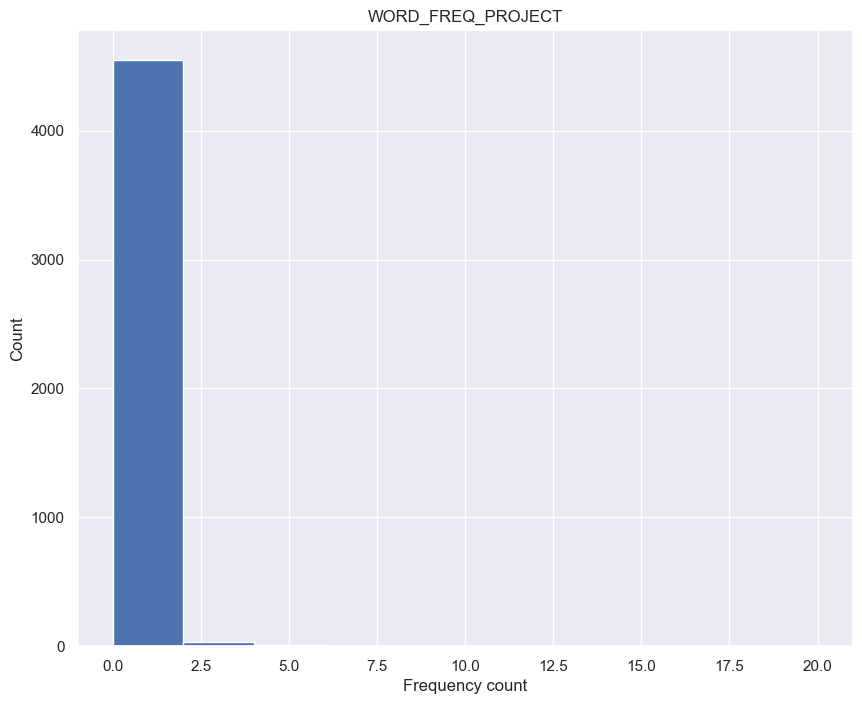

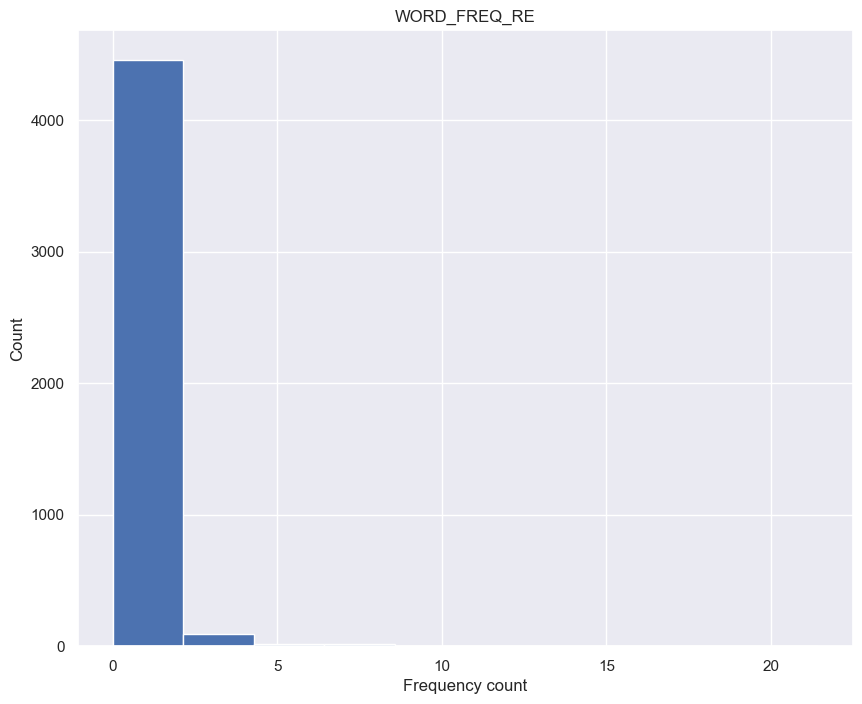

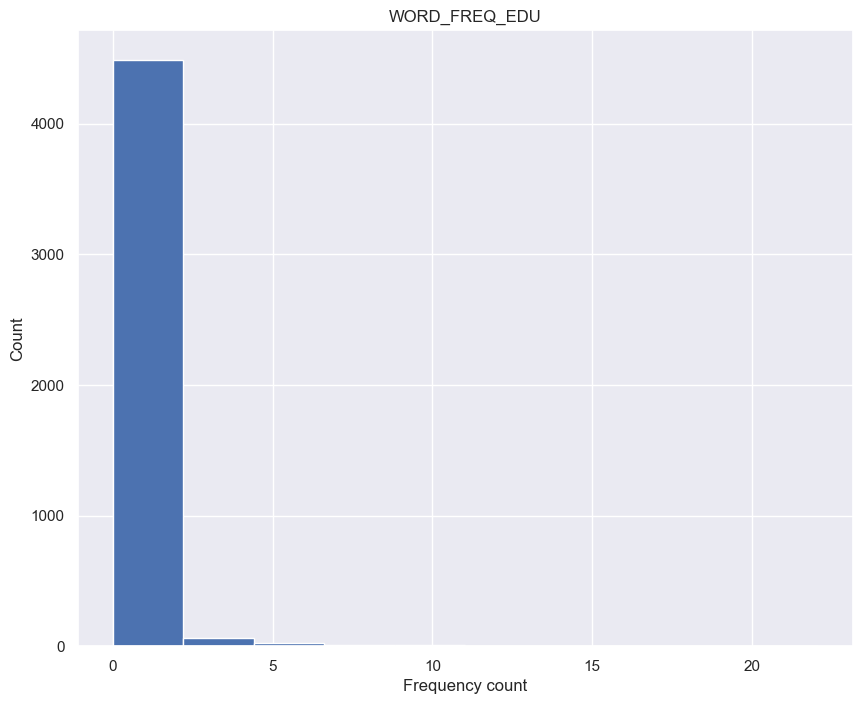

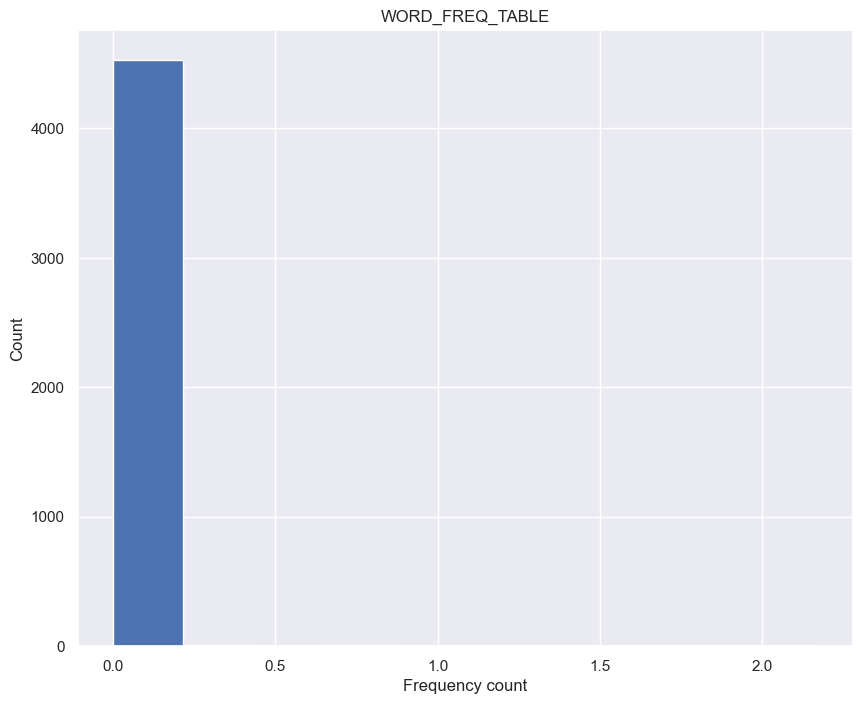

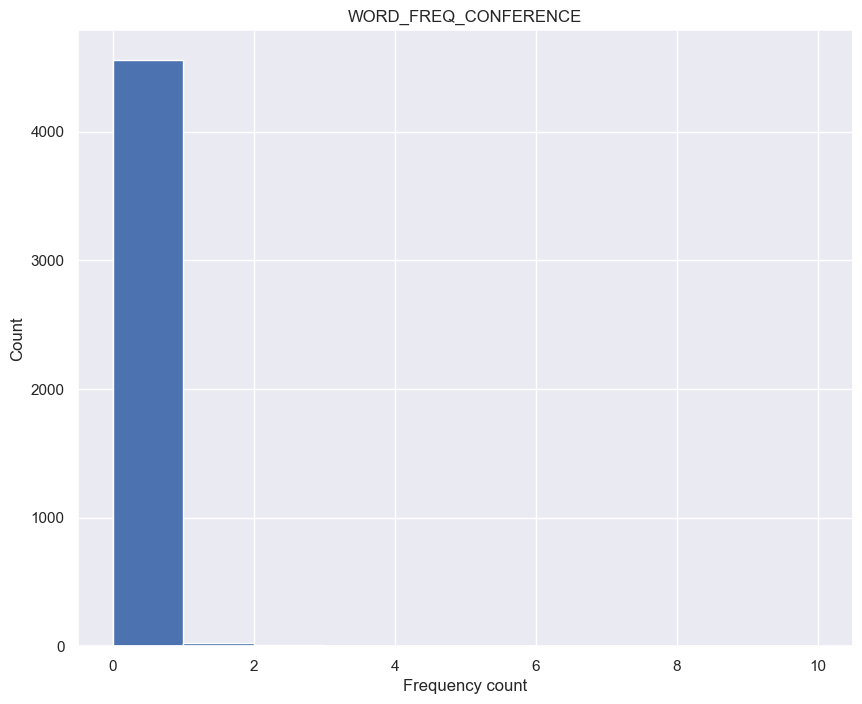

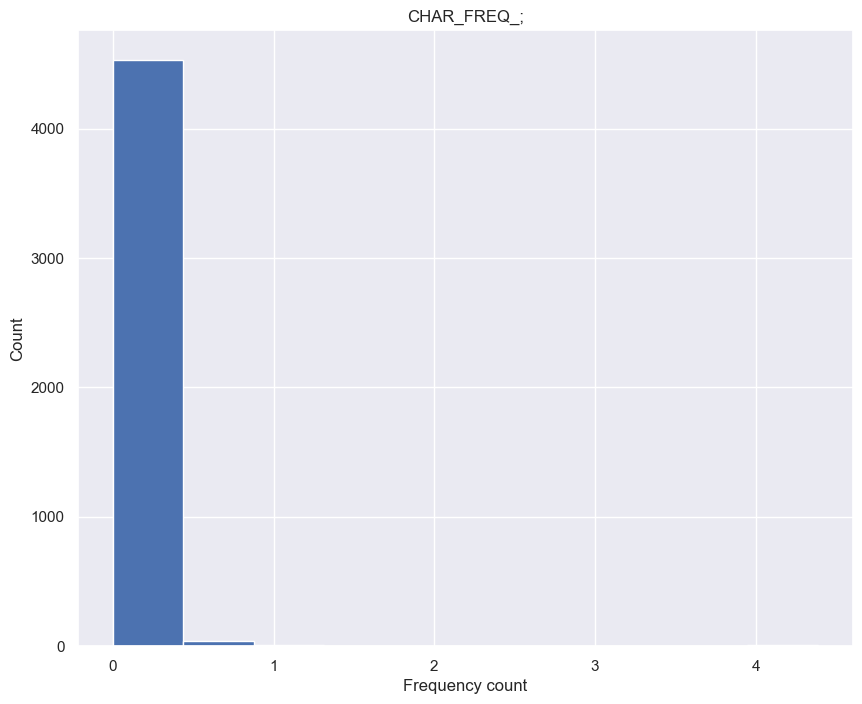

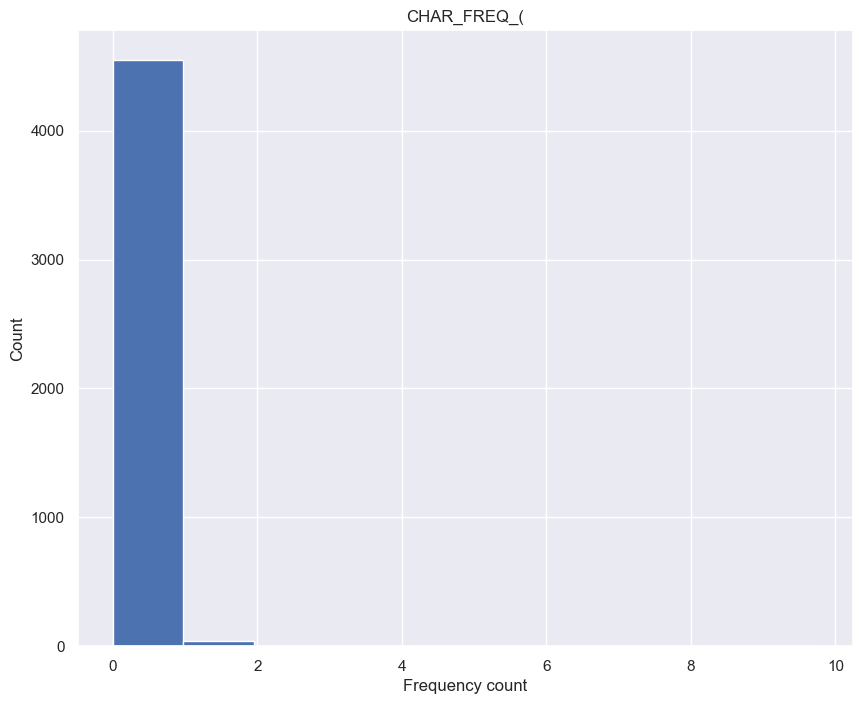

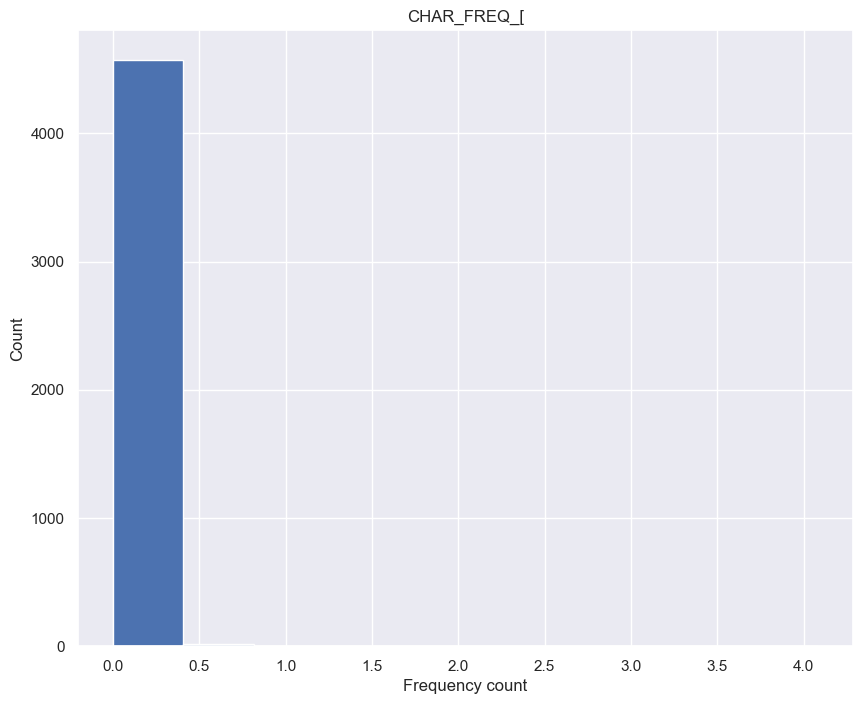

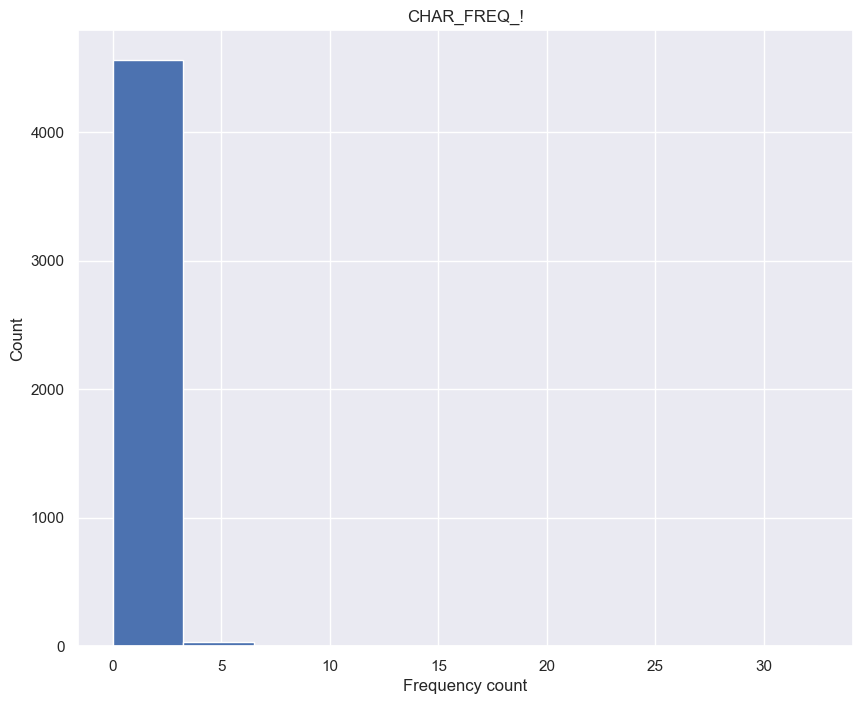

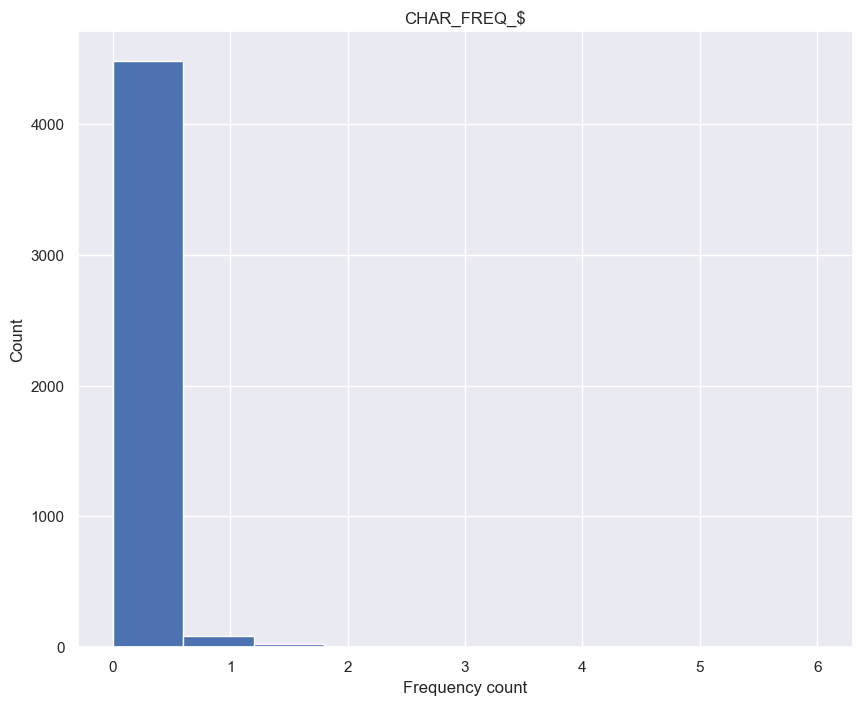

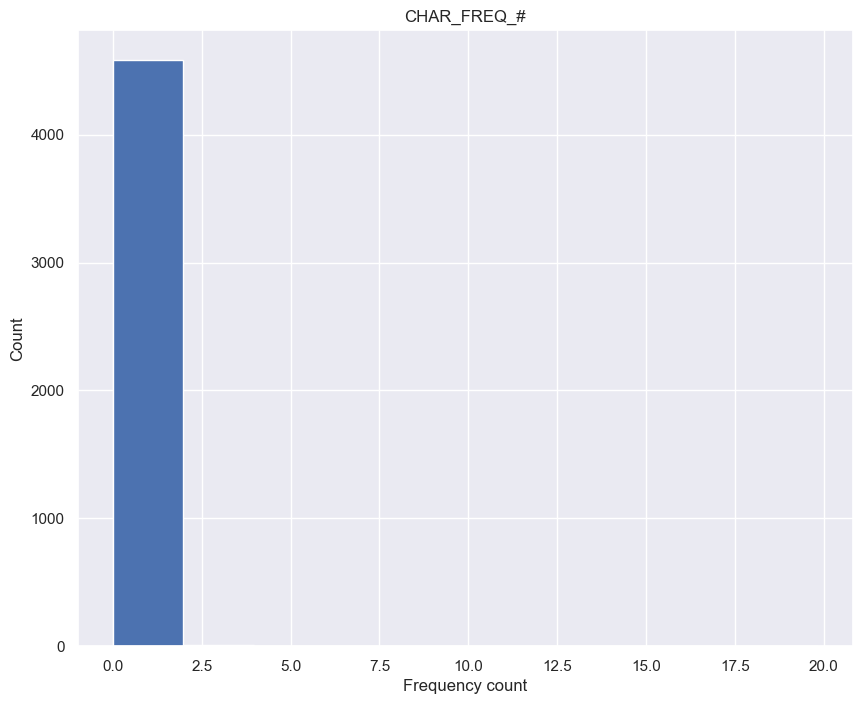

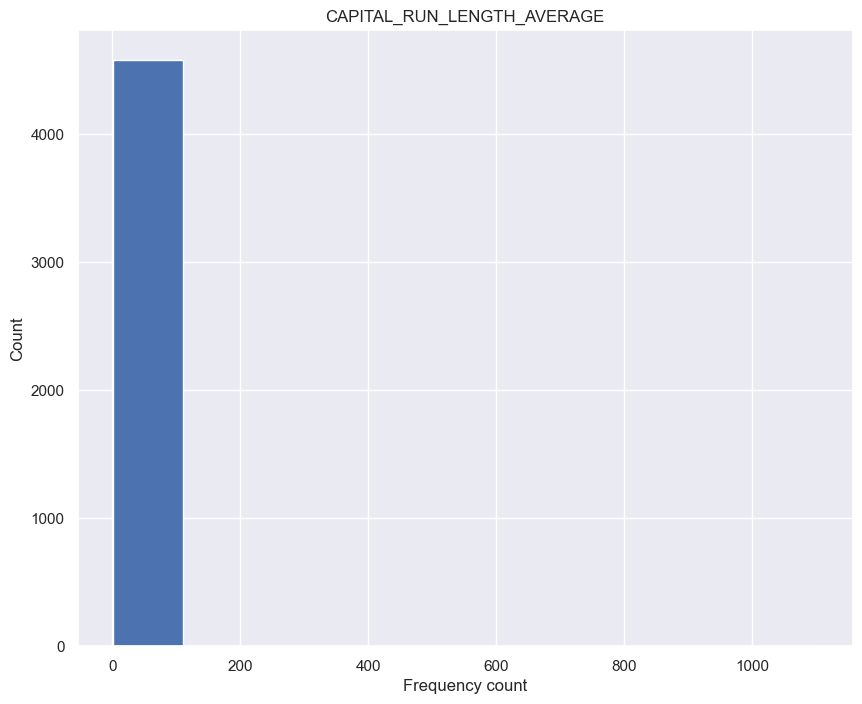

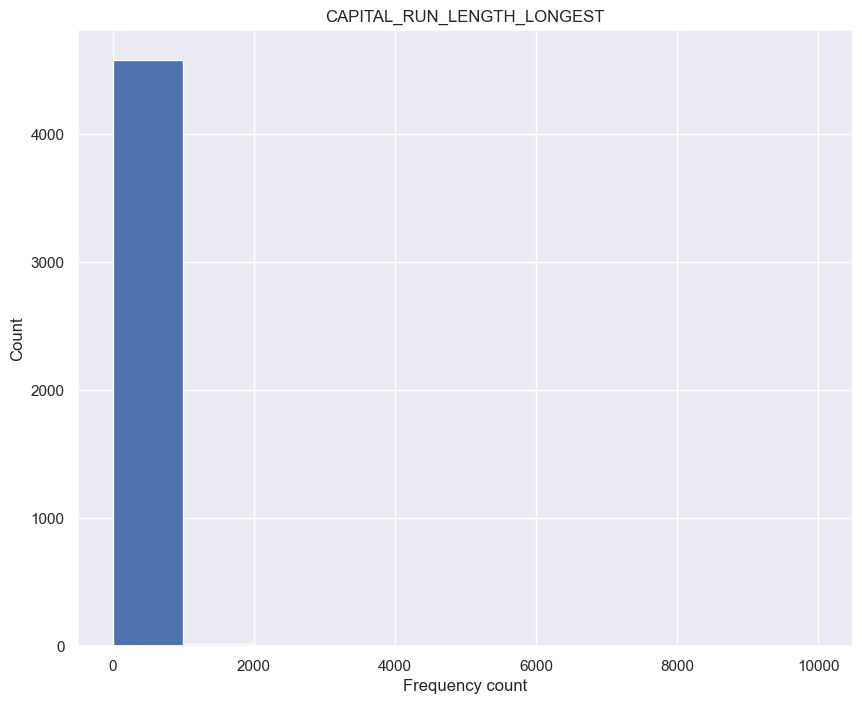

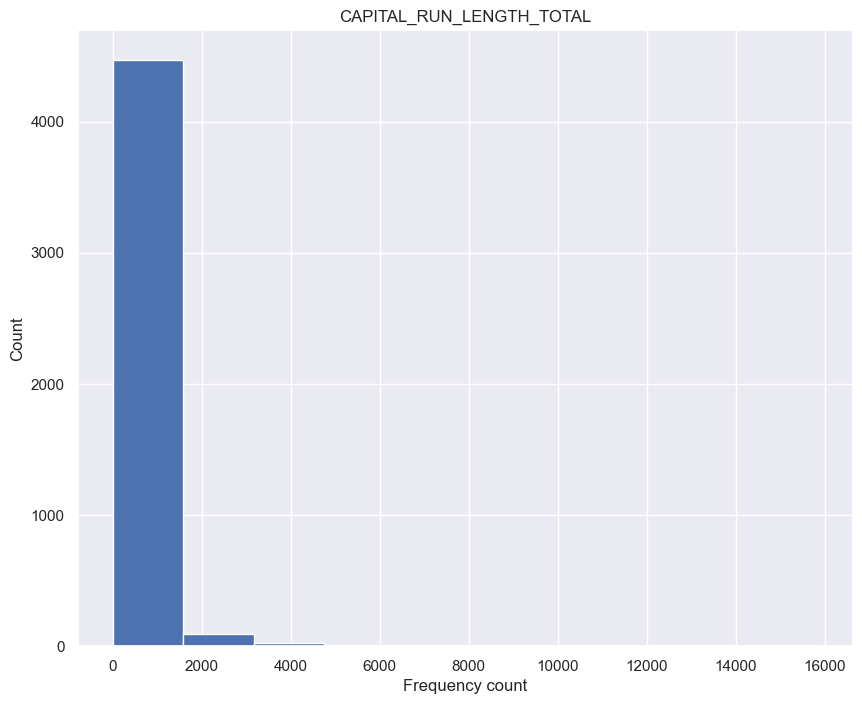

C:\Users\User\AppData\Local\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:7001: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

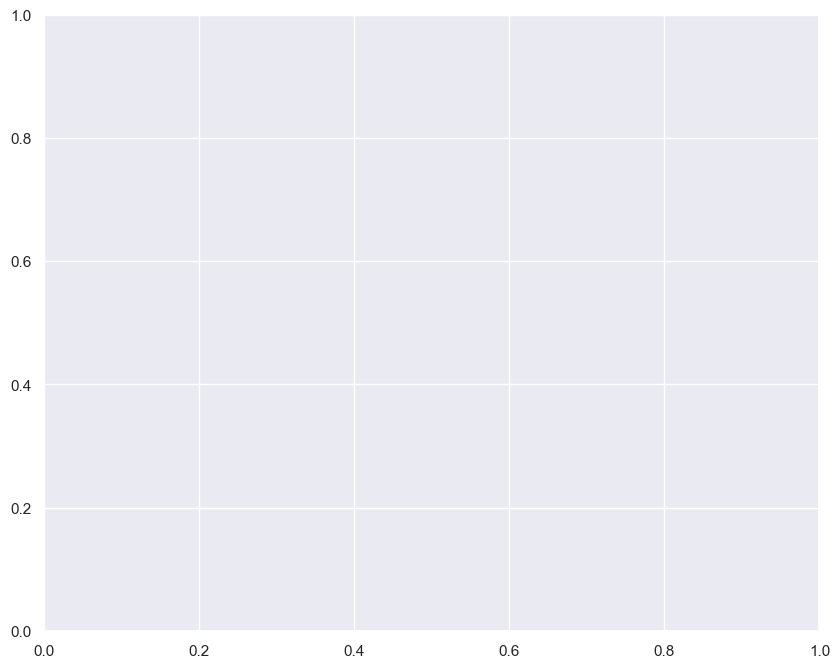

In [19]:
for col in data.columns:
  plt.figure(figsize=(10,6))
  data[col].hist(figsize=(10, 8))
  plt.title(col.upper())
  plt.ylabel('Count')
  plt.xlabel('Frequency count')
  plt.show()

The histogram plot show that the distribution of features are skewed to the right - most datapoints are concentrated on the left side or low values. This corresponds with the observation from the summary statistics.

The histogram plot also captures the bimodial distribution of some words. There are words that have two distinct categories - high and low frequencies This indicates that some words and characters that are associated with spam and non spam emails. 

Because the features have an imbalanced distribution, the median will be used to replace missing values

# replacing missing values with the median an checking the count of missing values

In [20]:
data = data.fillna(data.median())

data.isna().sum().sum()

0

# Analyzing outliers

# checking the upper limit, lower limit, total outliers and percentage of outliers in the features using the interquartile range

In [21]:
for col in data.select_dtypes(include='number').columns:
    q3, q1 = np.percentile(data[col], [75,25])
    iqr = q3 - q1
    upper_lim = q3 + 1.5 * iqr
    lower_lim = q1 - 1.5 * iqr
    
    total_outliers = len(data.loc[data[col] > upper_lim]) + len(data.loc[data[col] < lower_lim])
    percent_outliers = (total_outliers/len(data))*100

    print('column:', col)
    print('upper limit:', upper_lim)
    print('lower limit:', lower_lim)
    print('total outliers:', total_outliers)
    print('percent outliers:', percent_outliers)
    print('---------------------------')
    print(' ')

column: word_freq_make
upper limit: 0.0
lower limit: 0.0
total outliers: 1053
percent outliers: 22.88632905890024
---------------------------
 
column: word_freq_address
upper limit: 0.0
lower limit: 0.0
total outliers: 898
percent outliers: 19.517496196479026
---------------------------
 
column: word_freq_all
upper limit: 1.05
lower limit: -0.63
total outliers: 338
percent outliers: 7.346229080634645
---------------------------
 
column: word_freq_3d
upper limit: 0.0
lower limit: 0.0
total outliers: 47
percent outliers: 1.0215170615083677
---------------------------
 
column: word_freq_our
upper limit: 0.9500000000000001
lower limit: -0.5700000000000001
total outliers: 501
percent outliers: 10.888937187567919
---------------------------
 
column: word_freq_over
upper limit: 0.0
lower limit: 0.0
total outliers: 999
percent outliers: 21.712671158443815
---------------------------
 
column: word_freq_remove
upper limit: 0.0
lower limit: 0.0
total outliers: 807
percent outliers: 17.53966

# checking the distribution using the box plot to visually identify  outliers

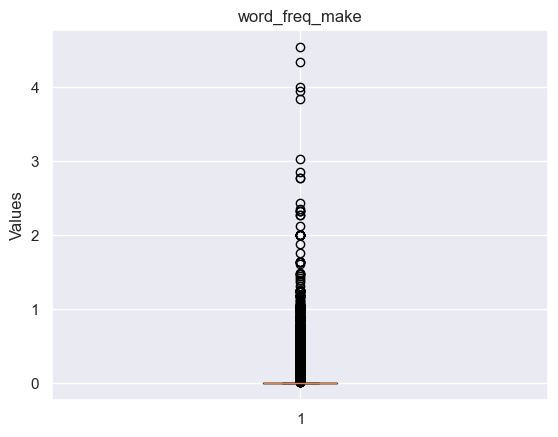

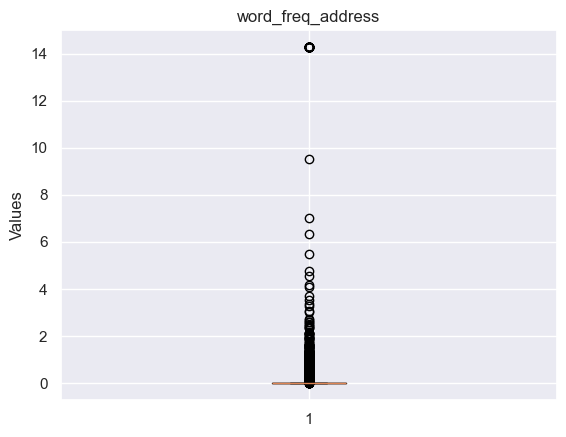

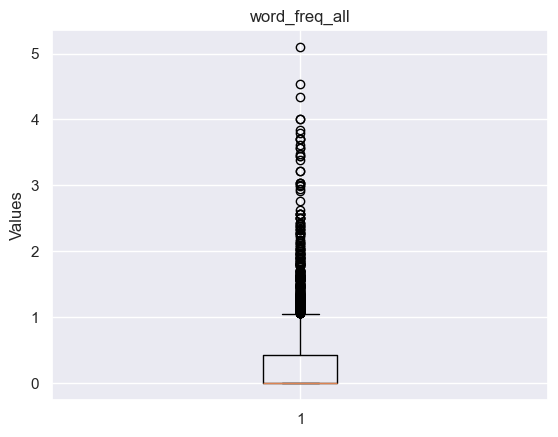

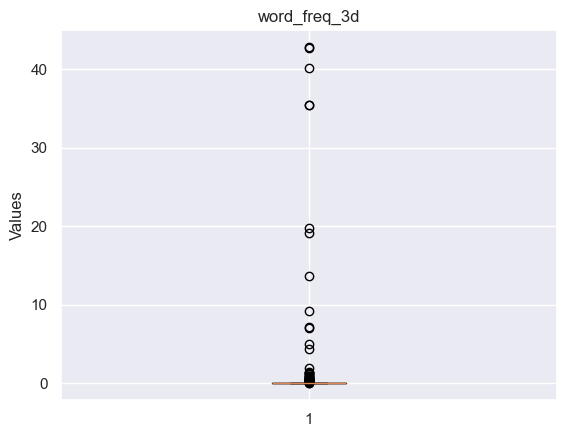

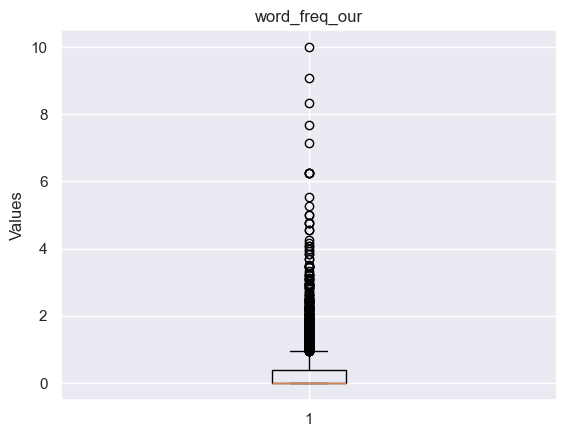

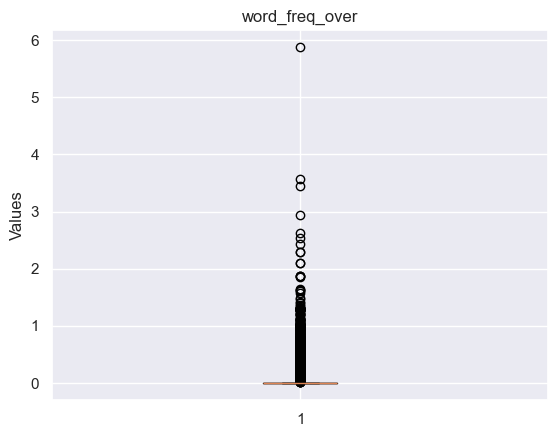

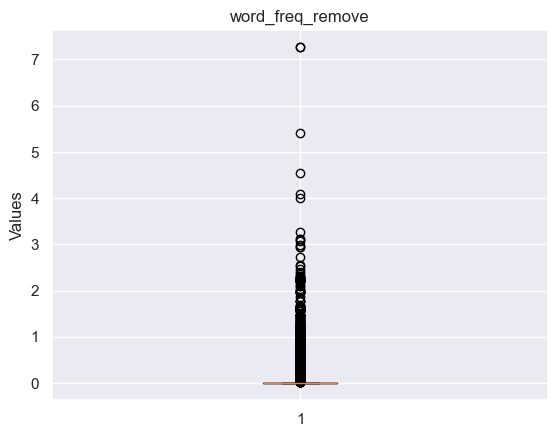

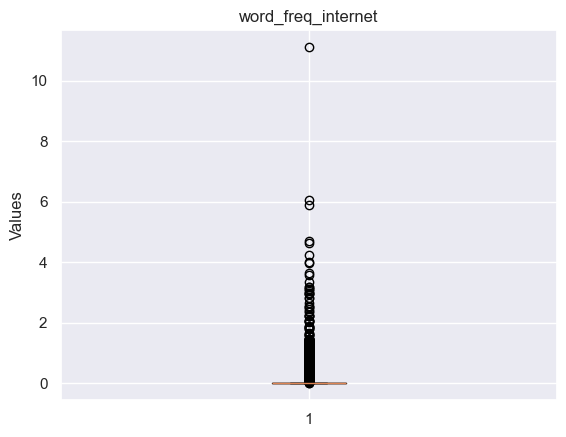

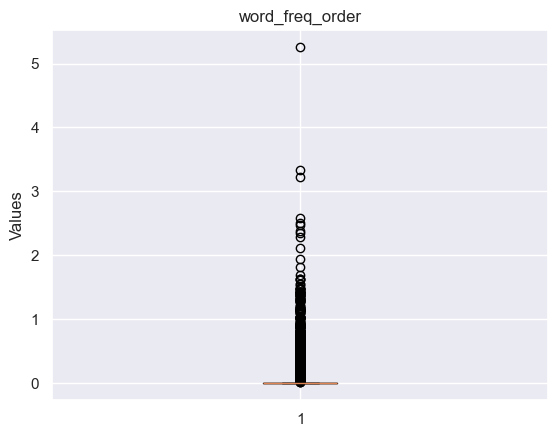

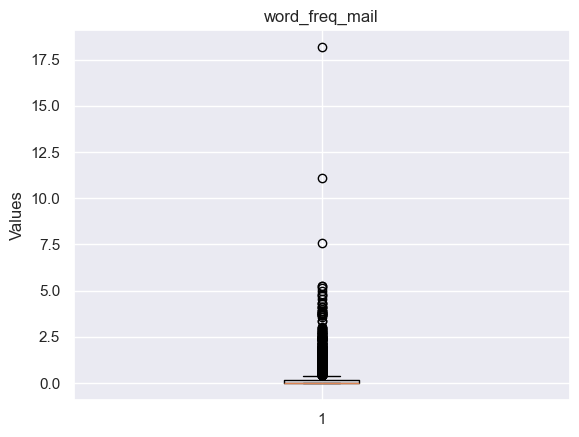

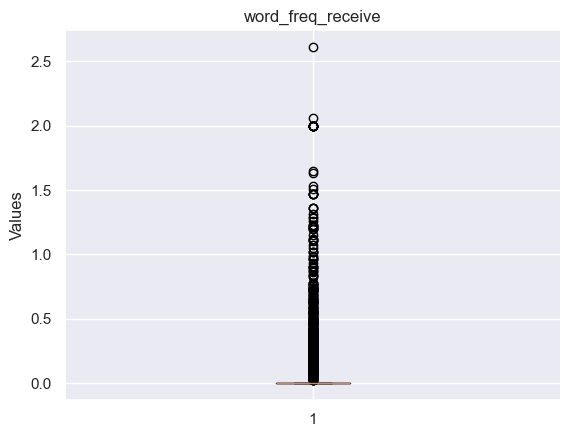

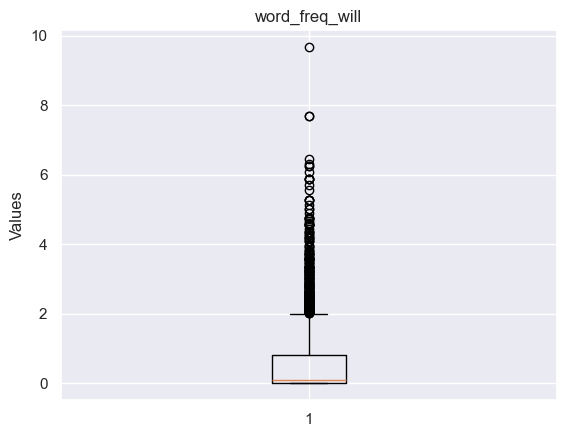

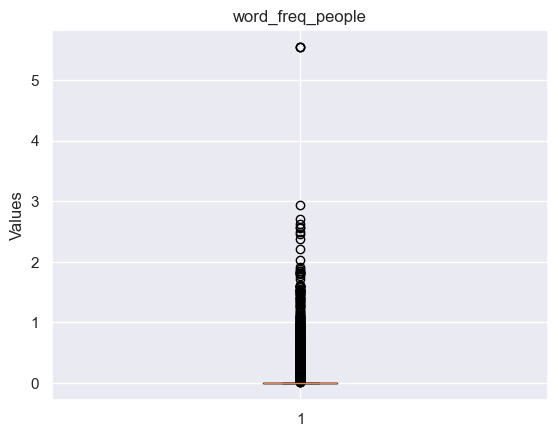

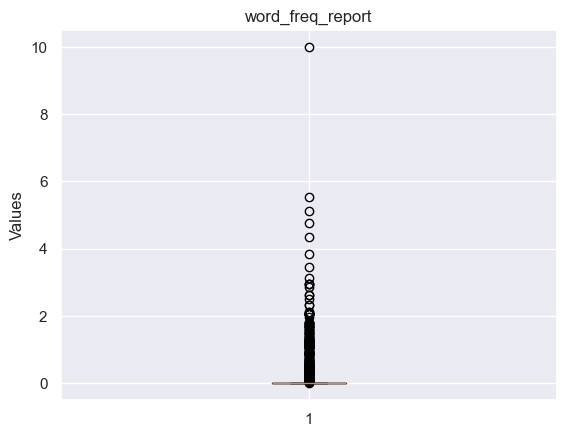

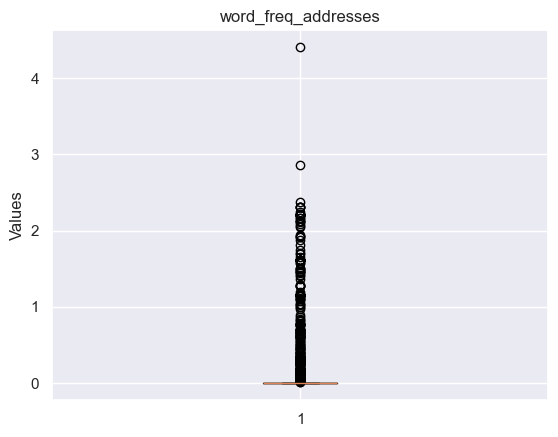

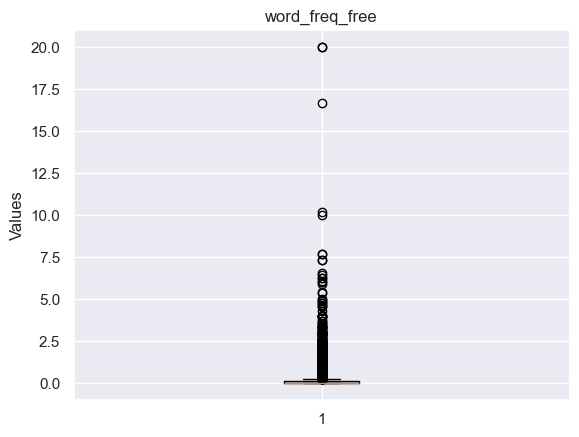

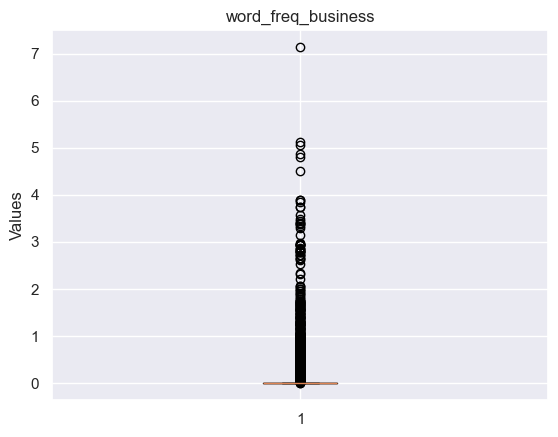

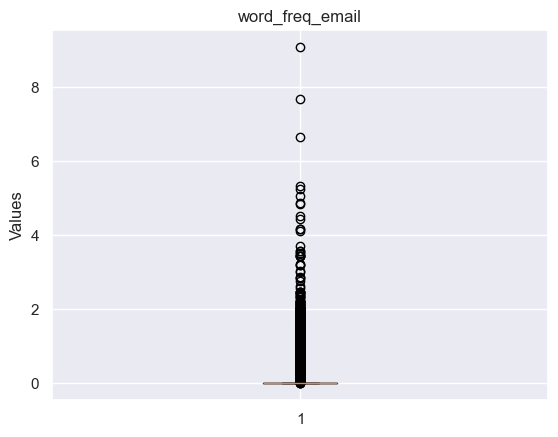

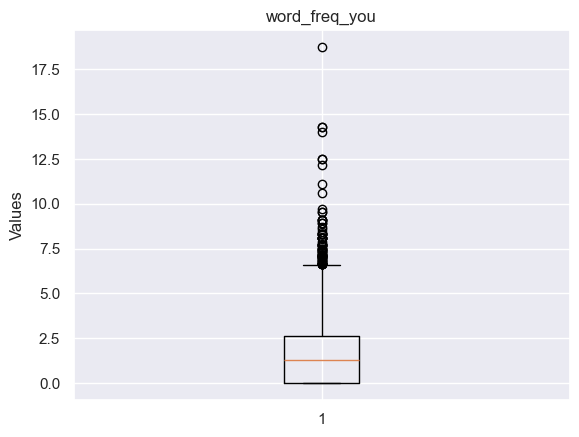

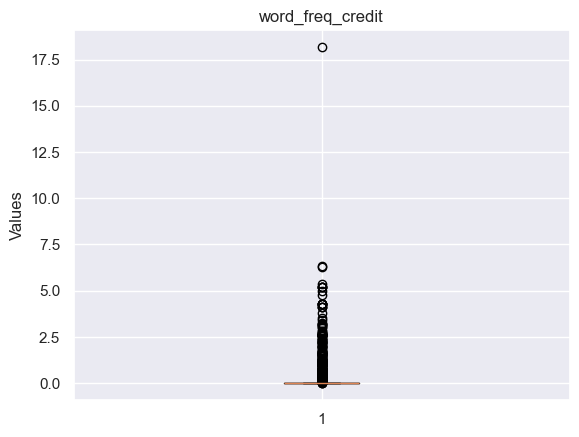

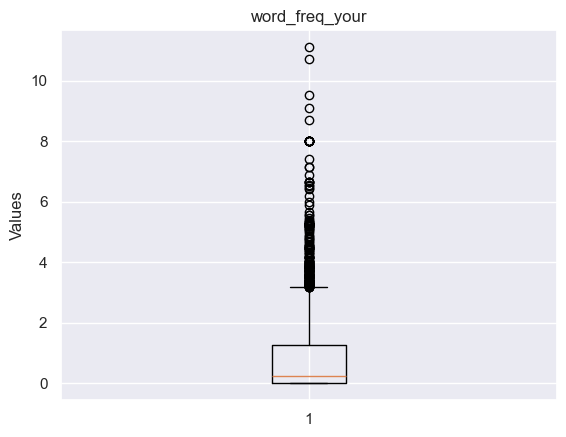

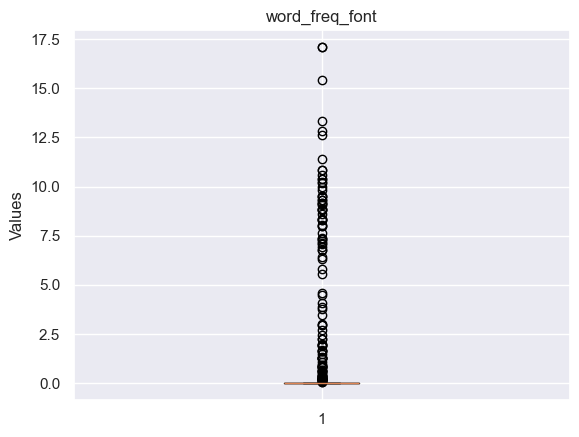

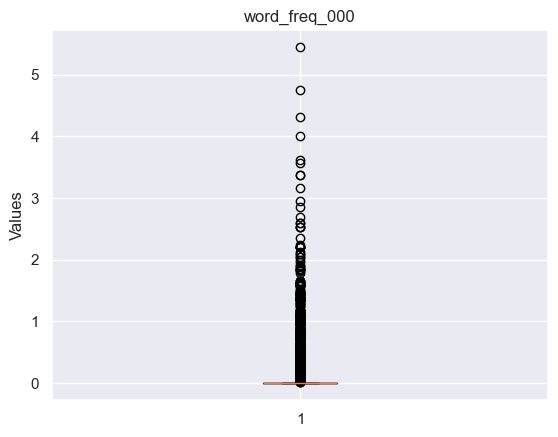

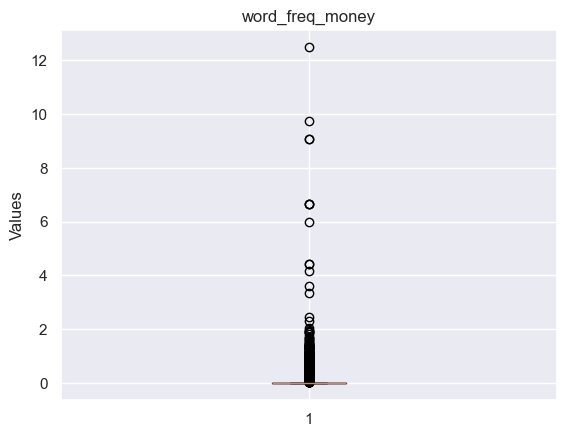

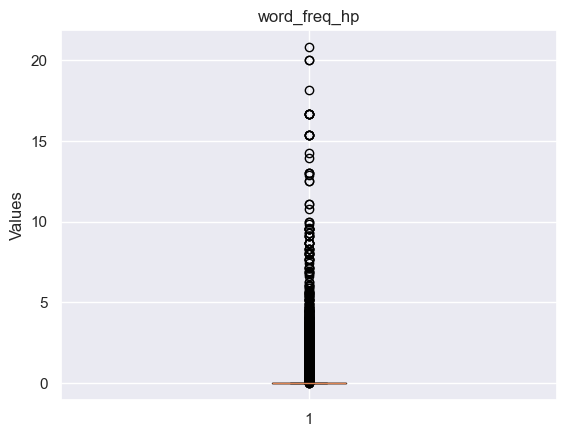

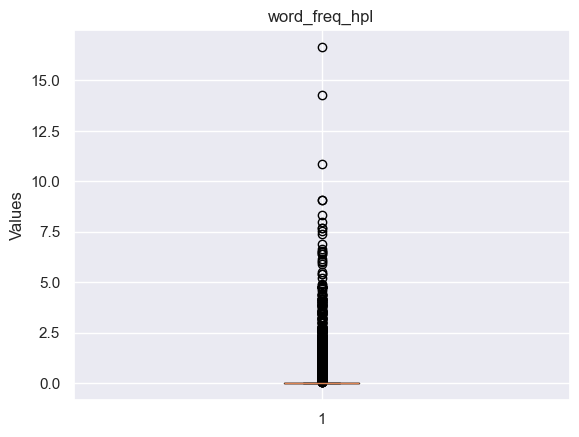

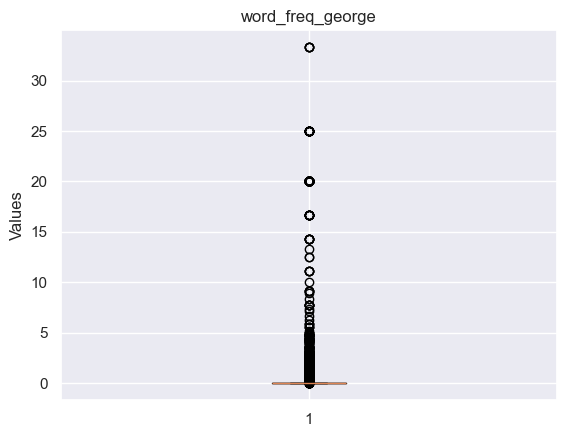

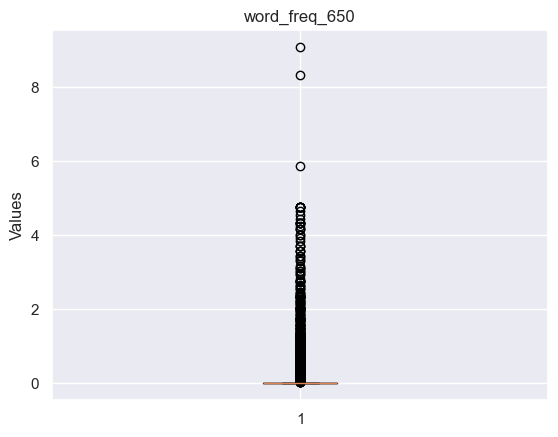

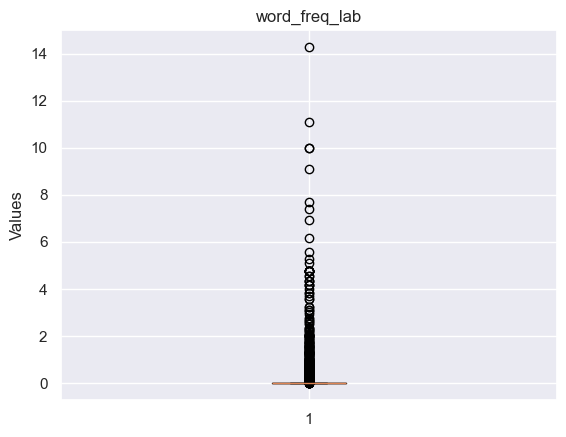

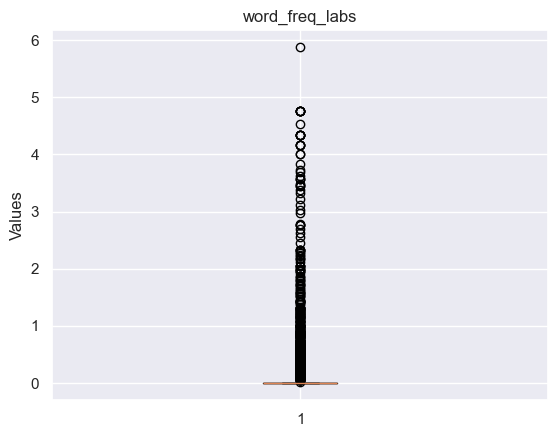

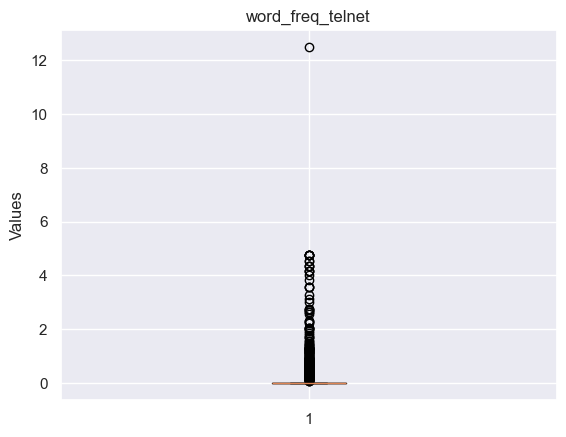

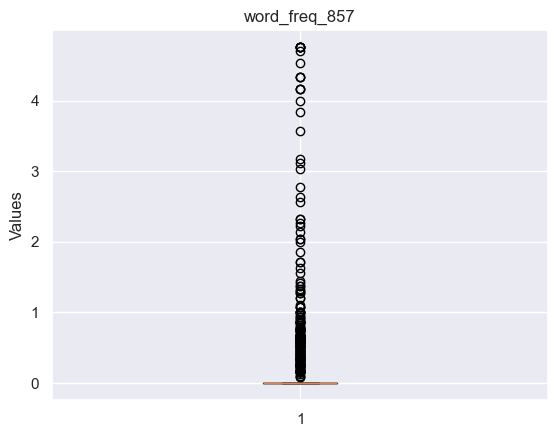

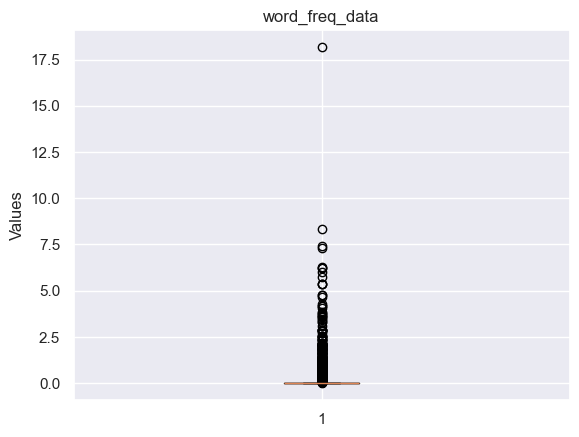

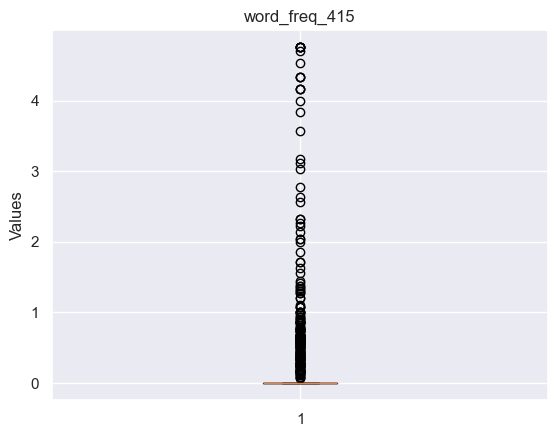

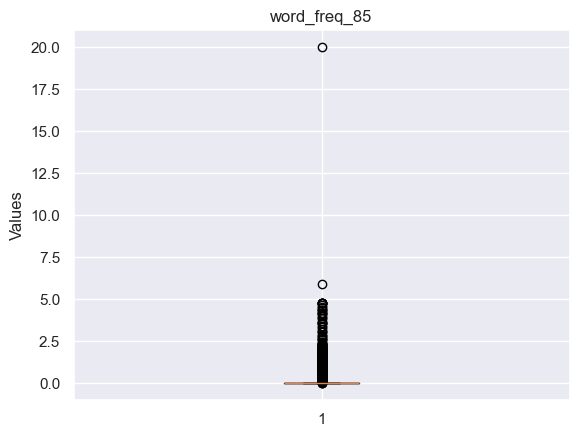

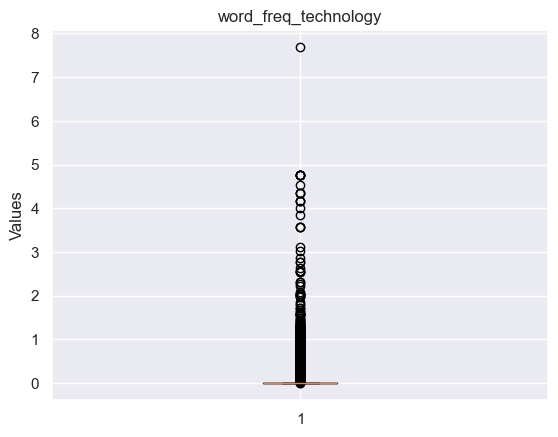

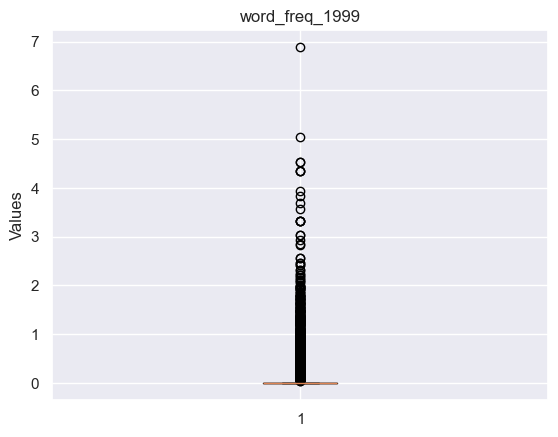

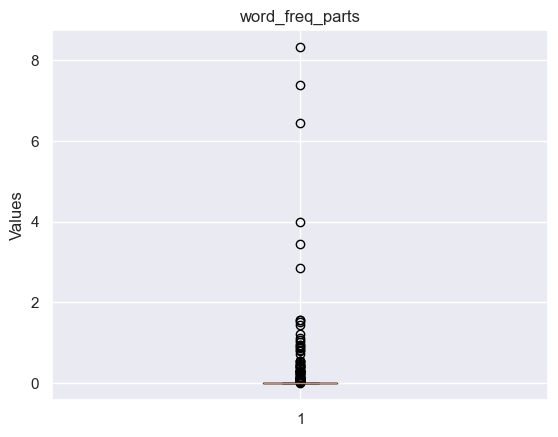

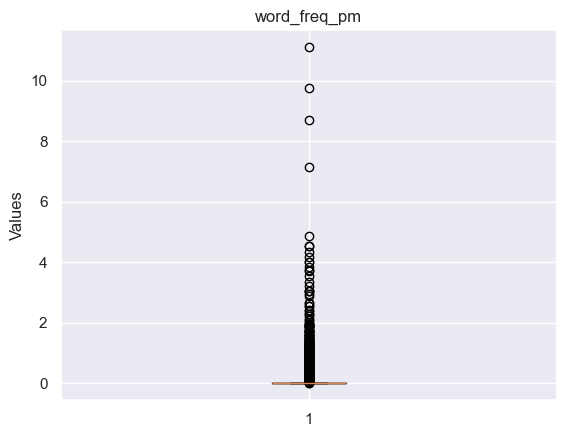

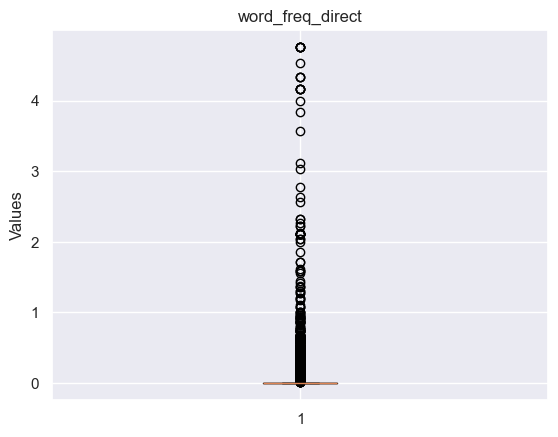

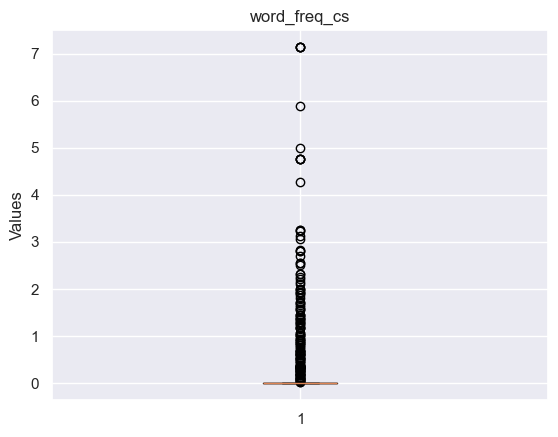

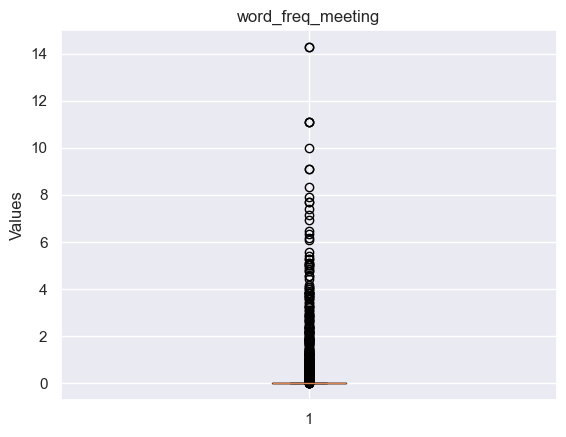

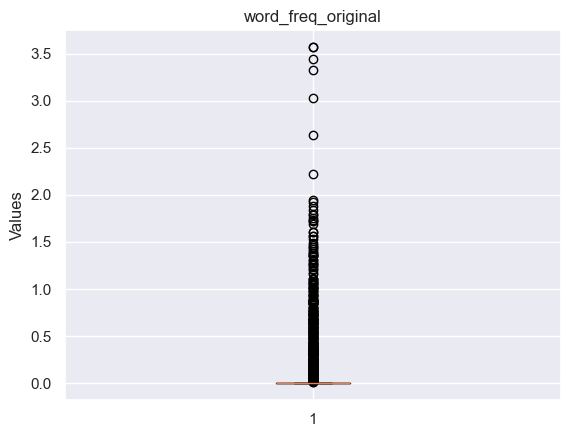

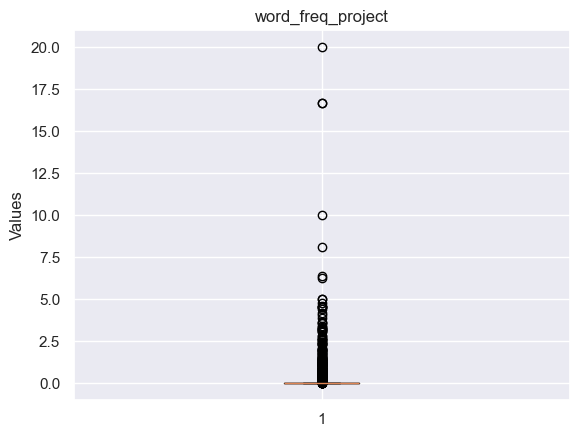

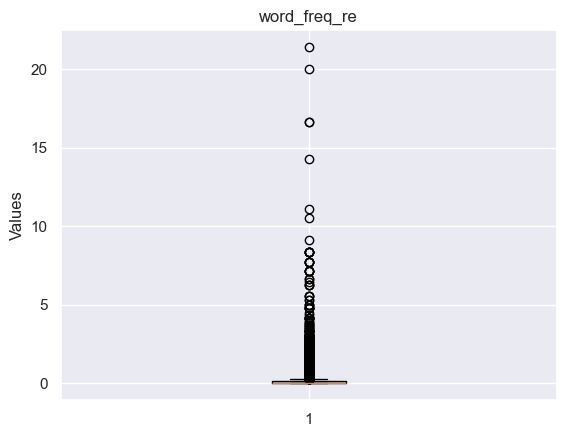

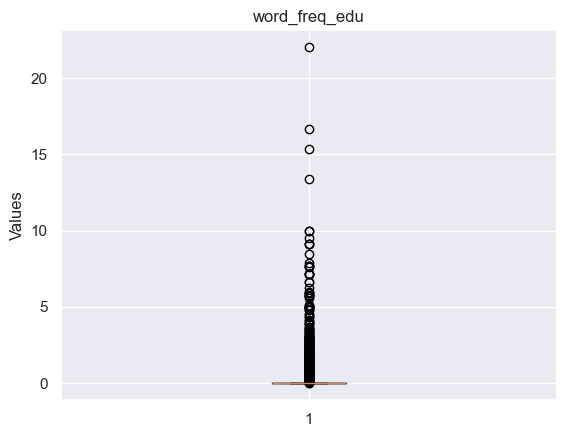

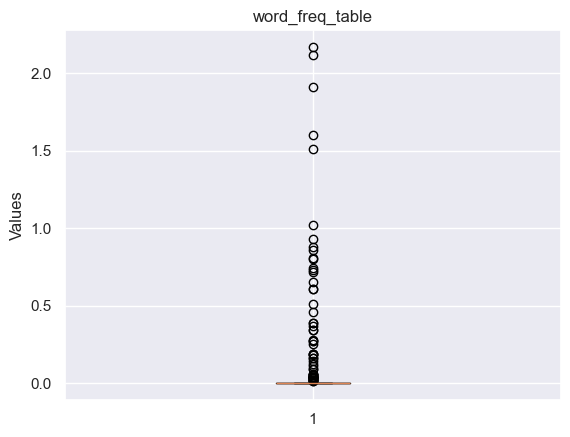

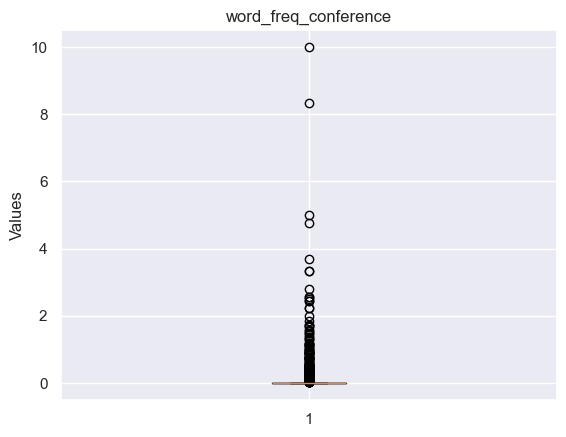

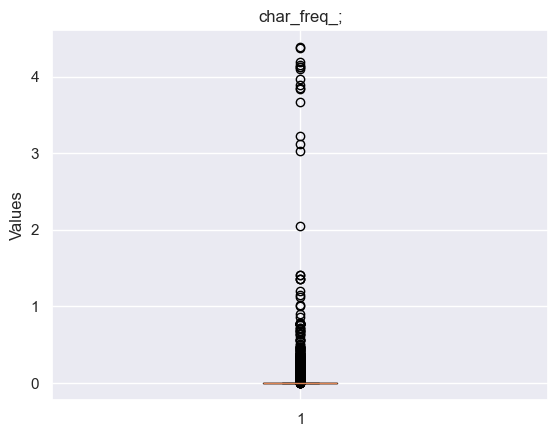

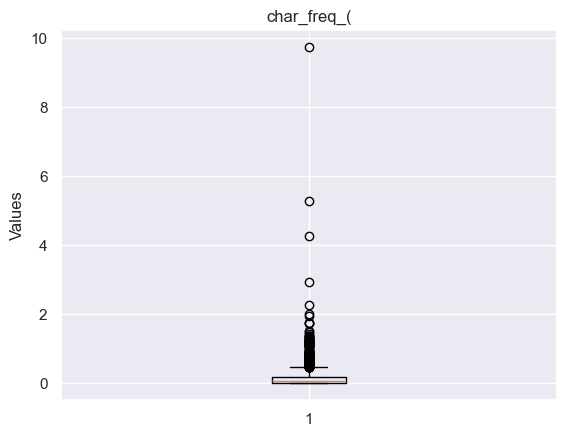

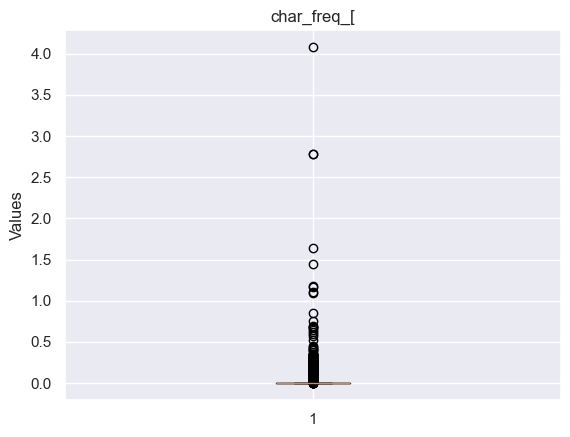

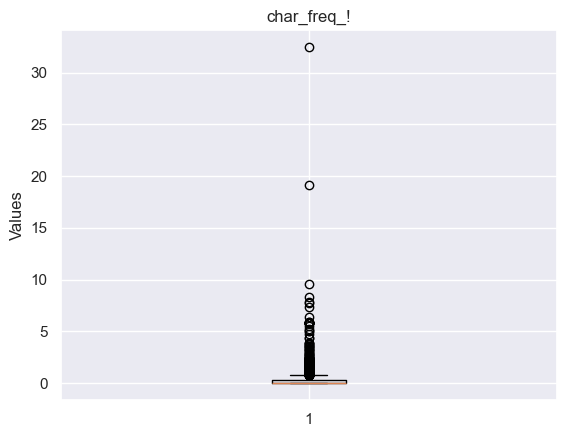

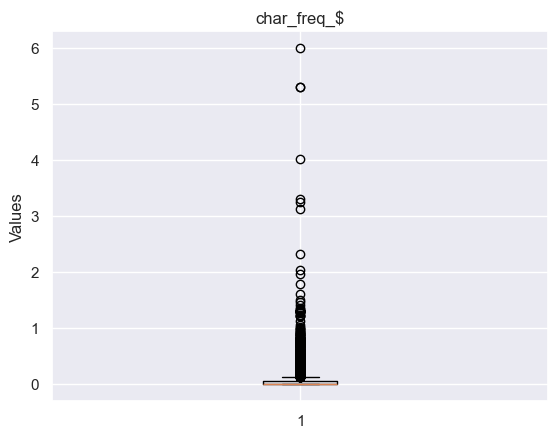

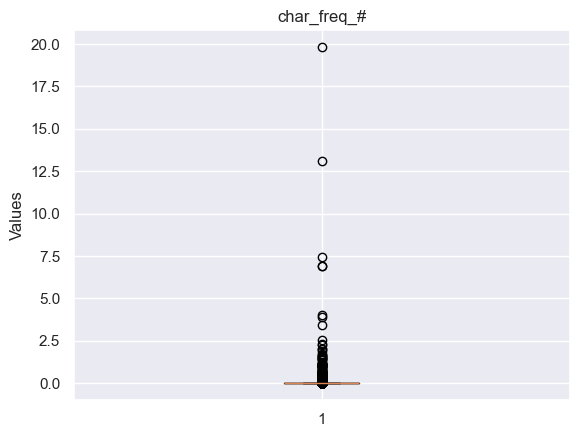

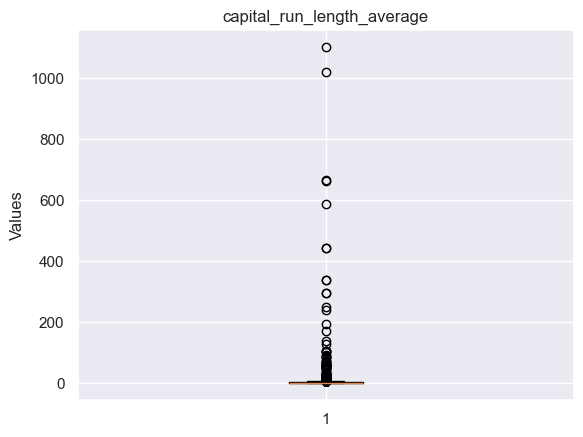

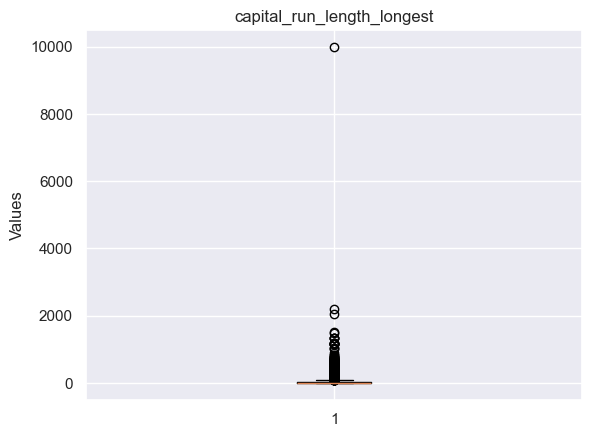

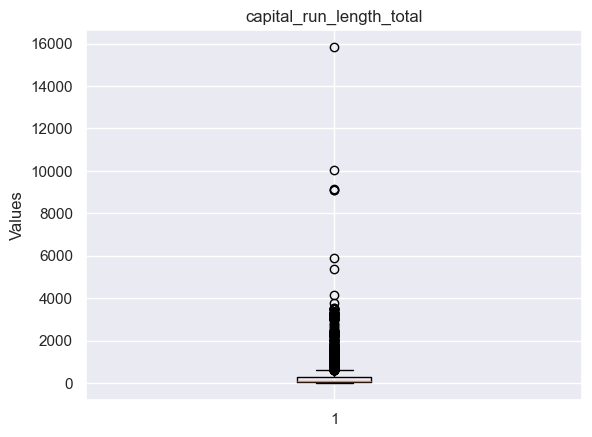

In [22]:
for col in data.select_dtypes(include='number').columns:
    plt.boxplot(data[col].dropna())
    plt.title(col)
    plt.ylabel('Values')
    plt.show()

Given that most of the datapoints of the features are on the left side or lower value or right skew, which represent a low or no frequency of the occurence of the words/characters in an email, the words/characters that have a high frequency have been denoted as outliers using the boxplot and interquartile range

However, these values are not necessarily outliers. It is reasonable to have a low or no occurence of the numerous words/characters used as features in an email, especially given the sample size for this classification.

Therefore, the values that seem to be outliers are genuine datapoints that will be useful for the classification

# Dispalying all features of the data frame

In [23]:
pd.set_option('display.max_columns', None)

# checking the tabular correlation of the predictors

In [24]:
corr = data.drop(columns=['is_spam']).corr()
corr

word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    1.000000          -0.016759       0.065627   
word_freq_address                -0.016759           1.000000      -0.033526   
word_freq_all                     0.065627          -0.033526       1.000000   
word_freq_3d                      0.013273          -0.006923      -0.020246   
word_freq_our                     0.023119          -0.023760       0.077734   
word_freq_over                    0.059674          -0.024840       0.087564   
word_freq_remove                  0.007669           0.003918       0.036677   
word_freq_internet               -0.003950          -0.016280       0.012003   
word_freq_order                   0.106263          -0.003826       0.093786   
word_freq_mail                    0.041198           0.032962       0.032075   
word_freq_receive                 0.188459          -0.006864       0.048254   
word_freq_will                    0.105801          -0.040398       0.083210   
word_freq_people                  0.066438          -0.018858       0.047593   
word_freq_report                  0.036780          -0.009206       0.008552   
word_freq_addresses               0.028439           0.005330       0.122113   
word_freq_free                    0.059386          -0.009117       0.063906   
word_freq_business                0.081928          -0.018370       0.036262   
word_freq_email                   0.053324           0.033500       0.121923   
word_freq_you                     0.128243          -0.055476       0.139329   
word_freq_credit                  0.021295          -0.015806       0.031111   
word_freq_your                    0.197049          -0.018191       0.156651   
word_freq_font                   -0.024349          -0.008850      -0.035681   
word_freq_000                     0.134072          -0.020502       0.123671   
word_freq_money                   0.188155           0.001984       0.041145   
word_freq_hp                     -0.072504          -0.043483      -0.087924   
word_freq_hpl                    -0.061686          -0.038211      -0.062459   
word_freq_george                 -0.066424          -0.030307      -0.108886   
word_freq_650                    -0.048680          -0.029221      -0.050648   
word_freq_lab                    -0.041251          -0.021940      -0.057726   
word_freq_labs                   -0.052799          -0.027508      -0.032547   
word_freq_telnet                 -0.039066          -0.018097      -0.038927   
word_freq_857                    -0.032058          -0.003326      -0.061870   
word_freq_data                   -0.041014          -0.024903      -0.054759   
word_freq_415                    -0.027690          -0.004303      -0.061706   
word_freq_85                     -0.044954          -0.024058      -0.048335   
word_freq_technology             -0.054673          -0.028198      -0.046504   
word_freq_1999                   -0.057312          -0.024013      -0.067015   
word_freq_parts                  -0.007960          -0.008922       0.032407   
word_freq_pm                     -0.011134          -0.019124      -0.014809   
word_freq_direct                 -0.036095          -0.014821      -0.047066   
word_freq_cs                     -0.009703          -0.015420      -0.030956   
word_freq_meeting                -0.026070          -0.025177      -0.005811   
word_freq_original               -0.024292          -0.002370      -0.044325   
word_freq_project                -0.022116          -0.019739      -0.053464   
word_freq_re                     -0.037105          -0.016418      -0.050664   
word_freq_edu                    -0.034056          -0.023858      -0.056655   
word_freq_table                  -0.000865          -0.009777       0.029297   
word_freq_conference             -0.017755          -0.015747      -0.026344   
char_freq_;                      -0.026505          -0.007282      -0.033213   
char_freq_(                 

# Creating a correlation matrix to visualize the correlation among the numeric column


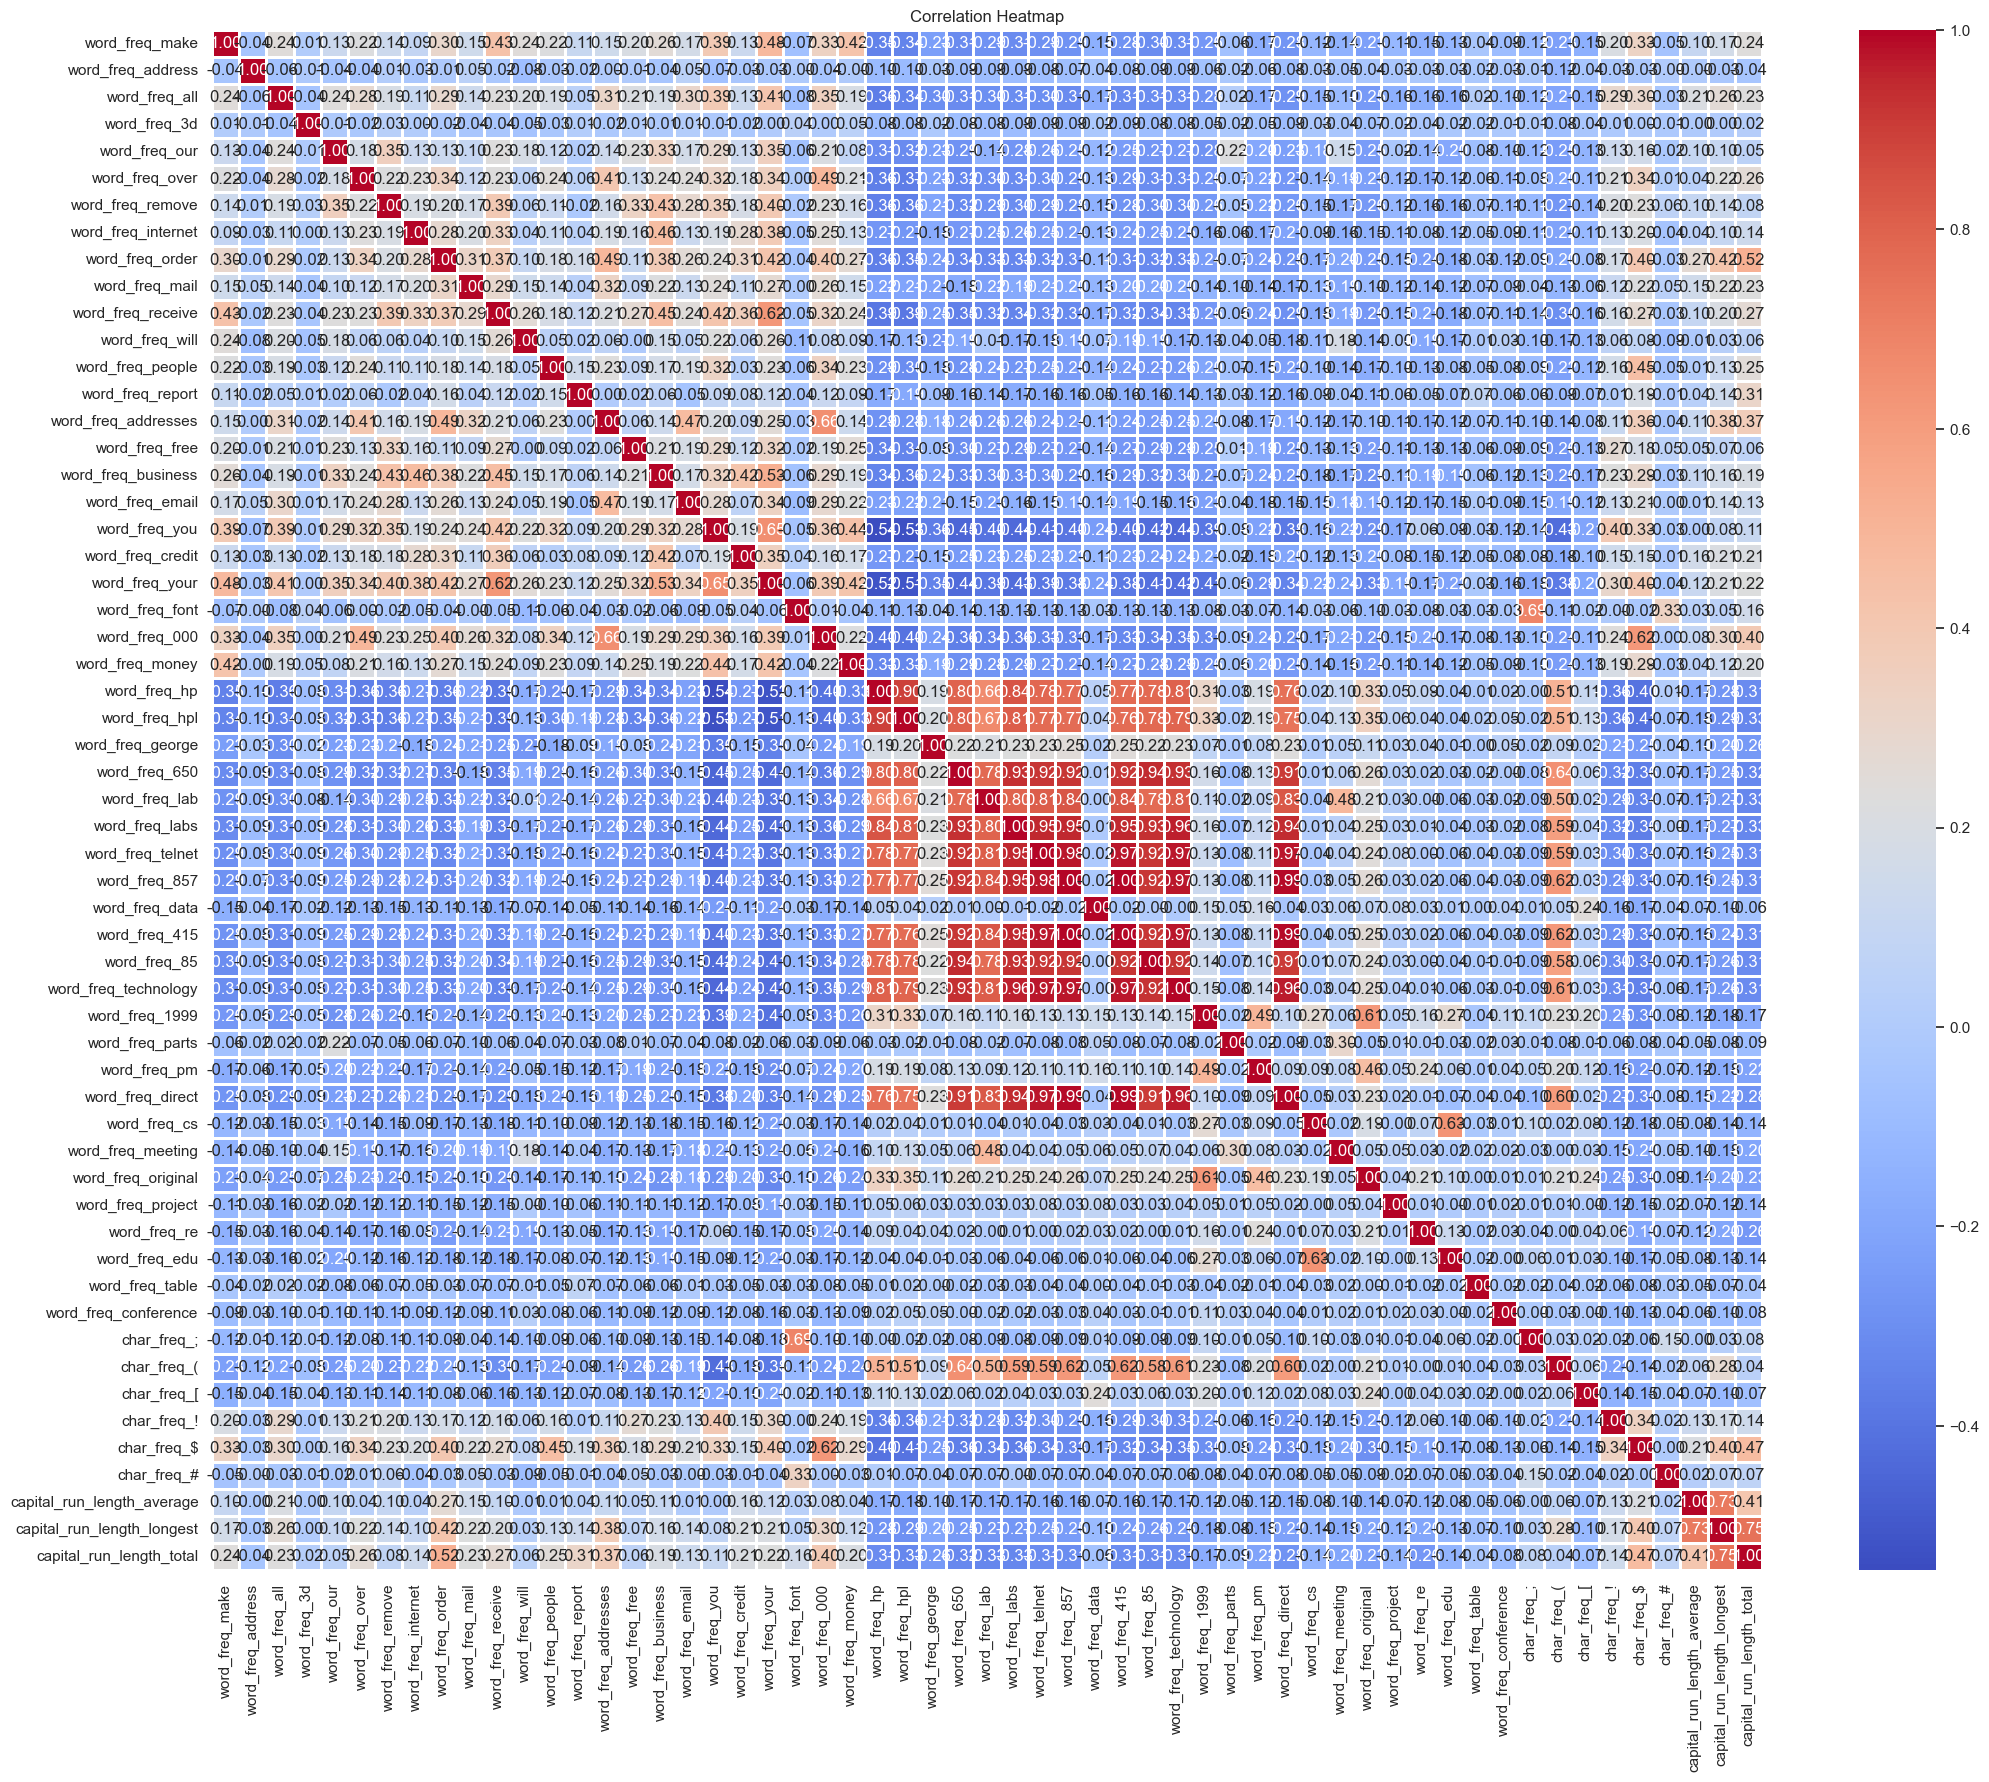

In [25]:

plt.figure(figsize=(25, 20))
sb.heatmap(corr.corr(),
			cmap = 'coolwarm',
			fmt = '.2f',
			linewidths = 2,
			annot = True)
plt.title('Correlation Heatmap')
plt.show()

The heatmap consist of words and characters extracted from emails. The rows and columns of the heatmap visually represent the correlation between different features.

The higher the intensity of the color, the more correlated the features are, with red indicating a very strong positive corelation and blue indicating a negative correlation.

A positive correlation explains how the presence of one feature in the matrix coincides with that of another.

words/characters with a strong positive correlation could be an indication they are common in spam emails while those with low correlations could mean that the words/characters are less common in spam emails

Although there are lot of features that are highly correlated. The heatmap shows that there are more words/characters with a negative correlation

# PREPROCESSING THE DATA FOR MODELING

# checking the descriptive statistics

In [26]:
data.describe().T

count        mean         std  min     25%  \
word_freq_make              4601.0    0.104553    0.305358  0.0   0.000   
word_freq_address           4601.0    0.213015    1.290575  0.0   0.000   
word_freq_all               4601.0    0.280656    0.504143  0.0   0.000   
word_freq_3d                4601.0    0.065425    1.395151  0.0   0.000   
word_freq_our               4601.0    0.312223    0.672513  0.0   0.000   
word_freq_over              4601.0    0.095901    0.273824  0.0   0.000   
word_freq_remove            4601.0    0.114208    0.391441  0.0   0.000   
word_freq_internet          4601.0    0.105295    0.401071  0.0   0.000   
word_freq_order             4601.0    0.090067    0.278616  0.0   0.000   
word_freq_mail              4601.0    0.239413    0.644755  0.0   0.000   
word_freq_receive           4601.0    0.059824    0.201545  0.0   0.000   
word_freq_will              4601.0    0.541702    0.861698  0.0   0.000   
word_freq_people            4601.0    0.093930    0.301036  0.0   0.000   
word_freq_report            4601.0    0.058626    0.335184  0.0   0.000   
word_freq_addresses         4601.0    0.049205    0.258843  0.0   0.000   
word_freq_free              4601.0    0.248848    0.825792  0.0   0.000   
word_freq_business          4601.0    0.142586    0.444055  0.0   0.000   
word_freq_email             4601.0    0.184745    0.531122  0.0   0.000   
word_freq_you               4601.0    1.662100    1.775481  0.0   0.000   
word_freq_credit            4601.0    0.085577    0.509767  0.0   0.000   
word_freq_your              4601.0    0.809761    1.200810  0.0   0.000   
word_freq_font              4601.0    0.121202    1.025756  0.0   0.000   
word_freq_000               4601.0    0.101645    0.350286  0.0   0.000   
word_freq_money             4601.0    0.094269    0.442636  0.0   0.000   
word_freq_hp                4601.0    0.549504    1.671349  0.0   0.000   
word_freq_hpl               4601.0    0.265384    0.886955  0.0   0.000   
word_freq_george            4601.0    0.767305    3.367292  0.0   0.000   
word_freq_650               4601.0    0.124845    0.538576  0.0   0.000   
word_freq_lab               4601.0    0.098915    0.593327  0.0   0.000   
word_freq_labs              4601.0    0.102852    0.456682  0.0   0.000   
word_freq_telnet            4601.0    0.064753    0.403393  0.0   0.000   
word_freq_857               4601.0    0.047048    0.328559  0.0   0.000   
word_freq_data              4601.0    0.097229    0.555907  0.0   0.000   
word_freq_415               4601.0    0.047835    0.329445  0.0   0.000   
word_freq_85                4601.0    0.105412    0.532260  0.0   0.000   
word_freq_technology        4601.0    0.097477    0.402623  0.0   0.000   
word_freq_1999              4601.0    0.136953    0.423451  0.0   0.000   
word_freq_parts             4601.0    0.013201    0.220651  0.0   0.000   
word_freq_pm                4601.0    0.078629    0.434672  0.0   0.000   
word_freq_direct            4601.0    0.064834    0.349916  0.0   0.000   
word_freq_cs                4601.0    0.043667    0.361205  0.0   0.000   
word_freq_meeting           4601.0    0.132339    0.766819  0.0   0.000   
word_freq_original          4601.0    0.046099    0.223812  0.0   0.000   
word_freq_project           4601.0    0.079196    0.621976  0.0   0.000   
word_freq_re                4601.0    0.301224    1.011687  0.0   0.000   
word_freq_edu               4601.0    0.179824    0.911119  0.0   0.000   
word_freq_table             4601.0    0.005425    0.076264  0.0   0.000   
word_freq_conference        4601.0    0.031869    0.285735  0.0   0.000   
char_freq_;                 4601.0    0.038575    0.243471  0.0   0.000   
char_freq_(                 4601.0    0.139030    0.270355  0.0   0.000   
char_freq_[                 4601.0    0.016976    0.109394  0.0   0.000   
char_freq_!                 4601.0    0.269071    0.815672  0.0   0.000   
char_freq_$                 4601.0    0.075811    0.24

There's a significant difference in the scale of each feature as well as the entire dataset. This difference in scale could prevent the models from accurately capturing the underlying relationship between variables.

The models might give more importance to datapoints and features with larger scales and less importance to datapoints/features with lower scales

The features will be deskewed and the dataset normalized before modeling

# checking for skewness

In [27]:
for col in data.drop(columns=['is_spam']).columns:
    skw = data[col].skew()
    print(col, skw)
    print(' ')

word_freq_make 5.675639163765851
 
word_freq_address 10.086810872543571
 
word_freq_all 3.0092485272970904
 
word_freq_3d 26.227744470347666
 
word_freq_our 4.747126114133084
 
word_freq_over 5.956952736312442
 
word_freq_remove 6.7655804692611206
 
word_freq_internet 9.724847529977309
 
word_freq_order 5.226066951054146
 
word_freq_mail 8.487809520414334
 
word_freq_receive 5.510250153233095
 
word_freq_will 2.8673535839033857
 
word_freq_people 6.955548226899194
 
word_freq_report 11.75464547524248
 
word_freq_addresses 6.971040823271989
 
word_freq_free 10.763594029506557
 
word_freq_business 5.688642098501172
 
word_freq_email 5.4137537226351125
 
word_freq_you 1.5916742687064176
 
word_freq_credit 14.602586644736904
 
word_freq_your 2.435527175852193
 
word_freq_font 9.97544072677198
 
word_freq_000 5.713775497993735
 
word_freq_money 14.687028058263406
 
word_freq_hp 5.716843442866135
 
word_freq_hpl 6.3500116031273555
 
word_freq_george 5.744493293820434
 
word_freq_650 6.606533

The skew values indicates that all the features have a right skew, with many features with a very high skew. This will lead to bias in the prediction where datapoints with a high value are given more weight than those with lower values

A log transformation technique will be performed on the predictors to ensure that the scale of the predictors are of a close range.

The log transformation will be fitted on the train set and both the train and test sets will be transformed

# using the log transformation to change the scale of each feature to a close range

In [28]:
for col in data.drop(columns=['is_spam']).columns:
    if skw > 1 or skw< -1:
        data[col] = np.log1p(data[col])

# checking for skewness

In [29]:
for col in data.drop(columns=['is_spam']).columns:
    skw = data[col].skew()
    print(col, skw)
    print(' ')

word_freq_make 3.314348624310222
 
word_freq_address 5.957141207021171
 
word_freq_all 1.6624523256081618
 
word_freq_3d 18.73675206118731
 
word_freq_our 2.0100728426274084
 
word_freq_over 3.1723444775126324
 
word_freq_remove 3.6174699416780824
 
word_freq_internet 4.143316670575172
 
word_freq_order 3.2845087986807466
 
word_freq_mail 2.4900248985052404
 
word_freq_receive 4.017382699337586
 
word_freq_will 1.2296524801993423
 
word_freq_people 3.5621545654391467
 
word_freq_report 5.914661675191026
 
word_freq_addresses 5.673363435394099
 
word_freq_free 3.0237831730839826
 
word_freq_business 3.318394056939769
 
word_freq_email 2.828176463745615
 
word_freq_you 0.15525339862870782
 
word_freq_credit 5.888439105721656
 
word_freq_your 0.9124196333766097
 
word_freq_font 8.074288139377085
 
word_freq_000 3.6328195142861337
 
word_freq_money 5.01485816055908
 
word_freq_hp 2.4305378574278906
 
word_freq_hpl 3.0364969126168098
 
word_freq_george 3.6442730929454474
 
word_freq_650 4.2

# splitting the data set into train and test sets before fitting a transformation technique to prevent leakage using the train test split model

The sci-kit-learn library has a package named model_selection that consists of various model that can be used to transform data and make predictions. The train test split model used to split data into train and test sets is one of such models

The data will be split into target (the feature that indicates whether an email is spam or not, and predictors - the words and characters that determine whether an email is spam or not

After splitting the data into target and predictors, the train test split model will then be used to split both the target and predictors into train and test sets. There will be train and test sets for the target variable as well as train and test sets for the predictors

A test size parameter of 0.3 will be used to split data. This indicates that the dataset will be split by 70:30, 70% will be for training and 30% will be for testing

A random state/seed parameter of 7 will be used, this will ensure that the same random numbers are generated each time the data is split to ensure reproducibility and model accuracy

In [30]:
from sklearn.model_selection import train_test_split

X= data.drop(columns= ['is_spam'])
y= data['is_spam']

t_size = 0.3
seed= 7

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= t_size, random_state= seed)


The row index of all splits will contain the various index positions of the observations from the original data frame. The index will be reset to ensure that all observations have their own index positions in the splitted data

# resetting the index of the splitted data to match the lenght of each splitted data frame

In [31]:
data_split= X_train, X_test, y_train, y_test

for indx in data_split:
    indx.reset_index(drop= True, inplace= True)


Going forward, all transformation techniques will be fitted only on the train set of the predictors - the target will not be transformed - to avoid leakage/overfitting

As observed from the summary statistics, the features of the dataset are having a significant difference in scale which can cause bias, where the model gives more weight to some features against others

Just like the log transformation performed, which reduces the scale for each feature, the normalizer algorithm will be fitted on the training set of the predictors and transformed on both the train and test sets in order to ensure that the entire features are having the same scale of a close range

The scikit learn library has a module named preprocessing that contains various models and algorithms that can be used to preprocess and transform data one of which is the normalizer that changes the scale of the entire features

# Changing the scale of the features to ensure all features are having values with a close range

In [32]:
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputer = imputer.fit_transform(X_train)
X_test_imputer = imputer.transform(X_test)

scaler = Normalizer()
scaler.fit(X_train_imputer)

X_train_norm = scaler.transform(X_train_imputer).round(2)
X_test_norm = scaler.transform(X_test_imputer).round(2)

# Principal Component Analysis

the high dimension of features in the dataset will negatively affect the classification of emails as spam or not spam. The fewer the features (words/characters) used to train the model, the accurate the classification is

In order to reduce the dimensionality of the features while retaining the information contained in the dataset, the Principal Component Analysis (PCA) will be used

The sklearn library has a module named decomposition with numerous algorithms for transforming data, one of which is the principal compponent analysis.

The principal component analysis creates new features as principal components. These components are a linear combination of the original features. Each components consists of coefficients that indicates the linear combination of the original feature. The higher the coefficients or loadings, the higher the importance of the corresponding feature in that component. 

A positive coefficient indicates that the feature has a positive impact on the component while a negative coefficient indicates a negative impact

The PCA will be performed on the normalized data. The goal is to to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features 

In [33]:
from sklearn.decomposition import PCA

X = X_train_norm
y = y_train.values

numFolds = 52

pca = PCA(n_components = numFolds)
pca.fit(X, y)



PCA(n_components=52)

In [34]:
pca.components_

array([[-0.02078355, -0.0019928 , -0.04827822, ..., -0.02538654,
        -0.35923856, -0.31721951],
       [ 0.02599705, -0.00437305,  0.06792961, ..., -0.0589433 ,
        -0.24349568, -0.18374861],
       [-0.0147009 , -0.08913379,  0.01132916, ..., -0.22178807,
        -0.42260172,  0.16609471],
       ...,
       [-0.00483137,  0.01511087,  0.01759186, ...,  0.01614116,
        -0.00180107,  0.01983659],
       [ 0.02523334, -0.00560077,  0.00167201, ..., -0.0202568 ,
        -0.0170639 , -0.01119233],
       [ 0.01914082,  0.01864138, -0.01638964, ...,  0.02554872,
         0.01042821,  0.03266933]])

In [35]:
pca.explained_variance_ratio_

array([0.18636982, 0.12948724, 0.07902475, 0.0615997 , 0.05279312,
       0.03979408, 0.03732797, 0.03250356, 0.02832015, 0.02792535,
       0.02211122, 0.02137902, 0.01959316, 0.01843784, 0.01691761,
       0.01631263, 0.01415104, 0.01320481, 0.01281593, 0.01148785,
       0.01091357, 0.00979071, 0.00885435, 0.00733658, 0.00722987,
       0.00707556, 0.00680418, 0.00650461, 0.00616424, 0.00600848,
       0.0058419 , 0.00563468, 0.00526293, 0.00507245, 0.00499682,
       0.00455754, 0.0043547 , 0.00426862, 0.00415845, 0.00372336,
       0.00353903, 0.00334309, 0.00315593, 0.00297976, 0.00248347,
       0.00220137, 0.00215724, 0.00205443, 0.00202225, 0.00200365,
       0.00182204, 0.00177751])

We can observe that the linear combination of the original features of the data in the first two components explains most of the variance in the data with component first component explaining 18% of the variance and the second component explaining 12% percent of the variance which is a total of 30%


# checking the sum of the variance explained by using 52 n_components of the PCA

In [36]:
pca.explained_variance_ratio_.sum()

0.9956501982224387

Using 52 principal components explains 96% of the variance in the data with new features that helps in reducing dimensionality while retaining the information contained in the original dataset

The choice of 52 components is because it is the number of components that capture the variability of the data at 99.5% variance

# checking the cummulative variance ratio using 52 components

In [37]:
cum_var= pca.explained_variance_ratio_.cumsum()
cum_var

array([0.18636982, 0.31585706, 0.39488181, 0.45648151, 0.50927463,
       0.54906871, 0.58639668, 0.61890023, 0.64722039, 0.67514573,
       0.69725695, 0.71863597, 0.73822912, 0.75666696, 0.77358457,
       0.78989721, 0.80404825, 0.81725306, 0.83006899, 0.84155684,
       0.85247041, 0.86226112, 0.87111547, 0.87845205, 0.88568192,
       0.89275748, 0.89956166, 0.90606627, 0.91223051, 0.91823898,
       0.92408088, 0.92971555, 0.93497849, 0.94005093, 0.94504776,
       0.94960529, 0.95396   , 0.95822862, 0.96238708, 0.96611043,
       0.96964946, 0.97299254, 0.97614847, 0.97912823, 0.9816117 ,
       0.98381308, 0.98597032, 0.98802475, 0.990047  , 0.99205065,
       0.99387269, 0.9956502 ])

# checking the index position at which the components retain 99.5% variance of the data

In [38]:
comp_num = np.argmax(cum_var >= 0.995) + 1
comp_num

52

In order to establish the minimum number of features needed for retaining 99.5% variance in the data, 52 n_components were used. The threshold of 99.5% was achieved at the 52nd component. These components will be used to classify emails as spam or not in order to reduce dimensions and ensure an accurate classification. The first and second components explains the largest portion of the variability in the data with a total of 32% variation explained with the other 50 components explaining 63% of the variability in the data to retain a 99.5% variance.

# creating a new PCA with the components that explain 99.5% variance of the data

In [39]:
new_pca = PCA(n_components=comp_num)
new_pca.fit(X_train_norm)


PCA(n_components=52)

# transforming the train and test sets to use the components that explain 99.5% variance of the data

In [40]:
X_train_pca= new_pca.transform(X)
X_test_pca= new_pca.transform(X_test_norm)

# THE CURSE OF DIMENSIONALITY

In order to make accurate classification of whether an email is spam or not, a model has to be trained in order to analyze and learn from the information contained in the dataset. The process of training a model is done iteratively. The model captures the relationship between features, it checks the relationship between the predictors as well as the relationship between one and more predictors and target variable.

The model analyzes all features and their respective observations and how they influence the classification of email as spam or not spam. This process requires a lot of learning, analyzing and iteration.

In that regard, the magnitude of the data has a great effect on the magnitude of training, learning, analysis and iteration that the model performs.

A model can train quickly, and more efficiently with a data that has a few dimensions or features, given that the data is credible. It can accurately capture the patterns and relationships between predictors as well as between the predictors and the target.

However, an addition of a single dimension will require more effort for the model to capture these relationships and make an accurate classification. As the dimension (number of features) increases, so does the effort required to accurately train a model. This makes it difficult for the model to identify patterns, makes the training computationally expensive, leads to overfitting - where the models becomes overly intricate and closely matches the training data, catching noise and erratic variations instead of the core pattern.

This phenomenom is described as the curse of dimensionality. It negatively impacts the accuracy of a model in making the right classification. It can be avoided using techniques like feature selection, clustering, or as in the case of email classification, PCA

The spambase dataset contains 58 features - 57 predictors and 1 target - The predictors are numerous words and characters that are found in emails and the target is a classification of emails as spam or not.

The features are numerous, with most features having an independent non linear relationship which will make it difficult for the model to understand the underlying patterns in the dataset that will enable an accurate classification. This dataset has a high dimension and requires a preprocessing technique (PCA) to reduce the dimension. If a model is trained without reducing the dimension, it is inevitable to experience the phenomenom of the curse of dimensionality

# checking the loadings (correlation coefficient) of the components

In [41]:
list(new_pca.components_.round(2))

[array([-0.02, -0.  , -0.05, -0.  , -0.05, -0.02, -0.03, -0.02, -0.02,
        -0.03, -0.02, -0.07, -0.02, -0.  , -0.01, -0.04, -0.03, -0.03,
        -0.14, -0.02, -0.13, -0.01, -0.02, -0.02,  0.07,  0.05,  0.83,
         0.04,  0.04,  0.04,  0.03,  0.03,  0.  ,  0.03,  0.03,  0.03,
         0.01,  0.  ,  0.01,  0.02,  0.  ,  0.03,  0.01,  0.01,  0.06,
        -0.  , -0.  ,  0.01, -0.  ,  0.01,  0.  , -0.05, -0.02, -0.  ,
        -0.03, -0.36, -0.32]),
 array([ 0.03, -0.  ,  0.07, -0.  ,  0.05,  0.02,  0.02,  0.01, -0.  ,
         0.04,  0.02,  0.04,  0.02,  0.  ,  0.  ,  0.05,  0.01,  0.03,
         0.82,  0.01,  0.3 , -0.01,  0.01,  0.02, -0.22, -0.14,  0.07,
        -0.07, -0.03, -0.05, -0.04, -0.02, -0.04, -0.02, -0.06, -0.06,
        -0.05, -0.  , -0.01, -0.02, -0.01, -0.02, -0.01, -0.01,  0.15,
         0.04, -0.  , -0.01, -0.01, -0.03, -0.01,  0.06,  0.01, -0.01,
        -0.06, -0.24, -0.18]),
 array([-0.01, -0.09,  0.01, -0.01, -0.04, -0.02, -0.06, -0.03, -0.03,
        -0.01, 

These arrays shows the loading (correlation coefficient) of each component. Each value in each component represent the correlation between the original feature and the principal component.

These arrays shows that most features have a lower correlation coefficient with the original features and a few with higher correlation. This is in uniform with the findings during the correlation matrix analysis of the dataset where it was discovered that more features have low correlation than those with high correlation

This can be confirmed by the result we have obtained by analyzing the components of the PCA with the loadings

# Displaying the scores obtained by features in each Component of PCA

In [42]:
X_train_pca

array([[-4.34279239e-02, -1.43589833e-01,  4.64704500e-02, ...,
        -4.43276167e-04, -9.56961328e-03, -1.02150369e-02],
       [ 1.77772800e-01,  1.01401696e-01,  1.87181095e-01, ...,
         6.91207396e-03, -1.65127044e-02, -1.73900436e-02],
       [ 3.52678086e-03,  5.31332402e-01,  1.45557862e-01, ...,
        -3.56237780e-03,  4.41339392e-03, -2.51723451e-03],
       ...,
       [-6.29920811e-02, -1.43262102e-01, -2.85621009e-02, ...,
        -4.64245352e-03, -2.56785043e-02, -1.62289268e-02],
       [-8.91287123e-02, -7.89388892e-03, -1.10657139e-01, ...,
        -4.43608712e-03,  8.88162275e-03,  2.26580329e-03],
       [-7.78824156e-02,  2.91479892e-01, -1.77534475e-02, ...,
        -4.37190795e-04, -5.24558332e-03, -5.97925224e-03]])

# Creating a Data Frame with the components as features and their scores as observations

In [43]:
X_train_pca_df= pd.DataFrame(X_train_pca)
X_train_pca_df.head()

0         1         2         3         4         5         6   \
0 -0.043428 -0.143590  0.046470  0.068592 -0.021965 -0.054428  0.018998   
1  0.177773  0.101402  0.187181 -0.149536 -0.060536 -0.061459  0.155688   
2  0.003527  0.531332  0.145558 -0.042007  0.083739 -0.153485 -0.199867   
3 -0.102101  0.003282 -0.106835 -0.073114 -0.025876  0.013112  0.012552   
4 -0.053792  0.101299  0.014969  0.060405  0.031819  0.017334  0.197870   

         7         8         9         10        11        12        13  \
0 -0.001623 -0.019787 -0.029764  0.001638  0.023315 -0.003485 -0.037272   
1 -0.058059 -0.016699 -0.026829  0.006211 -0.037446  0.168690  0.042760   
2  0.144690 -0.018638  0.048193 -0.048744  0.100361 -0.056242  0.003469   
3 -0.067404 -0.014274  0.013002  0.018620 -0.061759  0.001794  0.016238   
4 -0.064663 -0.003622 -0.039820 -0.029598  0.093663 -0.025006  0.012711   

         14        15        16        17        18        19        20  \
0  0.006827  0.017934  0.003595  0.012489 -0.003060  0.008727  0.011167   
1 -0.006944 -0.053905 -0.029969  0.014016 -0.012091  0.090481 -0.032892   
2 -0.037082 -0.032744 -0.033162 -0.023723 -0.006591  0.017258  0.004637   
3 -0.025511  0.089028 -0.040430  0.001115  0.000746 -0.010702  0.007791   
4 -0.031603 -0.013288  0.002169 -0.027928 -0.012152  0.016310 -0.014449   

         21        22        23        24        25        26        27  \
0  0.016361  0.027298  0.006114  0.010804  0.014225  0.003299 -0.022646   
1 -0.033284 -0.035983 -0.007731  0.020744  0.014214  0.009113  0.055988   
2 -0.045794  0.028487 -0.004844 -0.021042  0.002683 -0.005721 -0.009970   
3  0.029265 -0.023104  0.030097  0.018556  0.016248 -0.021022  0.020962   
4  0.033388 -0.015504 -0.014655  0.000787  0.004713 -0.015818  0.008784   

         28        29        30        31        32        33        34  \
0  0.019771 -0.010788  0.002939 -0.018714  0.011761 -0.003926 -0.007136   
1 -0.049275 -0.075999  0.078376  0.025951 -0.008520  0.003725  0.034785   
2  0.015043 -0.015003 -0.001752 -0.032752  0.002175 -0.014156 -0.023068   
3  0.017625 -0.000125 -0.003418 -0.007083  0.015480  0.007040  0.008720   
4 -0.002819 -0.007905 -0.001150 -0.011790 -0.006010 -0.018456 -0.002471   

         35        36        37        38        39        40        41  \
0 -0.008441  0.016593 -0.001258  0.002903  0.005630  0.056885  0.026667   
1  0.011065 -0.010306 -0.008054  0.007717 -0.019751  0.022251 -0.047586   
2 -0.000675  0.022076  0.002435  0.008666 -0.015090  0.006127  0.002966   
3 -0.015073  0.016075 -0.024758 -0.003457  0.006649  0.072536  0.034205   
4  0.005929  0.006288 -0.000325 -0.000779 -0.002240 -0.002428 -0.005168   

         42        43        44        45        46        47        48  \
0 -0.003427 -0.011886 -0.008181 -0.005169 -0.001313  0.005161 -0.000465   
1 -0.000747  0.054631  0.003678 -0.002529 -0.019165  0.005605  0.018061   
2 -0.011801  0.002478 -0.002246 -0.003454 -0.005338  0.007341  0.002369   
3  0.000698 -0.004303 -0.010560  0.026343 -0.012174  0.001705  0.006109   
4 -0.006733  0.000684 -0.003228  0.010798  0.033675 -0.008303 -0.007129   

         49        50        51  
0 -0.000443 -0.009570 -0.010215  
1  0.006912 -0.016513 -0.017390  
2 -0.003562  0.004413 -0.002517  
3  0.007512 -0.003070 -0.008061  
4  0.001799  0.000941  0.002512

In [44]:
X_test_pca_df= pd.DataFrame(X_test_pca)
X_test_pca_df.head()

0         1         2         3         4         5         6   \
0 -0.105085 -0.012914 -0.075889  0.000609 -0.040213 -0.043497  0.011606   
1 -0.040304 -0.145633  0.042086  0.079071 -0.021187 -0.044046  0.023161   
2 -0.020031 -0.146354 -0.061408  0.077606  0.075961 -0.014156 -0.006072   
3 -0.062989  0.133758  0.091205  0.132428 -0.058066  0.040796 -0.118013   
4 -0.076110  0.325046  0.077056  0.042427 -0.059604 -0.001031  0.065091   

         7         8         9         10        11        12        13  \
0 -0.029170 -0.006486 -0.003928  0.004266 -0.017285  0.052133 -0.026102   
1  0.000850 -0.016764 -0.021011  0.001424  0.018085 -0.003077 -0.038235   
2  0.041761  0.026734  0.031755 -0.086842  0.072430 -0.074833  0.048951   
3  0.026469 -0.052632  0.071359  0.086729 -0.045221 -0.065658  0.051525   
4 -0.007922 -0.005825  0.005399 -0.087965 -0.048280  0.062322 -0.029816   

         14        15        16        17        18        19        20  \
0  0.004907  0.014706  0.000685  0.007865 -0.030049 -0.033328  0.005729   
1  0.011214  0.008944  0.002201  0.011796 -0.005554  0.011788  0.011181   
2 -0.024767 -0.064557 -0.028619 -0.074736 -0.010329  0.048941 -0.039243   
3  0.054084 -0.067034 -0.006668  0.014444 -0.028812 -0.007454 -0.019364   
4 -0.013291  0.023059 -0.080659 -0.016386 -0.031335  0.019300  0.000353   

         21        22        23        24        25        26        27  \
0  0.027386 -0.011202  0.010800 -0.016011  0.004743  0.016789 -0.021338   
1  0.017023  0.030463  0.008893  0.004026  0.014844  0.002122 -0.022599   
2 -0.002981 -0.000471 -0.006433  0.027122 -0.029416 -0.016385  0.001291   
3  0.022129 -0.028526 -0.022923 -0.001321  0.004019 -0.010469 -0.012295   
4  0.025967 -0.026576 -0.013996 -0.005617  0.015270 -0.017372 -0.010768   

         28        29        30        31        32        33        34  \
0  0.008943 -0.017927  0.002319 -0.027336  0.010460  0.015392 -0.014812   
1  0.026724 -0.010667  0.002541 -0.017070  0.007047 -0.002528 -0.008374   
2 -0.023602 -0.019711 -0.007450 -0.003437 -0.016300 -0.033123  0.025407   
3 -0.003731 -0.008615 -0.003902 -0.009836 -0.013787 -0.006958  0.006796   
4  0.002568 -0.008047 -0.002972  0.013823  0.005552 -0.005396 -0.009357   

         35        36        37        38        39        40        41  \
0 -0.010349  0.001630  0.004144  0.013680  0.002736  0.028444  0.006035   
1 -0.003330  0.012622 -0.000316  0.002811  0.008579  0.047385  0.021396   
2  0.010805 -0.005660  0.005725 -0.008671  0.000468  0.000624 -0.002449   
3  0.004228  0.004740  0.005835  0.003047 -0.007581  0.001362 -0.007885   
4  0.001314  0.011875 -0.005100  0.002980 -0.005209 -0.000860 -0.003761   

         42        43        44        45        46        47        48  \
0 -0.006080  0.007416  0.007328 -0.006774  0.002713  0.013724  0.011158   
1 -0.004134 -0.011141 -0.002190  0.000074  0.006947  0.001382  0.000221   
2 -0.002909  0.002958 -0.005810 -0.000749 -0.008378  0.001065 -0.005107   
3 -0.001733 -0.004516 -0.007477 -0.005357  0.002600  0.004378  0.001680   
4 -0.001224 -0.005961 -0.001139 -0.009016  0.005770  0.005874  0.012022   

         49        50        51  
0  0.003274 -0.005671  0.001934  
1  0.000422 -0.009069 -0.008723  
2 -0.003396 -0.002704 -0.000304  
3  0.002625 -0.002208 -0.002558  
4  0.006232  0.006486 -0.004752

# FEATURE SELECTION AND MODEL TRAINING

# Training a model on all the 52 components to check their accuracy in predicting spam emails using the KFold

Due to the complex nature of the dataset, having features that have a linear as well as those with a non - linear relationship, Three models will be used to train the model:

1. The logistic Regression that predicts the whether an email is spam or not by checking the relationship of each feature (word/character) and the target variable. The logistic regression calculates the probability of whether an email is spam or not after checking the linear relationship between the independent features and the target. If the probability exceeds the threshold of 0.5, the email is classified as spam, otherwise, it is classified as not spam.
   
2. Decision Tree Classifier - The decision tree classifier is a model that classifies an email as spam or not by various tree nodes and deciding which combination of features and datapoints are most likely to accurately predict features as spam or not spam. It begins with a single decision node and breaks it down until it reaches the best result.

3. The Random Forest Classifier - The random forest classifier takes many decision trees to create a forest. Each tree is a combination features and datapoints selected at random. Each tree is assessed seperately and the results are aggregated to produce an optimal result. This ensures that complex relationships between features and datapoints are captured, prevent overfitting, and patterns are recognized

The models will be evaluated using the Repeated stratified KFold cross valiadation models which equally and randomly splits the observations into a number specified folds and checks the relationship between each fold and the others. It uses one fold as target and others as predictors and those so for all folds. Each fold maintains the same class distribution as the original dataset and the process is repeated for a specified number of times to ensure it gives the optimal result.

The model will be split into 1o folds with a random state of 7 to ensure that the same values are generated whenever we train the model. A max iteration of 100 will be set for the Logistic regression to regulate the number of iteration it performs.

The cross validation score will be used to evaluate the model with the Kfold. An accuracy scoring metric will be used to determine the ratio of correct prediction to total predictions. A higher  accuracy indicates that the models are performing optimally in predicting emails as spam or not spam 

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = X_train_pca
y = y_train.values

model1 = LogisticRegression(max_iter= 100)
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()

kfold = RepeatedStratifiedKFold(n_splits = 10,
                                n_repeats= 3,
                                random_state= 7)

models= [model1,
         model2,
         model3]
scores= []
for model in models:
    score = cross_val_score(model, X, y, scoring= 'accuracy', cv= kfold)
    scores.append(score.mean()*100)
    
print('Logistic regression score:',score[0])
print('decision tree score:',score[1])
print('random forest score:',score[2])

Logistic regression score: 0.937888198757764
decision tree score: 0.9440993788819876
random forest score: 0.953416149068323


The models have performed optimally on the train set, with the logistic regression, decision tree and random forest models having accurate predictions of 92%, 89% and 94% respectively. The random forest has the best performance. As expected, the random forest model has been able to capture the complex relationship between the predictors and the target.

The model will also be tested on lesser components to see if a similar accuracy will be realized in order to avoid over complexity. Training a model with numerous components could lead to over complexity where the model performs sub optimally on unseen data. The models will be selected using the Recurrent feature Elimination is an algorithm that uses a model to train all the components and checks the importance score (coefficient magnitudes) of each feature. RFE automatically removes the less important components and retains the number of components that have been specified. The model used to train the components is the Random Forest due to the complex relationship of the dataset

# Selecting twenty five (25) components using the RFE

In [46]:
from sklearn.feature_selection import RFE
X =  X_train_pca
y = y_train.values

model = RandomForestClassifier()

rfe = RFE(estimator= model, n_features_to_select= 25)

fit = rfe.fit(X,y)

sel_feat = rfe.support_

feat_list = []

for feat, rank in zip(list(X_train_pca_df.columns), list(sel_feat)):
    if rank == True:
        feat_list.append(feat)
selected_feat = X_train_pca_df[feat_list]

# Displaying the selected components

In [47]:
selected_feat

0         1         2         3         4         5         6   \
0    -0.043428 -0.143590  0.046470  0.068592 -0.021965 -0.054428  0.018998   
1     0.177773  0.101402  0.187181 -0.149536 -0.060536 -0.061459  0.155688   
2     0.003527  0.531332  0.145558 -0.042007  0.083739 -0.153485 -0.199867   
3    -0.102101  0.003282 -0.106835 -0.073114 -0.025876  0.013112  0.012552   
4    -0.053792  0.101299  0.014969  0.060405  0.031819  0.017334  0.197870   
...        ...       ...       ...       ...       ...       ...       ...   
3215 -0.005472  0.040987  0.147923  0.288089 -0.037654  0.060763 -0.032769   
3216 -0.058534 -0.167366 -0.078214  0.044777  0.042012 -0.053838 -0.006741   
3217 -0.062992 -0.143262 -0.028562  0.122176 -0.016700  0.003097 -0.005594   
3218 -0.089129 -0.007894 -0.110657 -0.074077 -0.050363  0.005602  0.002134   
3219 -0.077882  0.291480 -0.017753 -0.149635  0.084710 -0.010573  0.021391   

            7         8         9         11        13        20        21  \
0    -0.001623 -0.019787 -0.029764  0.023315 -0.037272  0.011167  0.016361   
1    -0.058059 -0.016699 -0.026829 -0.037446  0.042760 -0.032892 -0.033284   
2     0.144690 -0.018638  0.048193  0.100361  0.003469  0.004637 -0.045794   
3    -0.067404 -0.014274  0.013002 -0.061759  0.016238  0.007791  0.029265   
4    -0.064663 -0.003622 -0.039820  0.093663  0.012711 -0.014449  0.033388   
...        ...       ...       ...       ...       ...       ...       ...   
3215  0.056174 -0.010243  0.023111 -0.054605  0.033372 -0.026100 -0.023746   
3216 -0.003059 -0.008291 -0.007750  0.035138  0.009521 -0.006370  0.010795   
3217 -0.011267 -0.026828 -0.000397 -0.024164  0.014284 -0.007038 -0.024524   
3218 -0.049085  0.010943 -0.002095  0.019322 -0.020472  0.015533 -0.069328   
3219  0.042212 -0.118726 -0.076527  0.011061 -0.004299  0.020607  0.031046   

            22        23        33        34        36        42        43  \
0     0.027298  0.006114 -0.003926 -0.007136  0.016593 -0.003427 -0.011886   
1    -0.035983 -0.007731  0.003725  0.034785 -0.010306 -0.000747  0.054631   
2     0.028487 -0.004844 -0.014156 -0.023068  0.022076 -0.011801  0.002478   
3    -0.023104  0.030097  0.007040  0.008720  0.016075  0.000698 -0.004303   
4    -0.015504 -0.014655 -0.018456 -0.002471  0.006288 -0.006733  0.000684   
...        ...       ...       ...       ...       ...       ...       ...   
3215 -0.006850  0.070104 -0.002477  0.013343 -0.003197 -0.001945  0.003242   
3216 -0.002797  0.003801  0.012458 -0.037173  0.008684 -0.002185 -0.002442   
3217  0.028834 -0.000697  0.015961 -0.024487  0.050161 -0.007450 -0.003204   
3218  0.061938 -0.068853 -0.075231  0.102154  0.022642  0.001427  0.001223   
3219 -0.026089 -0.027764 -0.004176 -0.024462  0.001775  0.000579 -0.008601   

            45        48        49        50  
0    -0.005169 -0.000465 -0.000443 -0.009570  
1    -0.002529  0.018061  0.006912 -0.016513  
2    -0.003454  0.002369 -0.003562  0.004413  
3     0.026343  0.006109  0.007512 -0.003070  
4     0.010798 -0.007129  0.001799  0.000941  
...        ...       ...       ...       ...  
3215  0.000445 -0.016190 -0.000828 -0.005312  
3216  0.001815 -0.001945 -0.006922 -0.001974  
3217 -0.002837 -0.003460 -0.004642 -0.025679  
3218  0.030202 -0.007219 -0.004436  0.008882  
3219 -0.005215  0.002829 -0.000437 -0.005246  

[3220 rows x 25 columns]

Twenty five (25) different components have been selected by the RFE based on their importance (coefficient magnitude or contribution) to the target variable. These components will be used to train the models to check their accuracy

# Training the selected 25 components and evaluating with KFold

In [48]:
X1 = selected_feat.values
y = y_train.values

seed = 7
fold = 10

model1 = LogisticRegression(max_iter= 100)
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
kfold = RepeatedStratifiedKFold(n_splits = 10,
                                n_repeats= 3,
                                random_state= 7)

models= [model1,
         model2,
         model3]
scores= []
for model in models:
    score = cross_val_score(model, X1, y, scoring= 'accuracy', cv= kfold)
    scores.append(score.mean()*100)
    
print('Logistic regression score:',score[0])
print('decision tree score:',score[1])
print('random forest score:',score[2])

Logistic regression score: 0.9440993788819876
decision tree score: 0.9440993788819876
random forest score: 0.9503105590062112


Here again, the performance of the models trained using 25 components have yielded an optimal result, with little difference with the models trained using 50 components. An accuracy score of 90%, 89% and 94% were got from the logistic regression, decision tree and random forest respectively. This indicates a good performance on the train set. Reducing the number of components and achieving helps in reducing over complexity in accurately predicting spam emails.

In order improve model performance and ensure we achieve the overall best result, the model will be trained on 5 components to check if further reducing the components will yield to better outcome

# Selecting 5 components with the highest importance determined by the RFE using the Random Forest model

In [49]:
from sklearn.feature_selection import RFE
X =  X_train_pca
y = y_train.values

model = RandomForestClassifier()

rfe1 = RFE(estimator= model, n_features_to_select= 5)

fit = rfe1.fit(X,y)

sel_feat1 = rfe1.support_

feat_list1 = []

for feat, rank in zip(list(X_train_pca_df.columns), list(sel_feat1)):
    if rank == True:
        feat_list1.append(feat)
selected_feat1 = X_train_pca_df[feat_list1]

# Displaying the selected components

In [50]:
selected_feat1

0         1         2         4         9
0    -0.043428 -0.143590  0.046470 -0.021965 -0.029764
1     0.177773  0.101402  0.187181 -0.060536 -0.026829
2     0.003527  0.531332  0.145558  0.083739  0.048193
3    -0.102101  0.003282 -0.106835 -0.025876  0.013002
4    -0.053792  0.101299  0.014969  0.031819 -0.039820
...        ...       ...       ...       ...       ...
3215 -0.005472  0.040987  0.147923 -0.037654  0.023111
3216 -0.058534 -0.167366 -0.078214  0.042012 -0.007750
3217 -0.062992 -0.143262 -0.028562 -0.016700 -0.000397
3218 -0.089129 -0.007894 -0.110657 -0.050363 -0.002095
3219 -0.077882  0.291480 -0.017753  0.084710 -0.076527

[3220 rows x 5 columns]

The five components that have been selected by RFE are component 0, 1, 2, 4 and 9. This shows that these components have the highest scores when classifying an email as spam or not

# Training the models using 5 components with the KFold evaluator 

In [51]:
X2 = selected_feat1.values
y = y_train.values

model1 = LogisticRegression(max_iter= 100)
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()

kfold = RepeatedStratifiedKFold(n_splits = 10,
                                n_repeats= 3,
                                random_state= 7)

models= [model1,
         model2,
         model3]
scores= []
for model in models:
    score = cross_val_score(model, X2, y, scoring= 'accuracy', cv= kfold)
    scores.append(score.mean()*100)
    
print('Logistic regression score:',score[0])
print('decision tree score:',score[1])
print('random forest score:',score[2])

Logistic regression score: 0.922360248447205
decision tree score: 0.8944099378881988
random forest score: 0.937888198757764


yet again, optimal results have been achieved using 5 components. Accuracy scores of 87%, 87% and 91% have been achieved for the logistic regression, decision tree and random forest models respectively. This indicates that 5 components are suitable for classifying an email as spam or not. This helps in avoiding over complexity and overfitting and ensures a better performance on unseen data

# training the models on the 5 components selected by RFE, making predictions and evaluating using the accuracy metric score

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

X4 = selected_feat1.values
y = y_train.values

seed = 7
fold = 10

model1 = LogisticRegression(max_iter= 100)
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()

model1.fit(X4, y)
model2.fit(X4, y)
model3.fit(X4, y)

yhat1= model1.predict(X4)
yhat2= model2.predict(X4)
yhat3= model3.predict(X4)

acc_score1= accuracy_score(y, yhat1)
acc_score2= accuracy_score(y, yhat2)
acc_score3= accuracy_score(y, yhat3)

print('Logistic regression accuracy:',acc_score1*100)
print('decision tree accuracy:',acc_score2*100)
print('random forest accuracy:',acc_score3*100)

Logistic regression accuracy: 87.48447204968944
decision tree accuracy: 99.96894409937889
random forest accuracy: 99.96894409937889


# Checking the importance score of the selected components

In [53]:
importance = model3.feature_importances_
importance

array([0.41739726, 0.12247218, 0.23151509, 0.10728975, 0.12132572])

In [54]:
feat_imp= []
feature = []
importance_score= []
for feat, imp in zip(X_train_pca_df.columns, importance):
    feature.append(feat)
    importance_score.append(imp)
    score_list= [feat, imp]
    feat_imp.append(score_list)

In [55]:
imp_score= pd.DataFrame(feat_imp, columns=['features', 'score']).sort_values(by= 'score',ascending= False).round(2)
imp_score

features  score
0         0   0.42
2         2   0.23
1         1   0.12
4         4   0.12
3         3   0.11

# Visualizing the importance score using a horizontal bar plot

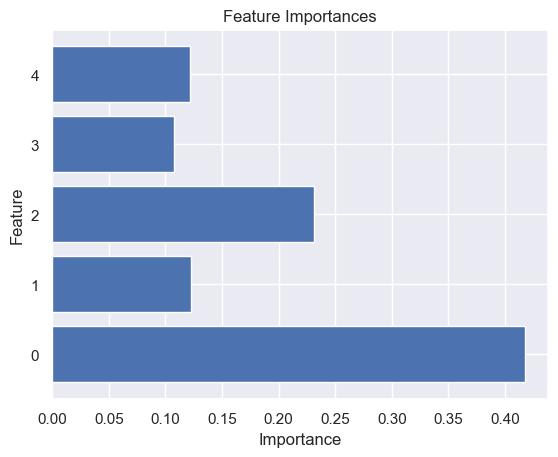

In [56]:
plt.barh(feature, importance_score)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

We can see which components to contribute most in classifying emails as spam or not spam. With Principal component 0 as the most contributing component to the classification with a score of 42%, this means that component 0 contributes 40% variability in classifying emails as spam. This is followed by component 2 with 23%, component 4 with 13%, component 1 with 12% and component 3 with 11%

# visualizing the actual vs predicted labels for comparison using a confusion matrix

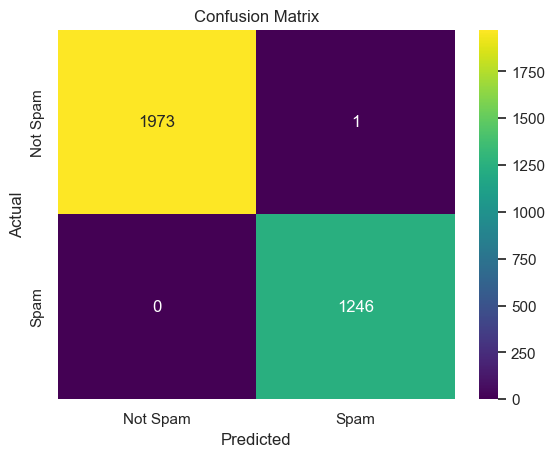

In [57]:
train_confusion_matrix = confusion_matrix(y, yhat3) 

sb.heatmap(train_confusion_matrix,
           annot=True, 
           fmt= 'd', 
           cmap="viridis", 
           xticklabels=["Not Spam", "Spam"], 
           yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix compares the actual and predicted classificatio of emails as spam or not spam. The first value at the top left corner (1973) describes the email that were not spam and were correctly predicted as not spam also known as True negatives. The value on the top right corner (1) represents the values that were not spam but were incorrectly predicted as spam by the model also called false negatives.

The value at the bottom-left corner (0) represent the number of emails that are actually spam but were incorrectly predicted as not spam and the value at the bottom-right corner (1246) represent the values that are actually spam and have been predicted as spam.

Overall, this indicates that the model is performing remarkably and does great in classifying emails as spam or not spam. This model will be tested using unseen data to confirm

# TESTING THE MODEL

# Creating a test data frame containing the components selected by RFE from the test set

In [58]:
test_feat= X_test_pca_df[[0, 1, 2, 4, 9]]
test_feat.head()

0         1         2         4         9
0 -0.105085 -0.012914 -0.075889 -0.040213 -0.003928
1 -0.040304 -0.145633  0.042086 -0.021187 -0.021011
2 -0.020031 -0.146354 -0.061408  0.075961  0.031755
3 -0.062989  0.133758  0.091205 -0.058066  0.071359
4 -0.076110  0.325046  0.077056 -0.059604  0.005399

# Testing the model using these components from the test sets using the best performing model which is the random forest using the KFold cross validation model

In [59]:
X_t = test_feat.values
y_t = y_test.values
    
t_score = cross_val_score(model3, X_t, y_t, scoring= 'accuracy', cv= kfold)

print('random forest score:',t_score.mean()*100)

random forest score: 89.18812775866262


# Making a prediction using with the test set using the accuracy scoring metric

In [60]:
model3.fit(X_t, y_t)

y_pred= model3.predict(X_t)

t_score1= accuracy_score(y_t, y_pred)

print('random forest accuracy:',t_score1*100)

random forest accuracy: 100.0


The random forest model achieved an accuracy of 89% for classifying emails as spam or not spam, using the KFold cross validation and a perfect score using the accuracy score to make predict the classification of emails as spam or not.

The KFold cross validation is a more robust algoruthm that evaluates the performance of a model. Therefore getting an accuracy score of 89% using the KFold is more acceptable than predicting the classification of emails without the KFold.

The KFold cross validation confirms that the model is indeed performing optimally and not overfitting

# checking the importance score of the components

In [61]:
t_importance= model3.feature_importances_
t_importance

array([0.43871248, 0.11445088, 0.21354481, 0.09816298, 0.13512885])

In [62]:
feat_imp= []
feature = []
importance_score= []
for feat, imp in zip(X_test_pca_df.columns, t_importance):
    feature.append(feat)
    importance_score.append(imp)
    score_list= [feat, imp]
    feat_imp.append(score_list)

In [63]:
imp_score= pd.DataFrame(feat_imp, columns=['features', 'score']).sort_values(by= 'score',ascending= False).round(2)
imp_score

features  score
0         0   0.44
2         2   0.21
4         4   0.14
1         1   0.11
3         3   0.10

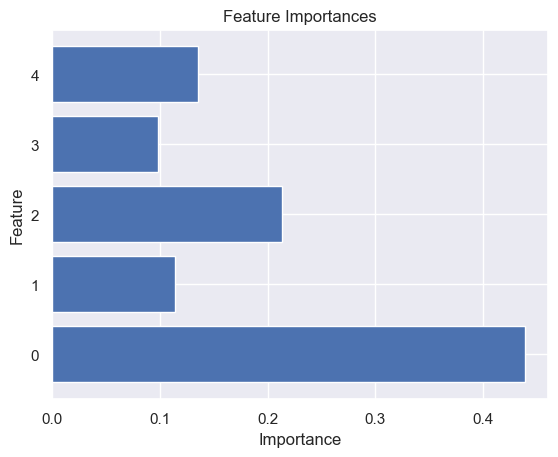

In [64]:
plt.barh(feature, importance_score)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

We can see which components to contribute most in classifying emails as spam or not spam. With Principal component 0 as the most contributing component to the classification with a score of 42%, this means that component 0 contributes 40% variability in classifying emails as spam. This is followed by component 2 with 22%, component 4 with 14%, component 1 with 12% and component 3 with 10%

This corresponds with the result gotten from the train set with a slight variation

In [65]:
test_confusion_matrix = confusion_matrix(y_t, y_pred)
test_confusion_matrix

array([[814,   0],
       [  0, 567]], dtype=int64)

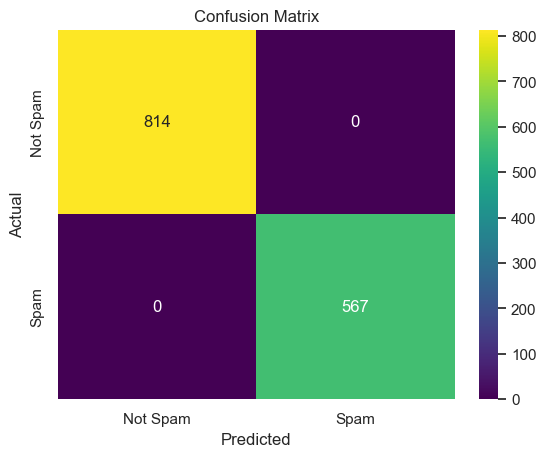

In [66]:

sb.heatmap(test_confusion_matrix,
           annot=True, 
           fmt= 'd', 
           cmap="viridis", 
           xticklabels=["Not Spam", "Spam"], 
           yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix for the test set shows that 814 emails that were not spam and were correctly predicted as not spam and the no values were incorrectly predicted as spam by the model.

Also, no values that were actually spam but were incorrectly predicted as not spam and 567 the values that are actually spam and have been predicted as spam.

Overall, this indicates that the model is performing remarkably and does great in classifying emails as spam or not spam.

# SUMMARY AND FINDINGS

The goal of this project is to prepare the data and build a model that is able to classify an email as spam or not

From the analysis and prediction, the following finding were made:

1. There are words that have two distinct categories - high and low frequencies This indicates that some words and characters that are associated with spam and non spam emails.
2. There are more words/characters with a negative correlation than those with a negative correlation
3. Most words have a low frequency. They don't appear often in emails and are not categorized spam
4. The higher the frequency of a word/character in an email, the more likely it is categorized as spam
5. 52 components were used to enable PCA to capture the variability of the data at 99.5% variance


# TECHNICAL DEEPDIVE

1. Duplicated observations were not removed to avoid losing data as the sample is small
2. Missing values were replaced using the median because the features has an imbalanced distributions
3. The datapoints represented as outliers by the boxplot are genuine values and not outliers
4. The dataset was deskewed and normalized to ensure balance for each feature and the entire dataset. The log transformation and normalizer algorithms were used
5. The model was split into train and test split before transformation techniques were performed on them to avoid overfitting
6. The principal component analysis was performed to create new features that are a linear combination of the original features to reduce the high dimension of the data
7. The Recursive feature elimination model was used to select features. After a few iterations, it was discovered that using 5 components to train a model is sufficient to classify an email as spam or not spam.

The following models were used:
1. Logistic Regression to capture the linear relationship between components and how these relationships affect the target
2. Decision Tree - To capture the non - linear relationship between components and how these relationships affect the target
3. Random Forest - Given the large number of components, the random forest was used to capture the complex relationships between the components, how these relationships affect the target and to avoid overfitting

The KFold cross validation technique was used to predict and evaluate the model which indicated that the model performs incredibly. The accuracy scoring metric was also used and it also showed that the model performs incredibly

In [ ]:
plt.hist(t_score1, bins=10, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Cross-Validation Scores')
plt.show()

Majority of scores are concentreated around 1 which indicates a high accuracy for the model on average.The scores are clustered around the mean which indicates that the model is consistent across all folds.

On average, this plot indicates that the model has an incredible performance and is consistent  across many folds with a few outliers suggesting room for improvement

In [ ]:
feat_imp= []
feature = []
importance_score= []
for feat, imp in zip(X_test_pca_df.columns, t_importance):
    feature.append(feat)
    importance_score.append(imp)
    score_list= [feat, imp]
    feat_imp.append(score_list)

imp_score= pd.DataFrame(feat_imp, columns=['features', 'score']).sort_values(by= 'score',ascending= False).round(2)
imp_score

In [ ]:
plt.barh(feature, importance_score)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

The feature importance score shows that component 0 and component 2 have highest contribution to classifying email as spam or not spam with 42% and 22% respectively, a sum of 64%, followed by component 4,1 and 3 with 14%, 12% and 10% respectively. This shows the variability of the Principal Component Analysis in creating features that better explains the data and helps in the accurate classification of emails